In [1]:
# 데이터 불러오기

import pandas as pd
import numpy as np

url = 'https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv'
df_original = pd.read_csv(url)
df = df_original.iloc[:,1:]
df.head(4) # df.shape: (16598, 9)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0


In [4]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [5]:
df.Name.value_counts()

Need for Speed: Most Wanted            12
FIFA 14                                 9
Ratatouille                             9
Madden NFL 07                           9
LEGO Marvel Super Heroes                9
                                       ..
Saki: Achiga-Hen Portable               1
Shining Force Feather                   1
Model * Oshare Audition: Dream Girl     1
Twisted Metal 2                         1
Rainbow Islands: Revolution             1
Name: Name, Length: 11493, dtype: int64

In [6]:
df[df.Name == 'Need for Speed: Most Wanted'].sort_values(by = 'Year', ascending = False)
# 동일한 이름이어도 중복치가 아닌 경우 - 플랫폼, 출시년도가 다를 수 있다.

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
13617,Need for Speed: Most Wanted,WiiU,2013.0,Racing,Electronic Arts,0.14,0.12,0,0.02
1318,Need for Speed: Most Wanted,X360,2012.0,Racing,Electronic Arts,0.62,0.8,0.01,0.15
1511,Need for Speed: Most Wanted,PS3,2012.0,Racing,Electronic Arts,0.71,1.51,0.06,0.61
11042,Need for Speed: Most Wanted,PSV,2012.0,Racing,Electronic Arts,0.38,0.52,0.01,0.25
13808,Need for Speed: Most Wanted,PC,2012.0,Racing,Electronic Arts,0,0.06,0,0.02
2673,Need for Speed: Most Wanted,PC,2005.0,Racing,Electronic Arts,20K,0.23,0,0.05
4672,Need for Speed: Most Wanted,GBA,2005.0,Racing,Electronic Arts,0.19,0.07,0,0
11335,Need for Speed: Most Wanted,PS2,2005.0,Racing,Electronic Arts,2.03,1.79,0.08,0.47
12177,Need for Speed: Most Wanted,DS,2005.0,Racing,Electronic Arts,0.24,0.01,0,0.02
12529,Need for Speed: Most Wanted,X360,2005.0,Racing,Electronic Arts,1,0.17,0.02,0.1


In [7]:
# 중복값 처리

df[df.duplicated()] # 전체 데이터 중복

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
9184,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0,0,0.02,0


In [8]:
df[df['Name'] == 'Wii de Asobu: Metroid Prime'] # 중복치 - 제거해준다.

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
8055,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0,0,0.02,0
9184,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0,0,0.02,0


In [9]:
df.nunique()

Name           11493
Platform          31
Year              62
Genre             12
Publisher        578
NA_Sales         494
EU_Sales         363
JP_Sales         282
Other_Sales      190
dtype: int64

In [10]:
# 결측치 확인

df.isna().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [11]:
df[df.Year.isnull()] # 년도 데이터가 결측치인 경우

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
31,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0,0.21
109,Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales),Wii,NaN,Racing,Unknown,0,0,0.02,0
273,Jewel Link Chronicles: Mountains of Madness,DS,NaN,Puzzle,Avanquest,0,0.06,0,0.01
358,Majesty 2: The Fantasy Kingdom Sim,X360,NaN,Simulation,Unknown,0.03,0,0,0
430,Famista 64,N64,NaN,Sports,Namco Bandai Games,0,0,0.17,0.03
...,...,...,...,...,...,...,...,...,...
16240,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0,0,0
16275,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0M,0.03
16278,Madden NFL 11,Wii,NaN,Sports,Unknown,0.7,0,0,50K
16425,Yoostar on MTV,X360,NaN,Misc,Unknown,0.06,0,0,0


In [12]:
# Year 데이터 이상치 확인 및 yr_tbc (year to be changed)로 담아두기
year = df.Year.unique()
yr_tbc = []
for i in year:
    if i <= 1900:
        print(i)
        yr_tbc.append(i)

9.0
97.0
11.0
15.0
3.0
96.0
6.0
8.0
1.0
5.0
4.0
10.0
98.0
7.0
16.0
86.0
14.0
95.0
2.0
13.0
0.0
12.0
94.0


In [13]:
df[(df.Year >= 0.0) & (df.Year < 1900.0)].sort_values(by = 'Year', ascending = False)
# 확인 결과 Year > 80: 1900년대 출시, Year < 80: 2000년대 출시

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
16482,Super Robot Taisen F Kanketsuhen,SAT,98.0,Strategy,Banpresto,0M,0,0.55,0
14572,S.C.A.R.S,PS,98.0,Racing,Ubisoft,0.05,0.03,0,0.01
3492,Glover,N64,98.0,Platform,Hasbro Interactive,0.72,0.17,0,0.01
10315,AeroFighters Assault,N64,97.0,Action,Video System,0.15,0.04,0,0
81,Treasures of the Deep,PS,97.0,Action,Namco Bandai Games,0.1,0.07,0,0.01
...,...,...,...,...,...,...,...,...,...
8681,NCAA Football 2002,PS2,1.0,Sports,Electronic Arts,0.77,0.6,0,0.2
2249,SplashDown,PS2,1.0,Racing,Atari,0.34,0.27,0,0.09
14666,Strider 2,PS,0.0,Platform,Virgin Interactive,0.05,0.03,0,0.01
9276,Trade & Battle: Card Hero,GB,0.0,Strategy,Nintendo,0,0,0.2,0


In [14]:
# 위의 확인결과에 따라 Year 데이터 변경 (80 전후로 각각 1900, 2000씩 더해주도록 한다.)
df.loc[(df.Year.values < 80), 'Year'] += 2000 # c += a → c = (c + a)
df.loc[((df.Year.values > 80) & (df.Year.values < 100)), 'Year'] += 1900
df.Year.value_counts() # Year 데이터가 1980년대부터 2020년에 이르기까지 정상 변경 확인가능

2009.0    1431
2008.0    1428
2010.0    1259
2007.0    1202
2011.0    1139
2006.0    1008
2005.0     941
2002.0     829
2003.0     775
2004.0     763
2012.0     657
2015.0     614
2014.0     582
2013.0     546
2001.0     482
1998.0     379
2000.0     349
2016.0     344
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1984.0      14
1985.0      14
1980.0       9
2017.0       3
2020.0       1
Name: Year, dtype: int64

In [15]:
# Year 데이터가 결측치인 게임의 Name, Platform 확인
# 각각 names_list, platforms_list 로 모아줌
names_list = []
platform_list = []

for x, y in zip(df.loc[(df.Year.isna()), 'Name'], df.loc[(df.Year.isna()), 'Platform']):
    names_list.append(x)
    platform_list.append(y)

print(names_list[-3:]) # [-3:]: 맨끝 3개 데이터 출력
print(platform_list[-3:])    

# df.loc[(df.Year.isna()), 'Name']: Year 데이터가 이상치인 게임의 Name 출력

['Madden NFL 11', 'Yoostar on MTV', 'Bejeweled 3']
['Wii', 'X360', 'X360']


In [16]:
yr_nan_df = pd.DataFrame({'Name': names_list, 'Platform': platform_list, 'Year': 0})
yr_nan_df.head() # yr_nan_df.shape: (271, 3)


,Name,Platform,Year
0,Rock Band,X360,0
1,Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales),Wii,0
2,Jewel Link Chronicles: Mountains of Madness,DS,0
3,Majesty 2: The Fantasy Kingdom Sim,X360,0
4,Famista 64,N64,0


In [17]:
# Year 결측치 수집 - 데이터 크롤링 with selenium

! pip install selenium

In [18]:
! pip install webdriver-manager

In [19]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
import time
from bs4 import BeautifulSoup
# from urllib.parse import quote_plus

In [21]:
# 여기서부터 다시 돌려야 함(24일 오후 9시 12분)

driver = webdriver.Chrome(ChromeDriverManager().install()) # driver = webdriver.Chrome('[크롬드라이버를 설치한 절대경로를 여기에 써주자.]')

# baseUrl = 'https://www.google.com/search?q=' #구글 검색의 기본 url : 검색 여러번하고 주소창 보면 공통 형식이 보인다.
# plusUrl = input(yr_nan_df['Name']) 
# url = baseUrl + quote_plus(plusUrl) #quote_plus : 문자열을 인터넷 검색가능한 형식으로 바꿔준다.

# platform name release date로 검색
for name, platform in zip(names_list, platform_list):
    driver.get('https://www.google.com/search?q={}'.format(platform + ' ' + name + ' ' +  "release date"))
    time.sleep(3)
        
    try: # xxxx년 xx월 xx일 데이터 수집
        html = driver.page_source # 브라우저에 보이는 그대로의 HTML, 크롬 개발자 도구의 Element 탭 내용과 동일.
        soup = BeautifulSoup(html, 'html.parser')
        date = soup.select('div.Z0LcW')
        year = date[0].text.split(" ")[0].replace("년", '').strip()
        yr_nan_df.loc[yr_nan_df.Name.values == name, 'Year'] = int(year)
    except:
        try: # x월 x일 x년 데이터 수집
            html = driver.page_source
            soup = BeautifulSoup(html, 'html.parser')
            date = soup.select('div.Z0LcW')
            year =date[0].text.split(" ")[-1].strip()
            yr_nan_df.loc[yr_nan_df.Name.values == name, 'Year'] = int(year)
        except: # 못담을 경우 0으로 처리
            yr_nan_df.loc[yr_nan_df.Name.values == name, 'Year'] = 0
        
driver.quit()
yr_nan_df.to_csv('yr_nan_df.csv', index=False) # 수집후 저장

# 확인 결과 일부 Year 0으로 수집된 데이터에 대해 크롤링, 수작업 진행

[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 103.0.5060
[WDM] - Get LATEST chromedriver version for 103.0.5060 google-chrome
[WDM] - Driver [C:\Users\maeve\.wdm\drivers\chromedriver\win32\103.0.5060.53\chromedriver.exe] found in cache
C:\Users\maeve\AppData\Local\Temp\ipykernel_11296\444249469.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install()) # driver = webdriver.Chrome('[크롬드라이버를 설치한 절대경로를 여기에 써주자.]')


In [22]:
# 일부 Year 0으로 수집된 데이터에 대해 크롤링, 수작업 진행

driver = webdriver.Chrome(ChromeDriverManager().install())

for x, y in zip(yr_nan_df.loc[(yr_nan_df.Year == 0), "Name"],
                yr_nan_df.loc[(yr_nan_df.Year == 0), "Platform"]):
    # platform name release date로 검색
    driver.get('https://www.google.com/search?q={}'.format(y+ ' ' + x + ' ' +  "release date"))
    # 검색해서 띄우고 입력받기
    year = int(input('year : '))
    # 입력받은 데이터 저장
    yr_nan_df.loc[yr_nan_df.Name == x, 'Year'] = year

[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 103.0.5060
[WDM] - Get LATEST chromedriver version for 103.0.5060 google-chrome
[WDM] - Driver [C:\Users\maeve\.wdm\drivers\chromedriver\win32\103.0.5060.53\chromedriver.exe] found in cache
C:\Users\maeve\AppData\Local\Temp\ipykernel_11296\3330395579.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


In [153]:
# 크롤링한 데이터 결측치 위치에 대체
for x, y, z in zip((yr_nan_df.Name.values),
                   (yr_nan_df.Platform.values),
                   (yr_nan_df.Year.values)):
        df.loc[((df.Name == x) & (df.Platform == y)), 'Year'] = z

In [24]:
df.Year.isna().sum() # Year 데이터 결측치 처리결과

0

In [25]:
df.Year.value_counts().sort_values(ascending = False)

2008.0    1452
2009.0    1450
2010.0    1280
2007.0    1219
2011.0    1179
2006.0    1029
2005.0     954
2002.0     855
2003.0     788
2004.0     774
2012.0     666
2015.0     615
2014.0     584
2013.0     550
2001.0     490
1998.0     381
2000.0     353
2016.0     345
1999.0     341
1997.0     292
1996.0     264
1995.0     219
1994.0     121
1993.0      61
1981.0      46
1992.0      43
1991.0      41
1982.0      37
1986.0      21
1989.0      18
1983.0      17
1987.0      16
1990.0      16
1988.0      15
1980.0      14
1985.0      14
1984.0      14
2019.0       5
1978.0       5
1977.0       5
2017.0       3
2020.0       2
3.0          2
2018.0       2
Name: Year, dtype: int64

In [26]:
df.loc[(df.Year.values < 80), 'Year'] += 2000 # c += a → c = (c + a)
df.loc[((df.Year.values > 80) & (df.Year.values < 100)), 'Year'] += 1900
df.Year.value_counts() 

2008.0    1452
2009.0    1450
2010.0    1280
2007.0    1219
2011.0    1179
2006.0    1029
2005.0     954
2002.0     855
2003.0     790
2004.0     774
2012.0     666
2015.0     615
2014.0     584
2013.0     550
2001.0     490
1998.0     381
2000.0     353
2016.0     345
1999.0     341
1997.0     292
1996.0     264
1995.0     219
1994.0     121
1993.0      61
1981.0      46
1992.0      43
1991.0      41
1982.0      37
1986.0      21
1989.0      18
1983.0      17
1987.0      16
1990.0      16
1988.0      15
1980.0      14
1984.0      14
1985.0      14
2019.0       5
1978.0       5
1977.0       5
2017.0       3
2020.0       2
2018.0       2
Name: Year, dtype: int64

In [27]:
df.Year.unique()

array([2008., 2009., 2010., 2005., 2011., 2007., 2001., 2003., 2006.,
       2014., 2015., 2002., 1997., 2013., 1996., 2004., 2000., 1984.,
       1998., 2016., 1985., 1999., 1995., 1993., 2012., 1987., 1982.,
       1994., 1990., 1992., 1991., 1983., 1988., 1981., 1989., 1986.,
       1980., 2019., 1978., 2017., 2020., 1977., 2018.])

In [28]:
# Genre 결측치 수집
# Genre 결측치 확인

df.Genre.unique() # 기존 장르 확인(입력 시 참고)

array(['Action', 'Adventure', 'Misc', 'Platform', 'Sports', 'Simulation',
       'Racing', 'Role-Playing', 'Puzzle', 'Strategy', 'Fighting',
       'Shooter', nan], dtype=object)

In [29]:
df.loc[df.Genre.isna()]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
50,Ape Escape: On the Loose,PSP,2005.0,NaN,Sony Computer Entertainment,0.52,0.01,0.12,0.05
408,NBA Ballers,XB,2004.0,NaN,Midway Games,0.37,0.11,0,0.02
1328,NFL Street,XB,2004.0,NaN,Electronic Arts,0.49,0.15,0,0.02
1582,SingStar Singalong With Disney,PS2,2008.0,NaN,Sony Computer Entertainment,0,0.04,0,0.57
1971,Pokemon X/Pokemon Y,3DS,2013.0,NaN,Nintendo,5170K,4.05,4.34,0.79
2043,NASCAR Racing,PS,1996.0,NaN,Pioneer LDC,0.23,0.16,0,0.03
2497,Jurassic Park III: Island Attack,GBA,2001.0,NaN,Konami Digital Entertainment,0.13,0.05,0,0
3353,The Godfather: Dons Edition,PS3,2007.0,NaN,Electronic Arts,0.25,0.02,0,0.03
3363,Ski-Doo Snowmobile Challenge,X360,2009.0,NaN,Valcon Games,0.03,0,0,0
3470,Batman Beyond: Return of the Joker,N64,2000.0,NaN,Ubisoft,0.07,0.02,0,0


In [30]:
# 리스트화

names_list1 = []
for name in df.loc[df.Genre.isna(), 'Name']:
    names_list1.append(name)
names_list1[-3:] # 리스트 맨 끝 3개 값 출력

['Cars: Mater-National Championship',
 'Apache: Air Assault',
 'Need for Speed Underground 2']

In [31]:
# Genre 데이터가 결측치인 게임의 Name, Platform 확인
# 각각 names_list1, platforms_list1 로 모아줌

names_list1 = []
platform_list1 = []

for x, y in zip(df.loc[(df.Genre.isna()), 'Name'], df.loc[(df.Genre.isna()), 'Platform']):
    names_list1.append(x)
    platform_list1.append(y)  

genre_nan_df = pd.DataFrame({'Name': names_list1, 'Platform': platform_list1, 'Genre': '0'})
genre_nan_df.head() # genre_nan_df.shape: (50, 3)

,Name,Platform,Genre
0,Ape Escape: On the Loose,PSP,0
1,NBA Ballers,XB,0
2,NFL Street,XB,0
3,SingStar Singalong With Disney,PS2,0
4,Pokemon X/Pokemon Y,3DS,0


In [32]:
# 장르 수집

driver = webdriver.Chrome(ChromeDriverManager().install())

for x in names_list1:
    # name genre로 검색
    driver.get('https://www.google.com/search?q={}'.format(x + " " + "genre"))
    # genre 데이터 입력받기
    genre = input('Genre : ')
    # 입력받은 데이터 저장
    df.loc[((df.Genre.isna()) & (df.Name == x)), 'Genre'] = genre
driver.quit()
df.Genre.isna().sum()

[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 103.0.5060
[WDM] - Get LATEST chromedriver version for 103.0.5060 google-chrome
[WDM] - Driver [C:\Users\maeve\.wdm\drivers\chromedriver\win32\103.0.5060.53\chromedriver.exe] found in cache
C:\Users\maeve\AppData\Local\Temp\ipykernel_11296\2509911167.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


0

In [33]:
df.Genre.value_counts()

Action          3309
Sports          2347
Misc            1737
Role-Playing    1490
Shooter         1308
Adventure       1293
Racing          1248
Platform         886
Simulation       866
Fighting         848
Strategy         682
Puzzle           582
Shooting           2
Name: Genre, dtype: int64

In [34]:
# 입력 과정에서 발생한 오타 정정, 장르 통일해주기

df.loc[df.Genre == 'Shooter', 'Genre'] = 'Shooting' # Shooting 으로 Genre 통일
df.loc[df.Genre == ' Adventure', 'Genre'] = 'Adventure' # ' Adventure'을 'Adventure'로 공백제거, 통일
df.Genre.value_counts() # df.Genre.isna().sum(): 0

Action          3309
Sports          2347
Misc            1737
Role-Playing    1490
Shooting        1310
Adventure       1293
Racing          1248
Platform         886
Simulation       866
Fighting         848
Strategy         682
Puzzle           582
Name: Genre, dtype: int64

In [35]:
df[df.Genre.str.contains('Adventure')] # 장르 통일 결과 확인

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
8,Imabikisou,PS3,2007.0,Adventure,Sega,0,0,0.04,0
42,Phoenix Wright: Ace Attorney - Trials and Trib...,DS,2007.0,Adventure,Capcom,0.33,0.05,0.25,0.04
68,Sherlock Holmes: Crimes & Punishments,PS4,2014.0,Adventure,Focus Home Interactive,0.08,0.14,0,0.05
93,Pac-Man and the Ghostly Adventures 2,PS3,2014.0,Adventure,Namco Bandai Games,0.05,0.04,0,0.02
...,...,...,...,...,...,...,...,...,...
16562,Sherlock Holmes: The Mystery of the Mummy,DS,2009.0,Adventure,Focus Home Interactive,0.06,0.3,0,0.04
16565,Toshochu: Run for Money,3DS,2012.0,Adventure,Namco Bandai Games,0,0,0.62,0
16580,Captain Morgane and the Golden Turtle,DS,2012.0,Adventure,Reef Entertainment,0,0.03,0M,0
16585,Pokemon Channel,GC,2003.0,Adventure,Nintendo,0.24,0.06,0.07,0.01


In [36]:
# Publisher 결측치 수집
# Publisher 결측치 게임 이름 수집

names_list2 = []
for name in df.loc[df.Publisher.isna(), 'Name']:
    names_list2.append(name)
names_list2[-3:]

['Dream Dancer',
 'Bound By Flame',
 'Super Robot Wars OG Saga: Masou Kishin II - Revelation of Evil God']

In [37]:
# Publisher 데이터가 결측치인 게임의 Name, Platform 확인
# 각각 names_list2, platforms_list2 로 모아줌

names_list2 = []
platform_list2 = []

for x, y in zip(df.loc[(df.Publisher.isna()), 'Name'], df.loc[(df.Publisher.isna()), 'Platform']):
    names_list2.append(x)
    platform_list2.append(y)  

pub_nan_df = pd.DataFrame({'Name': names_list2, 'Platform': platform_list2, 'Publisher': '0'})
pub_nan_df.head() # pub_nan_df.shape: (58, 3)

,Name,Platform,Publisher
0,UK Truck Simulator,PC,0
1,All Grown Up!: Game Boy Advance Video Volume 1,GBA,0
2,Teenage Mutant Ninja Turtles: Game Boy Advance...,GBA,0
3,Nicktoons Collection: Game Boy Advance Video V...,GBA,0
4,Monster Hunter Frontier Online,PS3,0


In [38]:
df.Publisher.unique()

array(['Destineer', 'Namco Bandai Games', 'Alchemist', 'Zoo Games',
       'D3Publisher', 'Konami Digital Entertainment', 'Deep Silver',
       'Tecmo Koei', 'Sega', 'THQ', 'Empire Interactive', 'Ubisoft',
       'Paradox Interactive', '505 Games', 'Tomy Corporation',
       'Eidos Interactive', 'Microsoft Game Studios',
       'Nippon Ichi Software', 'Kalypso Media', 'Electronic Arts',
       'Sony Computer Entertainment', 'Activision',
       'Tru Blu Entertainment', 'Warner Bros. Interactive Entertainment',
       'Midway Games', 'Mindscape', 'Wargaming.net', 'Capcom',
       'Acclaim Entertainment', 'Unknown', 'Nintendo',
       'Disney Interactive Studios', 'Crave Entertainment', 'Sunflowers',
       'Arc System Works', 'Milestone S.r.l', 'Kamui', 'Hudson Soft',
       'Square Enix', 'Focus Home Interactive', 'Take-Two Interactive',
       'Game Factory', 'Takara Tomy', 'SquareSoft', 'Global Star',
       'Infogrames', 'GT Interactive', 'Storm City Games',
       'Gathering of Dev

In [39]:
# Publisher 결측치 수집
driver = webdriver.Chrome(ChromeDriverManager().install())

publisher_list = []

for x in names_list2:
    # name publisher로 검색
    driver.get('https://www.google.com/search?q={}'.format(x + " " + "publisher"))
    # publisher 입력받기
    publisher = input('publisher : ')
    # 입력받은 값 리스트에 저장
    publisher_list.append(publisher)
driver.quit()

[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 103.0.5060
[WDM] - Get LATEST chromedriver version for 103.0.5060 google-chrome
[WDM] - Driver [C:\Users\maeve\.wdm\drivers\chromedriver\win32\103.0.5060.53\chromedriver.exe] found in cache
C:\Users\maeve\AppData\Local\Temp\ipykernel_11296\423769202.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


In [40]:
# Publisher 결측치 채우기
df.loc[df.Publisher.isna(), 'Publisher'] = publisher_list
df.Publisher.isna().sum() # 결측치 처리결과 확인 가능

0

In [41]:
# 입력 시 발생한 오타 정정 및 Publisher 통일
df.loc[df.Publisher == 'Namco Bandai Games', 'Publisher'] = 'Bandai Namco Games'
df.loc[df.Publisher == 'Namco Banai Games', 'Publisher'] = 'Bandai Namco Games'
df.loc[df.Publisher == 'Majesco', 'Publisher'] = 'Majesco Entertainment'
df.loc[df.Publisher == 'Game Mill', 'Publisher'] = 'GameMill EntertainmentA'
df.loc[df.Publisher == 'Konami', 'Publisher'] = 'Konami Digital Entertainment'
df.Publisher.value_counts()

Electronic Arts                 1351
Activision                       975
Bandai Namco Games               935
Ubisoft                          921
Konami Digital Entertainment     833
                                ... 
FunSoft                            1
Legacy Interactive                 1
Graphsim Entertainment             1
Giza10                             1
Just Flight                        1
Name: Publisher, Length: 590, dtype: int64

In [43]:
# Publisher 데이터명 통일 결과 확인
df[df.Publisher.str.contains('Namco')]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,The Munchables,Wii,2009.0,Action,Bandai Namco Games,0.17,0,0,0.01
17,Hajime no Ippo: The Fighting! (2014),PS3,2014.0,Sports,Bandai Namco Games,0,0,0.03,0
64,SD Gundam Force,GBA,2004.0,Shooting,Bandai Namco Games,0.01,0,0,0M
81,Treasures of the Deep,PS,1997.0,Action,Bandai Namco Games,0.1,0.07,0,0.01
82,Mobile Suit Gundam: Perfect One Year War,PS,1997.0,Strategy,Bandai Namco Games,0,0,0.14,0.01
...,...,...,...,...,...,...,...,...,...
16519,Pro Yakyuu Famista 2011,3DS,2011.0,Sports,Bandai Namco Games,0,0,0.06,0
16520,Snoopy vs the Red Baron,PSP,2006.0,Adventure,Bandai Namco Games,0.04,0,0,0
16523,Gotouchi Tetsudou: Gotouchi Chara to Nihon Zen...,3DS,2014.0,Misc,Bandai Namco Games,0,0,0.12,0
16553,Crayon Shin-Chan Shokkugan! Densetsu o Yobu Om...,DS,2010.0,Action,Bandai Namco Games,0,0,0.09,0


In [44]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16598 non-null  float64
 3   Genre        16598 non-null  object 
 4   Publisher    16598 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [46]:
# Sales 데이터 확인
# Sales 이상값 확인

# df.NA_Sales.value_counts()
df.NA_Sales.value_counts() # Name: NA_Sales, Length: 494, dtype: int64
df.NA_Sales.unique() # 숫자 외에 M, K 들어있는 데이터 확인

array(['0.04', '0.17', '0', '0.12', '0.02', '0.07', '480K', '0.14',
       '0.01', '0.57', '0.06', '0.08', '0.48', '0.03', '0.05', '1.93',
       '0.29', '0.19', '0.3', '0.26', '0.11', '0.18', '0.33', '0.51',
       '60K', '0.13', '0.52', '0.34', '0.25', '0.41', '0.22', '0.35',
       '0.1', '0.67', '0.59', '0.36', '0.21', '1.19', '5.91', '1.98',
       '0.09', '0K', '0.5', '0.94', '0.16', '0.63', '0.43', '0.2', '1.23',
       '0.44', '0.42', '0.97', '2.67', '0.28', '6.05', '0.47', '0.49',
       '0.62', '0.24', '0.72', '1.74', '0.46', '0.65', '0.32', '1.53',
       '0.23', '0.53', '0.37', '1.26', '0.39', '0.58', '1.94', '2.31',
       '1.03', '0.82', '0.4', '0.93', '0.56', '0.96', '1.64', '0.69',
       '1.25', '0.27', '0.92', '0.58M', '1.24', '0.25M', '0.86', '0.73',
       '0.55', '1.54', '1.02', '1.27', '0.54', '0.15', '1.09', '3.44',
       '2.29', '0.88', '5.55M', '1.37', '2.3', '0.99', '1.15', '0.98',
       '0.75', '0.74', '0.7', '0.14M', '0.45', '1.2', '1.41', '0.68',
       '

In [47]:
# NA_Sales 컬럼 문자열에 K가 포함된 데이터 - 'K = 1000$' 확인
# 확인 결과 4가지 Sales 칼럼에서 모두 문자열에 K 포함 확인

df[df.NA_Sales.str.contains('K')] # 100 rows × 9 columns

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
10,Ford Racing,PS,2001.0,Racing,Empire Interactive,480K,0.33M,0K,0.06
45,Resident Evil: Revelations 2,PS3,2015.0,Action,Capcom,60K,0.08,0.16,0.03
145,TOCA Race Driver 3,PC,2006.0,Racing,Codemasters,0K,0.02,0,0
878,Tears to Tiara Anecdotes: The Secret of Avalon,PS3,2009.0,Strategy,Aqua Plus,0K,0,0.04,0
1086,Pro Evolution Soccer 2014,3DS,2013.0,Action,Konami Digital Entertainment,0K,0,0.19,0
...,...,...,...,...,...,...,...,...,...
15647,Championship Manager 2010,PC,2009.0,Sports,Eidos Interactive,0K,0.01,0,0
16194,Vin Diesel: Wheelman,PS3,2009.0,Racing,Ubisoft,120K,0.15,0,0.06
16330,Midway Arcade Treasures,PS2,2003.0,Misc,Midway Games,720K,0.56,0,0.19
16492,Mortal Kombat,PSV,2012.0,Fighting,Warner Bros. Interactive Entertainment,470K,0.18,0,0.12


In [48]:
# NA_Sales 컬럼 문자열에 M이 포함된 데이터 - 'M = 100만' 확인
# 확인 결과 4가지 Sales 칼럼에서 모두 문자열에 M 포함 확인
df[df.NA_Sales.str.contains('M')] # 100 rows × 9 columns

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
447,Medal of Honor: Warfighter,X360,2012.0,Action,Electronic Arts,0.58M,0.47,0.01,0.1
458,F1 2010,PS3,2010.0,Racing,Codemasters,0.25M,0.76,0.08,0.27
577,Mario Kart 64,N64,1996.0,Racing,Nintendo,5.55M,1.94,2.23,0.15
625,The Hobbit,GBA,2003.0,Platform,Vivendi Games,0.14M,0.05,0,0
672,Star Wars The Clone Wars: Lightsaber Duels,Wii,2008.0,Action,LucasArts,1.23M,0.3,0,0.14
...,...,...,...,...,...,...,...,...,...
15986,Juiced 2: Hot Import Nights,PC,2007.0,Racing,THQ,0M,0.01,0,0
16152,Taiko no Tatsujin Wii,Wii,2008.0,Misc,Bandai Namco Games,0M,0,0.67,0
16169,Medal of Honor: Airborne,X360,2007.0,Shooting,Electronic Arts,0.45M,0.53,0.01,0.12
16408,NASCAR 06: Total Team Control,PS2,2005.0,Racing,Electronic Arts,0.53M,0.02,0,0.09


In [49]:
# K, M에 대해 표기 통일해주도록 함 (Sales 데이터 전처리)

sales_col = df.columns[5:]
sales_col

Index(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], dtype='object')

In [50]:
sales_col = df.columns[5:]
sales_col # Index(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], dtype='object')

NA_K_index = df[df.NA_Sales.str.contains('K')].index # NA_Sales 칼럼에서 문자열에 K 혹은 M이 포함된 데이터의 인덱스 각각 저장
NA_M_index = df[df.NA_Sales.str.contains('M')].index 

for col in sales_col: # 4개 Sales 칼럼에 공통으로 적용하는 for 문 생성
    loc_k = df.loc[df[col].str.contains('K'), col] # 4개 Sales 칼럼에서 K 포함된 데이터 위치 저장
    loc_m = df.loc[df[col].str.contains('M'), col] # 4개 Sales 칼럼에서 M 포함된 데이터 위치 저장
    loc_k = loc_k.str.replace('K', '').astype(float) / 1000 # K 빼주고 1000으로 나누어줌 (데이터타입: object > 실수)
    loc_m = loc_m.str.replace('M', '').astype(float) # M 빼줌 (데이터타입: object > 실수)
    
    df.loc[df[col].str.contains('K'), col] = loc_k.astype(str) # 기존 type인 string으로 바꾸어줌
    df.loc[df[col].str.contains('M'), col] = loc_m.astype(str)
df.loc[NA_K_index] # 결과값 확인1 (4개 Sales 칼럼 단위 모두 100만)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
10,Ford Racing,PS,2001.0,Racing,Empire Interactive,0.48,0.33,0.0,0.06
45,Resident Evil: Revelations 2,PS3,2015.0,Action,Capcom,0.06,0.08,0.16,0.03
145,TOCA Race Driver 3,PC,2006.0,Racing,Codemasters,0.0,0.02,0,0
878,Tears to Tiara Anecdotes: The Secret of Avalon,PS3,2009.0,Strategy,Aqua Plus,0.0,0,0.04,0
1086,Pro Evolution Soccer 2014,3DS,2013.0,Action,Konami Digital Entertainment,0.0,0,0.19,0
...,...,...,...,...,...,...,...,...,...
15647,Championship Manager 2010,PC,2009.0,Sports,Eidos Interactive,0.0,0.01,0,0
16194,Vin Diesel: Wheelman,PS3,2009.0,Racing,Ubisoft,0.12,0.15,0,0.06
16330,Midway Arcade Treasures,PS2,2003.0,Misc,Midway Games,0.72,0.56,0,0.19
16492,Mortal Kombat,PSV,2012.0,Fighting,Warner Bros. Interactive Entertainment,0.47,0.18,0,0.12


In [51]:
df.loc[NA_M_index] # 결과값 확인2 (4개 Sales 칼럼 단위 모두 100만$)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
447,Medal of Honor: Warfighter,X360,2012.0,Action,Electronic Arts,0.58,0.47,0.01,0.1
458,F1 2010,PS3,2010.0,Racing,Codemasters,0.25,0.76,0.08,0.27
577,Mario Kart 64,N64,1996.0,Racing,Nintendo,5.55,1.94,2.23,0.15
625,The Hobbit,GBA,2003.0,Platform,Vivendi Games,0.14,0.05,0,0
672,Star Wars The Clone Wars: Lightsaber Duels,Wii,2008.0,Action,LucasArts,1.23,0.3,0,0.14
...,...,...,...,...,...,...,...,...,...
15986,Juiced 2: Hot Import Nights,PC,2007.0,Racing,THQ,0.0,0.01,0,0
16152,Taiko no Tatsujin Wii,Wii,2008.0,Misc,Bandai Namco Games,0.0,0,0.67,0
16169,Medal of Honor: Airborne,X360,2007.0,Shooting,Electronic Arts,0.45,0.53,0.01,0.12
16408,NASCAR 06: Total Team Control,PS2,2005.0,Racing,Electronic Arts,0.53,0.02,0,0.09


In [52]:
col = df.columns[5:9] # 4개 Sales 칼럼 col 로 지정
df[col] = df[col].astype(float) # 데이터타입 실수형으로 변경
df = df.astype({'Year': 'int64'})
df.dtypes # 변경 결과 확인

Name            object
Platform        object
Year             int64
Genre           object
Publisher       object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
dtype: object

In [53]:
df.head() # 지금까지 전처리 수행한 데이터셋 확인

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,Bandai Namco Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04


In [54]:
# 중복값 처리
# 전체 중복 데이터 확인

df[df.duplicated()]
# 삭제 전 전체 중복 데이터 개수: 1개 (Name: Wii de Asobu: Metroid Prime)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
9184,Wii de Asobu: Metroid Prime,Wii,2002,Shooting,Nintendo,0.0,0.0,0.02,0.0


In [55]:
# 전체 중복 데이터 제거

df = df.drop_duplicates(subset = ['Name', 'Platform', 'Year', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'])
# 제거 개수: 1개

In [56]:
# 전체 중복 데이터 제거 전 df 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16597 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16597 non-null  object 
 1   Platform     16597 non-null  object 
 2   Year         16597 non-null  int64  
 3   Genre        16597 non-null  object 
 4   Publisher    16597 non-null  object 
 5   NA_Sales     16597 non-null  float64
 6   EU_Sales     16597 non-null  float64
 7   JP_Sales     16597 non-null  float64
 8   Other_Sales  16597 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.3+ MB


In [57]:
# 전체 중복 데이터 제거 후 df 확인
df.info()

# 결과: 1개 정상 제거 확인

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16597 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16597 non-null  object 
 1   Platform     16597 non-null  object 
 2   Year         16597 non-null  int64  
 3   Genre        16597 non-null  object 
 4   Publisher    16597 non-null  object 
 5   NA_Sales     16597 non-null  float64
 6   EU_Sales     16597 non-null  float64
 7   JP_Sales     16597 non-null  float64
 8   Other_Sales  16597 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.3+ MB


In [58]:
# 같은 Name/Platform/Year = 같은 게임인데 판매량이 따로 잡힌 경우 (삭제 전 개수 확인할 것!!!!)
df[df.duplicated(subset = ['Name', 'Platform', 'Year'])]

# 8717: sales 합쳐주고 1개 행 삭제해주도록 함
# 15705: (동일)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
8717,Madden NFL 13,PS3,2012,Sports,Electronic Arts,0.00,0.01,0.00,0.00
15705,Sonic the Hedgehog,PS3,2003,Platform,Sega,0.41,0.07,0.04,0.66


In [59]:
# 3개 칼럼 중복 데이터1 확인
df[(df.Name == 'Madden NFL 13') & (df.Platform == 'PS3') & (df.Year == 2012)]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
7346,Madden NFL 13,PS3,2012,Sports,Electronic Arts,2.11,0.23,0.0,0.22
8717,Madden NFL 13,PS3,2012,Sports,Electronic Arts,0.00,0.01,0.0,0.00


In [60]:
# 3개 칼럼 중복 데이터2 확인
df[(df.Name == 'Sonic the Hedgehog') & (df.Platform == 'PS3') & (df.Year == 2003)]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
8651,Sonic the Hedgehog,PS3,2003,Platform,Sega,0.00,0.48,0.00,0.00
15705,Sonic the Hedgehog,PS3,2003,Platform,Sega,0.41,0.07,0.04,0.66


In [61]:
# 3개 칼럼 중복 데이터1 1개 행 제거 수행 - NFL Madden NFL 13
df = df.drop(df.index[8717])

In [62]:
# 데이터1 판매량 합쳐주기
df.iloc[7346] = ['Madden NFL 13', 'PS3', 2012, 'Sports', 'Electronic Arts', '2.11', '0.24', '0.0', '0.22']

In [63]:
df.info()
# 1개 데이터 정상 제거 확인 (되어야 함. 개수 이상 시 재실행 필요...)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16596 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         16596 non-null  object
 1   Platform     16596 non-null  object
 2   Year         16596 non-null  int64 
 3   Genre        16596 non-null  object
 4   Publisher    16596 non-null  object
 5   NA_Sales     16596 non-null  object
 6   EU_Sales     16596 non-null  object
 7   JP_Sales     16596 non-null  object
 8   Other_Sales  16596 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.3+ MB


In [64]:
# 3개 칼럼 중복 데이터2 1개 행 제거 수행 - Sonic the Hedgehog
df = df.drop(df.index[15705])

In [248]:
df.columns

Index(['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [249]:
# 데이터2 판매량 합쳐주기
df.iloc[8651] = ['Sonic the Hedgehog', 'PS3', 2003, 'Platform', 'Sega', '0.41', '0.55', '0.04', '0.66', '1.66']
# df1.iloc[7346] = ['Madden NFL 13', 'PS3', 2012, 'Sports', 'Electronic Arts', '2.11', '0.24', '0.0', '0.22']

In [66]:
df.info()
# 마지막 중복 데이터 1개 추가 제거 확인
# 16595 non-null 이어야 함

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16595 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         16595 non-null  object
 1   Platform     16595 non-null  object
 2   Year         16595 non-null  int64 
 3   Genre        16595 non-null  object
 4   Publisher    16595 non-null  object
 5   NA_Sales     16595 non-null  object
 6   EU_Sales     16595 non-null  object
 7   JP_Sales     16595 non-null  object
 8   Other_Sales  16595 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.3+ MB


In [250]:
df.iloc[8651]

Name            Sonic the Hedgehog
Platform                       PS3
Year                          2003
Genre                     Platform
Publisher                     Sega
NA_Sales                      0.41
EU_Sales                      0.55
JP_Sales                      0.04
Other_Sales                   0.66
Global_Sales                  1.66
Name: 8651, dtype: object

In [ ]:
# sales 칼럼 데이터 실수형으로 변환
col = df.columns[5:9] # 4개 Sales 칼럼 col 로 지정
df[col] = df[col].astype(float) # 데이터타입 실수형으로 변경
df.info() # df.dtypes # 변경 결과 확인

In [67]:
# 마지막 중복치 drop이므로 인덱스 재설정해줌
df.reset_index(inplace = True)

In [68]:
df = df.iloc[:,1:] # df = df_original.iloc[:,1:]

In [69]:
df.info() 
# 최종 수정된 데이터셋: 16595 entries, 0 to 16594

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16595 entries, 0 to 16594
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         16595 non-null  object
 1   Platform     16595 non-null  object
 2   Year         16595 non-null  int64 
 3   Genre        16595 non-null  object
 4   Publisher    16595 non-null  object
 5   NA_Sales     16595 non-null  object
 6   EU_Sales     16595 non-null  object
 7   JP_Sales     16595 non-null  object
 8   Other_Sales  16595 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.1+ MB


In [70]:
# 모든 중복치 제거 잘 되었는지 확인
df[df.duplicated()]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales


In [71]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.0,0.0,0.0
1,The Munchables,Wii,2009,Action,Bandai Namco Games,0.17,0.0,0.0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.0,0.0,0.02,0.0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.0,0.0,0.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.0,0.04


In [72]:
col = df.columns[5:9] # 4개 Sales 칼럼 col 로 지정
df[col] = df[col].astype(float) # 데이터타입 실수형으로 변경
df = df.astype({'Year': 'int64'})
df.dtypes # 변경 결과 확인

Name            object
Platform        object
Year             int64
Genre           object
Publisher       object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
dtype: object

In [190]:
df.info()
# 최종 수정 데이터셋: 16595 entries, 0 to 16594

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16595 entries, 0 to 16594
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16595 non-null  object 
 1   Platform      16595 non-null  object 
 2   Year          16595 non-null  int64  
 3   Genre         16595 non-null  object 
 4   Publisher     16595 non-null  object 
 5   NA_Sales      16595 non-null  float64
 6   EU_Sales      16595 non-null  float64
 7   JP_Sales      16595 non-null  float64
 8   Other_Sales   16595 non-null  float64
 9   Global_Sales  16595 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 1.3+ MB


In [73]:
# Global_Sales 칼럼 (전세계 판매금액, 곧 국가별 판매금액의 총합) 추가 하기
global_sales = []
for i in df.index:
    g_sales = df.loc[i, 'NA_Sales' : 'Other_Sales'].sum()
    global_sales.append(round(g_sales, 2)) # global_sales.append(round(g_sales, 2))
df['Global_Sales'] = global_sales
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Bandai Namco Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25


In [74]:
# 시각화
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
df.Genre.value_counts()

Action          3308
Sports          2346
Misc            1737
Role-Playing    1490
Shooting        1309
Adventure       1293
Racing          1248
Platform         886
Simulation       866
Fighting         848
Strategy         682
Puzzle           582
Name: Genre, dtype: int64

In [76]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Bandai Namco Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25


In [77]:
# 시각화 1. 장르
# 1-1. 지역별 장르 선호도 막대그래프
genre_sales = df[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
genre_sales.columns = ['장르', '북미 판매량', '유럽 판매량', '일본 판매량', '그외 판매량', '전세계 판매량']

In [78]:
genre_sales

,장르,북미 판매량,유럽 판매량,일본 판매량,그외 판매량,전세계 판매량
0,Action,0.04,0.00,0.00,0.00,0.04
1,Action,0.17,0.00,0.00,0.01,0.18
2,Adventure,0.00,0.00,0.02,0.00,0.02
3,Misc,0.04,0.00,0.00,0.00,0.04
4,Platform,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...
16590,Platform,0.15,0.04,0.00,0.01,0.20
16591,Action,0.01,0.00,0.00,0.00,0.01
16592,Sports,0.44,0.19,0.03,0.13,0.79
16593,Action,0.05,0.05,0.25,0.03,0.38


In [79]:
gs_grouped = genre_sales.groupby(['장르']).sum()
gs_grouped # 12개 장르를 기준으로 각 지역별 판매량 확인

,북미 판매량,유럽 판매량,일본 판매량,그외 판매량,전세계 판매량
장르,,,,,
Action,874.89,522.24,157.90,187.03,1742.06
Adventure,107.48,65.67,53.81,17.17,244.13
Fighting,223.59,101.32,87.35,36.68,448.94
Misc,410.28,215.98,108.20,74.76,809.22
Platform,447.42,201.69,130.81,52.24,832.16
Puzzle,123.64,50.73,56.92,12.54,243.83
Racing,359.39,238.39,56.69,77.27,731.74
Role-Playing,328.63,189.34,352.57,60.19,930.73
Shooting,582.60,313.27,38.26,102.69,1036.82


In [80]:
gs_grouped_table = gs_grouped.reset_index()
gs_grouped_table.head()

,장르,북미 판매량,유럽 판매량,일본 판매량,그외 판매량,전세계 판매량
0,Action,874.89,522.24,157.90,187.03,1742.06
1,Adventure,107.48,65.67,53.81,17.17,244.13
2,Fighting,223.59,101.32,87.35,36.68,448.94
3,Misc,410.28,215.98,108.20,74.76,809.22
4,Platform,447.42,201.69,130.81,52.24,832.16


In [81]:
gs_melted = pd.melt(gs_grouped_table, id_vars = ['장르'], value_vars = gs_grouped_table.columns[1:], var_name = '판매국가', value_name = '판매량')
gs_melted.head()

,장르,판매국가,판매량
0,Action,북미 판매량,874.89
1,Adventure,북미 판매량,107.48
2,Fighting,북미 판매량,223.59
3,Misc,북미 판매량,410.28
4,Platform,북미 판매량,447.42


In [82]:
gs_melted[-12:] 
# 마지막 12행 출력 시, 마지막 칼럼인 전세계 판매량의 장르별 판매량을 확인할 수 있다.
# 전세계 장르 인기순위: Action > Sports > Shooting > Role-Playing

,장르,판매국가,판매량
48,Action,전세계 판매량,1742.06
49,Adventure,전세계 판매량,244.13
50,Fighting,전세계 판매량,448.94
51,Misc,전세계 판매량,809.22
52,Platform,전세계 판매량,832.16
53,Puzzle,전세계 판매량,243.83
54,Racing,전세계 판매량,731.74
55,Role-Playing,전세계 판매량,930.73
56,Shooting,전세계 판매량,1036.82
57,Simulation,전세계 판매량,391.87


In [83]:
# matplotlib 한글 폰트 깨짐 현상 해결 1
import matplotlib.font_manager as fm

font_list = fm.findSystemFonts(fontpaths = None, fontext = 'ttf')
# matplotlib 한글 폰트 깨짐 현상 해결 2 - 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = 'C:\\Windows\\Fonts\\malgun.ttf'
font = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font)

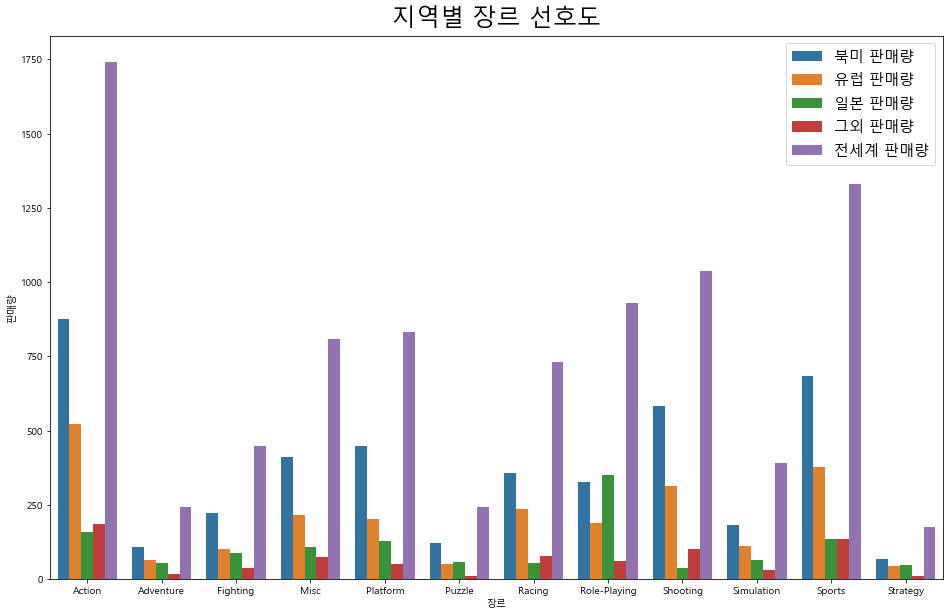

In [84]:
plt.figure(figsize=(16, 10))
sns.barplot(data = gs_melted, x = '장르', y = '판매량', hue = '판매국가')
plt.title('지역별 장르 선호도', loc='center', fontsize=24, pad = 10)
plt.legend(fontsize=15)
plt.show()

# 북미: Action > Sports > Shooting
# 유럽: Action > Sports > Shooting
# 일본: Role-Playing > Action > Platform
# 그외: Action > Sports > Shooting
# 전세계: Action > Sports > Shooting

# 일본을 제외한 국가들 전반에서 장르 선호도는 Action > Sports > Shooting 순으로 나타났다.


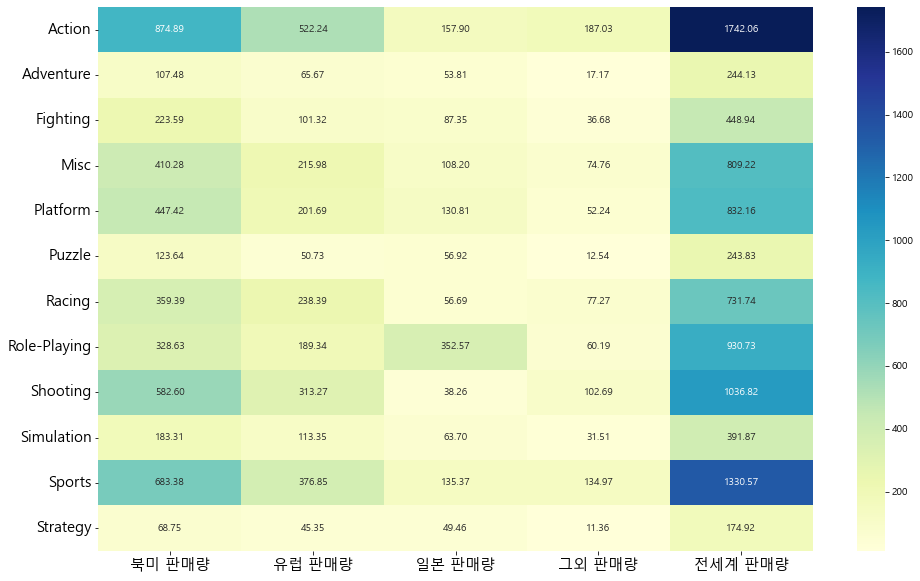

In [85]:
# 시각화 1. Genre 장르
# 1-2. 지역 - 장르 선호도 히트맵
plt.figure(figsize=(16, 10))

a = sns.heatmap(gs_grouped, annot=True, fmt = '.2f', cmap="YlGnBu")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
a.set_ylabel('', fontsize=13)
plt.show()

# 1-1 히스토그램에서 확인한 바와 같이,
# 일본을 제외한 국가들에서 장르 선호도는 Action > Sports > Shooting 순이고
# 북미, 유럽 지역의 경우 그 양상이 유사하게 나타났다.
# 전 세계적으로는 Action, Sports 장르에 대한 선호가 매우 뚜렷한 편
# 유의사항: 히트맵에서는 아무래도 전세계 판매량 수치가 두드러지게 높아지므로, 개별 지역에 비해 색상 역시 두드러지게 나타난다는 점에 유의)

In [292]:
# 1-3. 연도-지역 판매량 히트맵
yr_sales = df[['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
yr_sales.columns = ['년도', '북미 판매량', '유럽 판매량', '일본 판매량', '그외 판매량']
yr_sales

,년도,북미 판매량,유럽 판매량,일본 판매량,그외 판매량
0,2008,0.04,0.00,0.00,0.00
1,2009,0.17,0.00,0.00,0.01
2,2010,0.00,0.00,0.02,0.00
3,2010,0.04,0.00,0.00,0.00
4,2010,0.12,0.09,0.00,0.04
...,...,...,...,...,...
16590,2006,0.15,0.04,0.00,0.01
16591,2005,0.01,0.00,0.00,0.00
16592,2015,0.44,0.19,0.03,0.13
16593,2013,0.05,0.05,0.25,0.03


In [288]:
col = df.columns[5:10] # 4개 Sales 칼럼 col 로 지정
df[col] = df[col].astype(float) # 데이터타입 실수형으로 변경

In [311]:
df.Year.dtypes

dtype('int64')

In [293]:
ys_grouped = yr_sales.groupby(['년도']).sum()
ys_grouped # 전체 년도를 대상으로 매년 각 지역의 판매량 확인

,북미 판매량,유럽 판매량,일본 판매량,그외 판매량
년도,,,,
1977,2.83,0.17,0.00,0.02
1978,3.51,0.22,0.00,0.03
1980,13.43,0.85,0.00,0.14
1981,33.40,1.96,0.00,0.32
1982,27.36,1.68,0.00,0.31
1983,7.76,0.80,8.10,0.14
1984,33.28,2.10,14.27,0.70
1985,33.73,4.74,14.56,0.92
1986,12.50,2.84,19.81,1.93


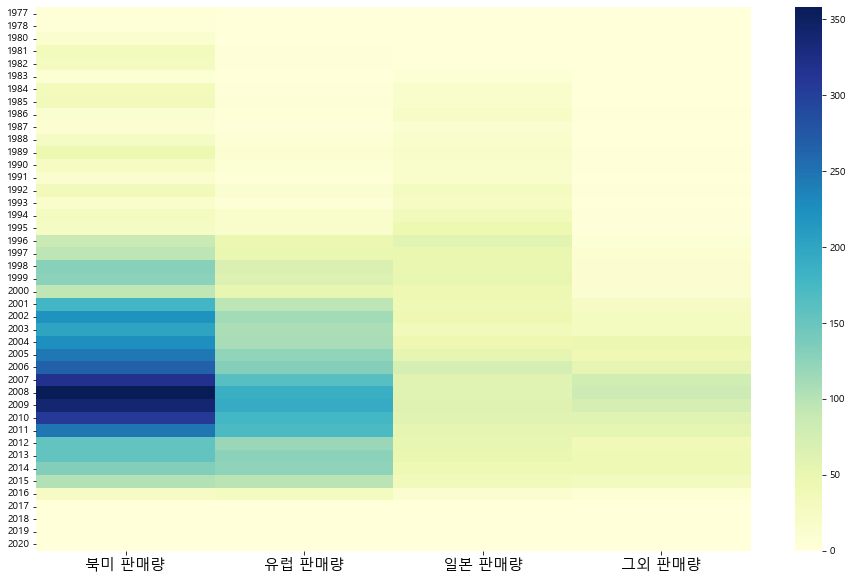

In [300]:
# 1-3-1. 연도 - 지역 판매량 히트맵1
plt.figure(figsize=(16, 10))

a = sns.heatmap(ys_grouped, annot=False, fmt = '.2f', cmap="YlGnBu")
plt.xticks(fontsize=15)
plt.yticks(fontsize=10)
a.set_ylabel('', fontsize=13)
plt.show()

In [310]:
# yr_sales1 = yr_sales.T
# yr_sales2 = yr_sales1.rename(columns = yr_sales1.iloc[0]) # dt2 = dt1.rename(columns=dt1.iloc[0])
# yr_sales3 = yr_sales2.drop(yr_sales2.index[0]) # dt3 = dt2.drop(dt2.index[0]) 
# yr_sales3

,2008.0,2009.0,2010.0,2010.0,2010.0,2005.0,2011.0,2005.0,2007.0,2011.0,...,2011.0,1995.0,2010.0,2004.0,2007.0,2006.0,2005.0,2015.0,2013.0,1996.0
북미 판매량,0.04,0.17,0.00,0.04,0.12,0.00,0.02,0.07,0.00,0.04,...,0.07,0.00,0.00,4.18,0.00,0.15,0.01,0.44,0.05,0.00
유럽 판매량,0.00,0.00,0.00,0.00,0.09,0.00,0.01,0.00,0.00,0.03,...,0.08,0.00,0.00,0.26,0.00,0.04,0.00,0.19,0.05,0.00
일본 판매량,0.00,0.00,0.02,0.00,0.00,0.14,0.00,0.11,0.04,0.00,...,0.00,0.12,0.05,0.01,0.02,0.00,0.00,0.03,0.25,0.16
그외 판매량,0.00,0.01,0.00,0.00,0.04,0.00,0.00,0.01,0.00,0.01,...,0.03,0.01,0.00,0.08,0.00,0.01,0.00,0.13,0.03,0.01


In [ ]:
# 1-3-2. 연도 - 지역 판매량 히트맵2

plt.figure(figsize=(20, 3))

a = sns.heatmap(ysg_t_past30, annot=False, fmt = '.2f', cmap="YlGnBu")
plt.xticks(fontsize=10, rotation = 60)
plt.yticks(fontsize=10, rotation = 30)
a.set_ylabel('', fontsize=13)
plt.axvline(22.5, 0, 1, color = 'red', alpha = 0.9)
plt.show()

# 북미 판매량이 대체로 전세계 판매량의 가장 큰 파이를 차지
# 2000년대를 기점으로 유럽시장의 판매량 역시 증가 추세
# 일본의 경우 90년대 중후반부터 판매량 늘어났으나, 상대적으로 미미한 지분

In [333]:
# 1-4. 연도-지역 판매비중 히트맵

NA_p = df.NA_Sales / df.Global_Sales
df['NA_p'] = NA_p
EU_p = df.EU_Sales / df.Global_Sales
df['EU_p'] = EU_p
JP_p = df.JP_Sales / df.Global_Sales
df['JP_p'] = JP_p
Other_p = df.Other_Sales / df.Global_Sales
df['Other_p'] = Other_p

In [334]:
yr_salesp = df[['Year', 'NA_p', 'EU_p', 'JP_p', 'Other_p']]
# yr_salesp.columns = ['년도', '북미 판매량', '유럽 판매량', '일본 판매량', '그외 판매량']
yr_salesp

,Year,NA_p,EU_p,JP_p,Other_p
0,2008,1.000000,0.000000,0.000000,0.000000
1,2009,0.944444,0.000000,0.000000,0.055556
2,2010,0.000000,0.000000,1.000000,0.000000
3,2010,1.000000,0.000000,0.000000,0.000000
4,2010,0.480000,0.360000,0.000000,0.160000
...,...,...,...,...,...
16590,2006,0.750000,0.200000,0.000000,0.050000
16591,2005,1.000000,0.000000,0.000000,0.000000
16592,2015,0.556962,0.240506,0.037975,0.164557
16593,2013,0.131579,0.131579,0.657895,0.078947


In [335]:
ysp_grouped = yr_salesp.groupby(['Year']).mean()
ysp_grouped

,NA_p,EU_p,JP_p,Other_p
Year,,,,
1977,0.943080,0.053279,0.000000,0.003641
1978,0.933966,0.063663,0.000000,0.002372
1980,0.934876,0.057938,0.000000,0.007186
1981,0.939669,0.054512,0.000000,0.005820
1982,0.933705,0.057746,0.000000,0.008549
1983,0.687307,0.056231,0.248688,0.007774
1984,0.339328,0.053647,0.597599,0.009427
1985,0.308912,0.111233,0.555326,0.024529
1986,0.321191,0.059437,0.582756,0.036616


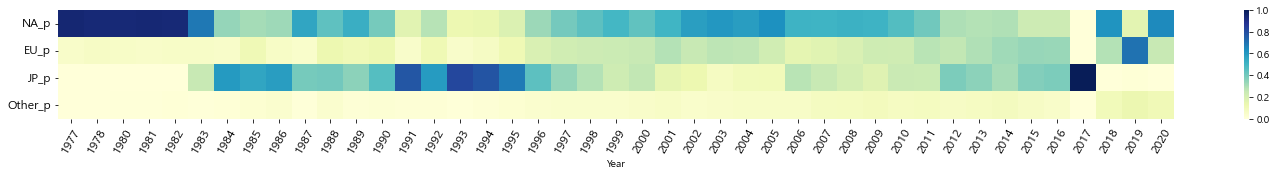

In [347]:
# 1-4. 연도-지역 판매비중 히트맵 (시각화)

plt.figure(figsize=(25, 2))

a = sns.heatmap(ysp_grouped.T, annot = False, fmt = '.2f', cmap="YlGnBu")
plt.xticks(fontsize=12, rotation = 60)
plt.yticks(fontsize=12)
a.set_ylabel('', fontsize=13)
plt.axvline(22.5, 0, 1, color = 'red', alpha = 0.9)
plt.show()

# 전체적으로 북미 판매량의 파이가 가장 큰 편
# 1990년대 중반 이후 유럽 비중 점차 증가
# 일본 판매비중의 경우 1990년대 초중반 가장 컸고 이외 기간 미미, 2010년대 중후반 일시적 증가  

In [349]:
df.loc[df.Year == 2017] 
# 위 히트맵에서 2017년 일본 판매비중 폭증은 데이터셋 상에 2017년 데이터가 아래 3개만 존재하는데 모두 일본 판매량만 미미하게 존재하기 때문인 것으로 보임

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,NA_p,EU_p,JP_p,Other_p
5310,Brothers Conflict: Precious Baby,PSV,2017,Action,Idea Factory,0.0,0.0,0.01,0.0,0.01,0.0,0.0,1.0,0.0
10105,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,Role-Playing,Sega,0.0,0.0,0.03,0.0,0.03,0.0,0.0,1.0,0.0
15231,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0.0,0.0,0.01,0.0,0.01,0.0,0.0,1.0,0.0


In [358]:
df.loc[(df.Year >= 2012) & (df.Year <= 2017)].sort_values(by = 'JP_Sales', ascending = False).head(20)
# 2010년대 초중반 일본 판매비중 증가는 주로 포켓몬을 비롯한 롤플레잉, 시뮬레이션 게임의 인기에 기인한 것으로 보임 

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,NA_p,EU_p,JP_p,Other_p
8905,Animal Crossing: New Leaf,3DS,2012,Simulation,Nintendo,2.01,2.32,4.36,0.41,9.10,0.220879,0.254945,0.479121,0.045055
1971,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,Nintendo,5.17,4.05,4.34,0.79,14.35,0.360279,0.282230,0.302439,0.055052
15672,Monster Hunter 4,3DS,2013,Role-Playing,Capcom,0.00,0.00,3.44,0.00,3.44,0.000000,0.000000,1.000000,0.000000
12964,Yokai Watch 2 Ganso/Honke,3DS,2014,Role-Playing,Nintendo,0.03,0.00,3.18,0.00,3.21,0.009346,0.000000,0.990654,0.000000
15676,Pokemon Black 2/Pokemon White 2,DS,2012,Role-Playing,Nintendo,2.91,1.86,3.14,0.43,8.34,0.348921,0.223022,0.376499,0.051559
4251,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,Nintendo,4.23,3.37,3.08,0.65,11.33,0.373345,0.297440,0.271845,0.057370
10890,Monster Hunter X,3DS,2015,Action,Capcom,0.25,0.19,2.78,0.04,3.26,0.076687,0.058282,0.852761,0.012270
5147,Yokai Watch 2 Shinuchi,3DS,2014,Role-Playing,Level 5,0.00,0.00,2.68,0.00,2.68,0.000000,0.000000,1.000000,0.000000
537,Monster Hunter 4 Ultimate,3DS,2014,Role-Playing,Nintendo,0.67,0.49,2.62,0.11,3.89,0.172237,0.125964,0.673522,0.028278
10377,New Super Mario Bros. 2,3DS,2012,Platform,Nintendo,3.66,3.07,2.47,0.63,9.83,0.372330,0.312309,0.251272,0.064090


In [357]:
df.loc[df.Year >= 1996].sort_values(by = 'NA_p', ascending = False)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,NA_p,EU_p,JP_p,Other_p
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04,1.0,0.000000,0.000000,0.000000
11838,PopCap Arcade Vol 2,X360,2009,Misc,PopCap Games,0.03,0.00,0.00,0.00,0.03,1.0,0.000000,0.000000,0.000000
11864,Story Hour: Fairy Tales,Wii,2008,Adventure,Zoo Digital Publishing,0.04,0.00,0.00,0.00,0.04,1.0,0.000000,0.000000,0.000000
2342,Astrology DS,DS,2009,Misc,Deep Silver,0.03,0.00,0.00,0.00,0.03,1.0,0.000000,0.000000,0.000000
11875,Franklin's Great Adventures,DS,2006,Action,Game Factory,0.02,0.00,0.00,0.00,0.02,1.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10758,E.X. Troopers,PS3,2012,Shooting,Capcom,0.00,0.00,0.05,0.00,0.05,0.0,0.000000,1.000000,0.000000
2903,Gakuen K: Wonderful School Days,PSP,2014,Adventure,Idea Factory,0.00,0.00,0.02,0.00,0.02,0.0,0.000000,1.000000,0.000000
2905,G1 Jockey Wii,Wii,2007,Sports,Tecmo Koei,0.00,0.01,0.02,0.00,0.03,0.0,0.333333,0.666667,0.000000
16594,The King of Fighters '95,PS,1996,Fighting,Sony Computer Entertainment,0.00,0.00,0.16,0.01,0.17,0.0,0.000000,0.941176,0.058824


In [86]:
# 1-5. 장르 선호도 국가별 TOP 3
sales_column_list = gs_grouped_table.columns[1:]

def genre_top3(df, sales_column_list):
    df_new = df.loc[:,['장르', sales_column_list]].sort_values(by = sales_column_list, ascending = False).reset_index(drop = True).head(3)
    df_new.columns = ['장르', '판매량']
    return df_new

In [87]:
genre_top3_na = genre_top3(gs_grouped_table, '북미 판매량')
genre_top3_eu = genre_top3(gs_grouped_table, '유럽 판매량')
genre_top3_jp = genre_top3(gs_grouped_table, '일본 판매량')
genre_top3_other = genre_top3(gs_grouped_table, '그외 판매량')
genre_top3_global = genre_top3(gs_grouped_table, '전세계 판매량')

genre_top3_na # 북미 판매량 top3 확인

,장르,판매량
0,Action,874.89
1,Sports,683.38
2,Shooting,582.60


In [88]:
genre_top3_list = [genre_top3_na, genre_top3_eu, genre_top3_jp, genre_top3_other, genre_top3_global]
genre_top3_list

[         장르     판매량
 0    Action  874.89
 1    Sports  683.38
 2  Shooting  582.60,
          장르     판매량
 0    Action  522.24
 1    Sports  376.85
 2  Shooting  313.27,
              장르     판매량
 0  Role-Playing  352.57
 1        Action  157.90
 2        Sports  135.37,
          장르     판매량
 0    Action  187.03
 1    Sports  134.97
 2  Shooting  102.69,
          장르      판매량
 0    Action  1742.06
 1    Sports  1330.57
 2  Shooting  1036.82]

In [89]:
sales_column_list

Index(['북미 판매량', '유럽 판매량', '일본 판매량', '그외 판매량', '전세계 판매량'], dtype='object')

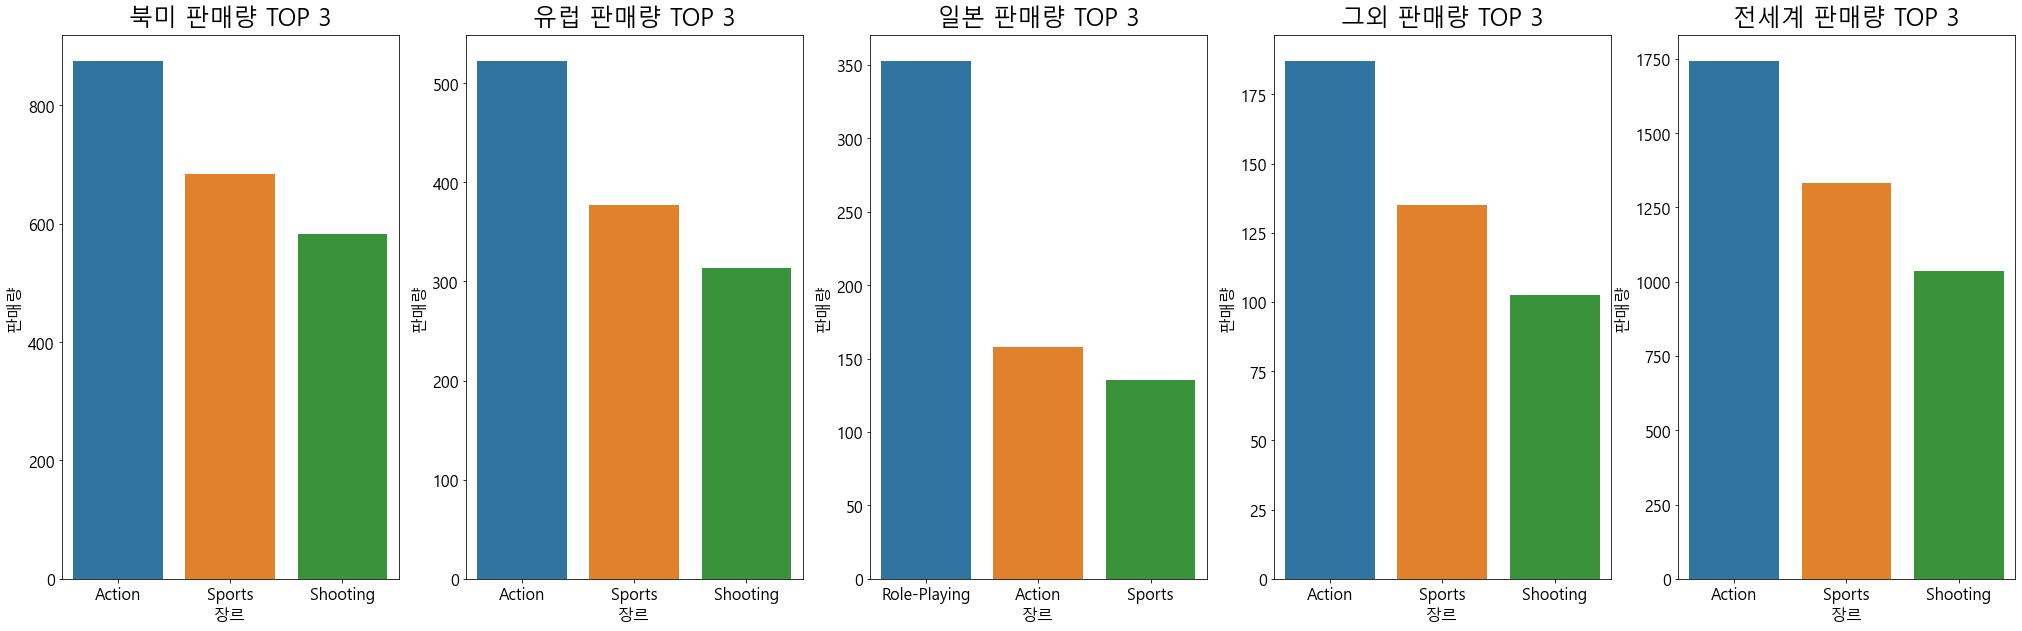

In [90]:
fig, axes = plt.subplots(figsize = (35, 10), nrows = 1, ncols = 5)
for col, i, data in zip(sales_column_list, range(len(sales_column_list)), genre_top3_list):
    axes[i].set_title(col + ' ' + 'TOP 3', fontsize = 24, pad = 10)
    sns.barplot(x = '장르', y = '판매량', data = data, ax = axes[i])
    axes[i].tick_params(axis = 'both', labelsize = 16)
    axes[i].set_xlabel('장르', fontsize = 16)
    axes[i].set_ylabel('판매량', fontsize = 16)
plt.show()

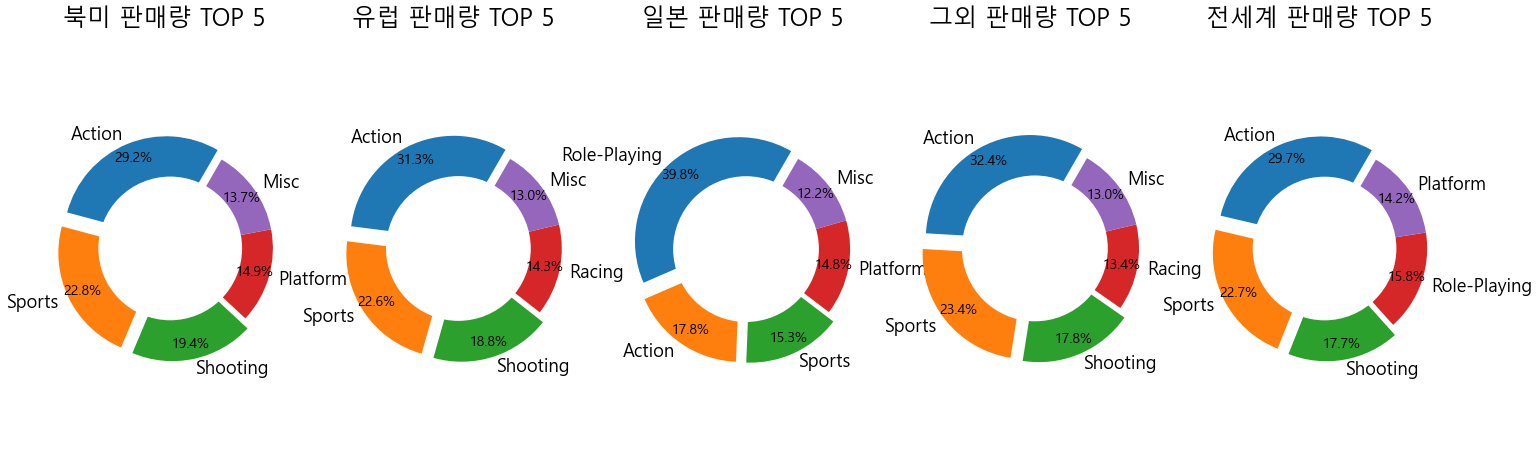

In [91]:
# 1-5-1. 지역별 장르 선호도 TOP 5

# sales_column_list = gs_grouped_table.columns[1:]

def genre_top5(df, sales_column_list):
    df_new_g5 = df.loc[:,['장르', sales_column_list]].sort_values(by = sales_column_list, ascending = False).reset_index(drop = True).head(5)
    df_new_g5.columns = ['장르', '판매량']
    return df_new_g5

genre_top5_na = genre_top5(gs_grouped_table, '북미 판매량')
genre_top5_eu = genre_top5(gs_grouped_table, '유럽 판매량')
genre_top5_jp = genre_top5(gs_grouped_table, '일본 판매량')
genre_top5_other = genre_top5(gs_grouped_table, '그외 판매량')
genre_top5_global = genre_top5(gs_grouped_table, '전세계 판매량')
# genre_top5_na # 북미 판매량 top3 확인

genre_top5_list = [genre_top5_na, genre_top5_eu, genre_top5_jp, genre_top5_other, genre_top5_global]
genre_top5_list

fig, axes = plt.subplots(1, 5, figsize = (25, 8))
plt.subplots_adjust(wspace = 0.2) # subplots간의 너비 간격 조절

# 각 subplot에 pie plot 그리기
explode = (0.1, 0.1, 0.1, 0, 0) # 퍼짐 정도 조절
for i in range(len(sales_column_list)):
	ax = axes[i] # subplot 선택
	wedges, texts, autotexts = ax.pie(genre_top5_list[i].판매량, explode = explode, labels = genre_top5_list[i].장르,
	                                  autopct = '%.1f%%', pctdistance = 0.85,
	                                  shadow = False, startangle = 60)
	for w in wedges: # 조각 설정
		w.set_linewidth(0)
		w.set_edgecolor('w')
		
	for t in texts: # label 설정
		t.set_color('k')
		t.set_fontsize(18)
		
	for a in autotexts: # 퍼센티지 설정
		a.set_color('black')
		a.set_fontsize(14)
    
	centre_circle = plt.Circle((0,0), 0.7, color='black', fc='white', linewidth=0) # 파이차트를 도넛차트로 보이게 하는 trick
	ax.add_artist(centre_circle)
	axes[i].set_title(sales_column_list[i] + ' ' + 'TOP 5', fontsize = 24, pad = 2)
	ax.axis('equal')

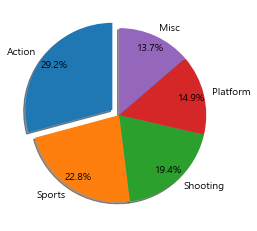

In [92]:
# test

exp = [0.1, 0, 0, 0, 0] # 퍼짐 정도 조절
# wed = {"width": 0.4}
plt.pie(genre_top5_na.판매량, labels = genre_top5_na.장르, autopct='%1.1f%%', pctdistance=0.85, startangle = 90, explode = exp, shadow = True)
plt.show()

In [93]:
# 확인용
genre_top5_list[0].장르

0      Action
1      Sports
2    Shooting
3    Platform
4        Misc
Name: 장르, dtype: object

In [94]:
sales_column_list

Index(['북미 판매량', '유럽 판매량', '일본 판매량', '그외 판매량', '전세계 판매량'], dtype='object')

In [97]:
# 1-6. 연도별 최고 출고량으로 보는 게임 장르 트렌드
df_yr_genre = df.groupby(['Year', 'Genre']).size().reset_index(name = 'count') # 연도별 각 장르 출시 개수 확인
df_yr_genre

,Year,Genre,count
0,1977,Action,2
1,1977,Puzzle,1
2,1977,Racing,1
3,1977,Shooting,1
4,1978,Action,1
...,...,...,...
399,2018,Shooting,1
400,2018,Strategy,1
401,2019,Racing,5
402,2020,Shooting,1


In [98]:
df_yg_max = df_yr_genre.groupby(['Year'])['count'].transform(max) == df_yr_genre['count'] # 연도별 최대 출시 개수 저장
year_max_genre = df_yr_genre[df_yg_max].reset_index(drop = True)
year_max_genre # 연도별 최대 수 출시 장르와 개수 확인

# 확인 결과 연도별 복수 장르가 존재하기도 하며 (예. 1984년) 이 경우 임의로 마지막 장르만 남기고 중복치 제거 진행해주도록 함

,Year,Genre,count
0,1977,Action,2
1,1978,Puzzle,2
2,1980,Misc,4
3,1981,Action,25
4,1982,Action,18
5,1983,Action,7
6,1984,Puzzle,3
7,1984,Racing,3
8,1984,Shooting,3
9,1985,Platform,4


In [99]:
year_max_genre = year_max_genre.drop_duplicates(subset = ['Year', 'count'], keep = 'last').reset_index(drop = True) # 중복치 제거, 마지막 데이터만 남겨줌
year_max_genre.columns = ['년도', '장르', '출시량']
year_max_genre[:15]

,년도,장르,출시량
0,1977,Action,2
1,1978,Puzzle,2
2,1980,Misc,4
3,1981,Action,25
4,1982,Action,18
5,1983,Action,7
6,1984,Shooting,3
7,1985,Puzzle,4
8,1986,Platform,6
9,1987,Sports,4


In [100]:
genre = year_max_genre['장르'].values

In [101]:
# matplotlib 한글 폰트 깨짐 현상 해결 1
import matplotlib.font_manager as fm

font_list = fm.findSystemFonts(fontpaths = None, fontext = 'ttf')
# matplotlib 한글 폰트 깨짐 현상 해결 2 - 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = 'C:\\Windows\\Fonts\\malgun.ttf'
font = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font)

Text(0.0, 1.0, '연도별 최고 출고량으로 보는 게임 장르 트렌드')

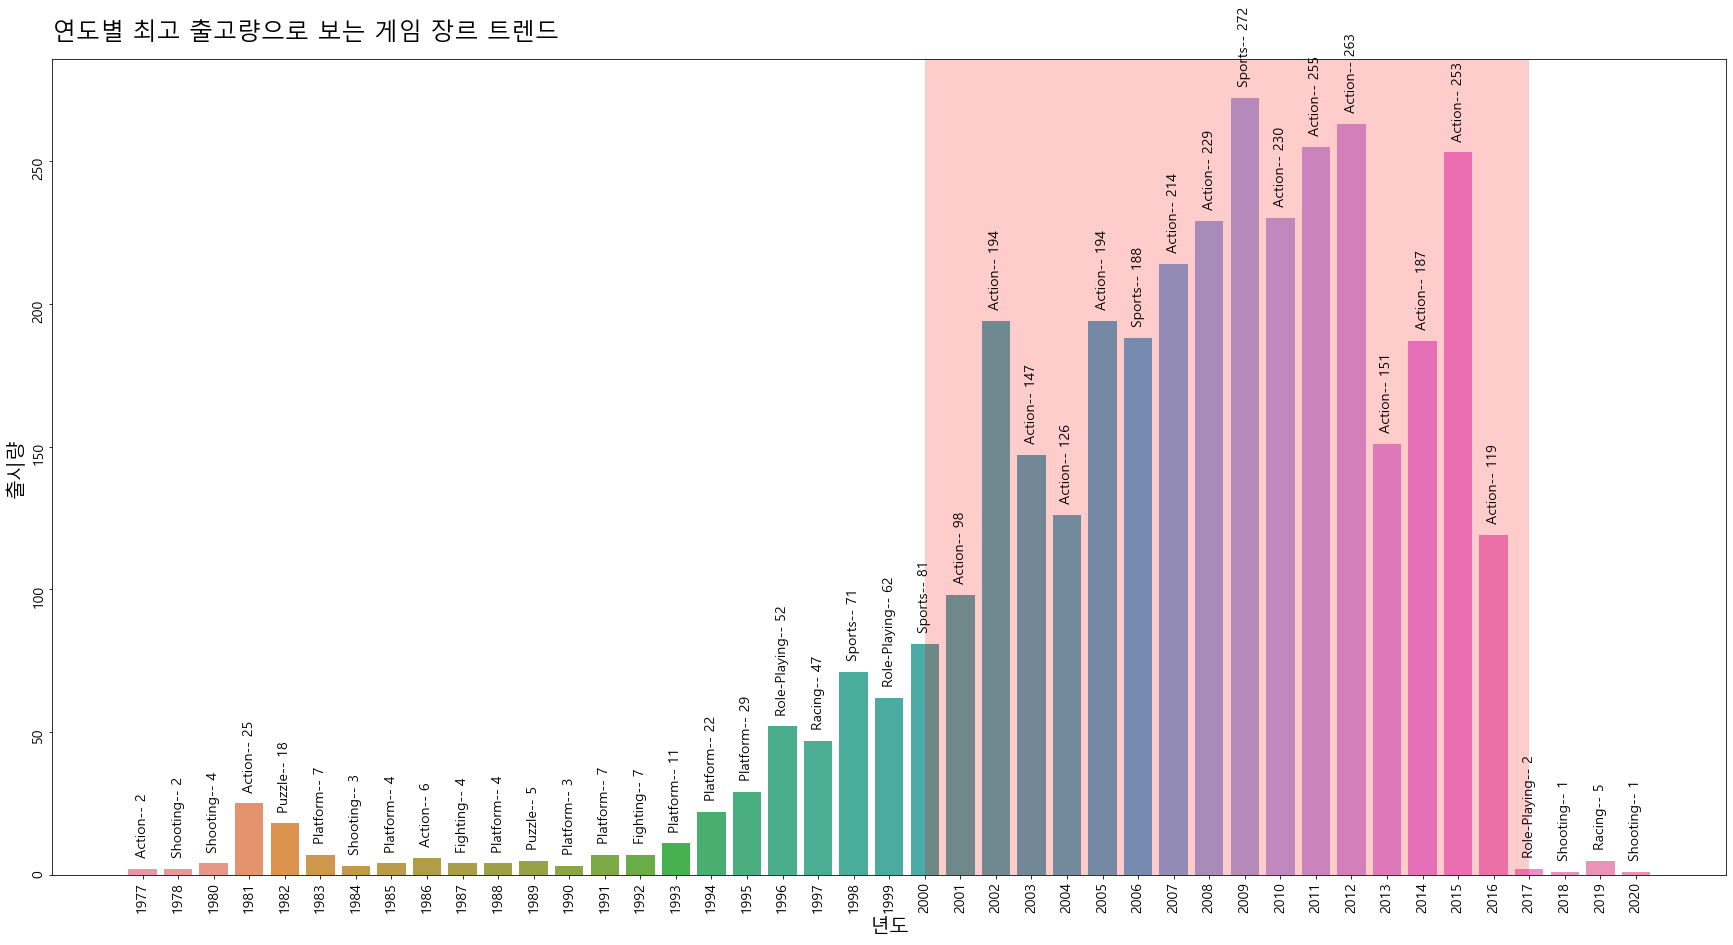

In [201]:
plt.figure(figsize = (30, 15))
ax = sns.barplot(x = '년도', y = '출시량', data = year_max_genre)

idx = 0
for value in year_max_genre['출시량']:
    ax.text(x = idx, y = value + 5, s = str(genre[idx] + '--' + ' ' + str(value)), color = 'black', size = 14, rotation = 90, ha = 'center')
    idx += 1
plt.xticks(rotation = 90, fontsize = 14)
plt.yticks(rotation = 90, fontsize = 14)
plt.xlabel('년도', fontsize = 20)
plt.ylabel('출시량', fontsize = 20)
plt.axvspan(22, 39, 0, 1, facecolor = 'red', alpha = 0.2)
# plt.axvspan(0.25, 0.75, facecolor ='r', alpha = 0.7)

ax.set_title('연도별 최고 출고량으로 보는 게임 장르 트렌드', fontsize = 24, loc = 'left', pad = 20)
# 2000년대 초반부터 2010년 중반에 이르기까지 Action이 최근의 게임장르 트렌드였음을 확인할 수 있다.
# (단, 2010년대 중반부터 2022년 현재에 이르기까지 비교적 더 최근의 데이터 부족으로 해당 기간 새로운 트렌드 변화로 인식하기 어렵다고 판단)

In [103]:
# 1-7. 연도별 최고 판매량으로 보는 게임 장르 트렌드
df_yr_sales = df.groupby(['Year', 'Genre'])['Global_Sales'].sum().reset_index()
df_yr_sales.head(15)
# df_yr_genre = df.groupby(['Year', 'Genre']).size().reset_index(name = 'count') # 연도별 각 장르 출시 개수 확인

,Year,Genre,Global_Sales
0,1977,Action,1.56
1,1977,Puzzle,0.21
2,1977,Racing,0.27
3,1977,Shooting,0.98
4,1978,Action,0.27
5,1978,Puzzle,0.81
6,1978,Shooting,2.53
7,1978,Sports,0.15
8,1980,Action,1.24
9,1980,Adventure,1.30


In [104]:
year_max_sales = df_yr_sales.groupby(['Year'])['Global_Sales'].transform(max) == df_yr_sales['Global_Sales']
year_max_sales = df_yr_sales[year_max_sales].reset_index(drop = True)
year_max_sales.columns = ['년도', '장르', '전세계 판매량']
year_max_sales.head(10)
# df_yg_max = df_yr_genre.groupby(['Year'])['count'].transform(max) == df_yr_genre['count'] # 연도별 최대 출시 개수 저장
# year_max_genre = df_yr_genre[df_yg_max].reset_index(drop = True)
# year_max_genre # 연도별 최대 수 출시 장르와 개수 확인

# 아래 내용 검토할 것
# # 년도별 최고 판매량 기록한 장르 데이터프레임 만들기
# year_max_sales = df.groupby(['Year', 'Genre'])['Global_Sales'].sum().reset_index()
# condition = year_max_sales['Global_Sales'] == year_max_sales.groupby(['Year'])['Global_Sales'].transform(max)
# year_max_sales = year_max_sales[condition]
# year_max_sales.columns = ['년도', '장르', '전세계 판매량']
# year_max_sales[:5]

,년도,장르,전세계 판매량
0,1977,Action,1.56
1,1978,Shooting,2.53
2,1980,Shooting,7.07
3,1981,Action,14.79
4,1982,Puzzle,10.04
5,1983,Platform,6.93
6,1984,Shooting,31.10
7,1985,Platform,43.17
8,1986,Action,13.74
9,1987,Fighting,5.42


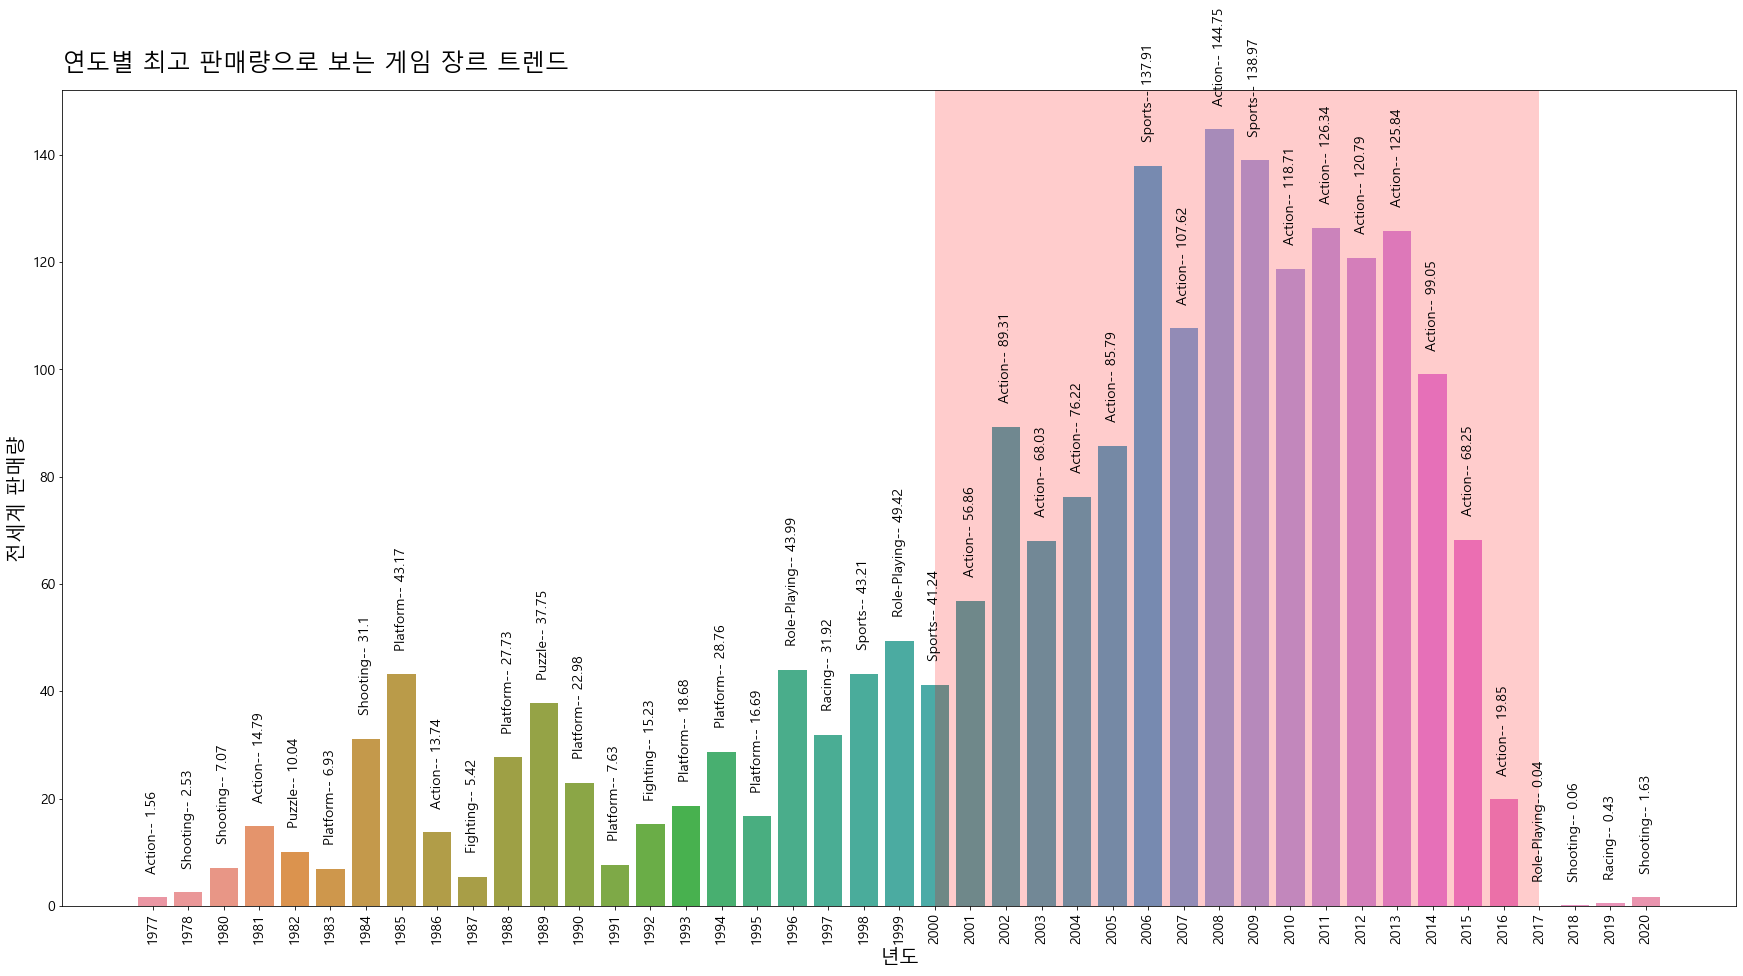

In [202]:
genre = year_max_sales['장르'].values

plt.figure(figsize=(30, 15))
ax = sns.barplot(x='년도', y='전세계 판매량', data=year_max_sales)
idx = 0
for value in year_max_sales['전세계 판매량']:
    ax.text(x = idx, y = value + 5, s = str(genre[idx] + '--' + ' ' + str(round(value, 2))),
            color='black', size=14, rotation=90, ha='center')
    idx += 1
ax.set_title('연도별 최고 판매량으로 보는 게임 장르 트렌드', fontsize = 24, loc = 'left', pad = 20)
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('년도', fontsize=20)
plt.ylabel('전세계 판매량', fontsize=20)
plt.axvspan(22, 39, 0, 1, facecolor = 'red', alpha = 0.2)
# plt.axvspan(0.25, 0.75, facecolor ='r', alpha = 0.7)

plt.show()
# 2000년대 초반~2010년대 중반까지 출시량으로 본 장르 트렌드에서와 마찬가지로 Action 장르가 동기간 높은 판매량을 보였다.
# 달리 말해서 Action 장르가 게임 유저들의 가장 큰 선택을 받았다. *선호가 높다

In [106]:
# 추가 고민할 분석 이슈 (if any)
# 1. 지역별 판매량 비중 (전세계 판매량 대비) > 1-3, 1-4 시각화 참조

In [107]:
# 시각화 2. 플랫폼 Platform
# 2-1. 플랫폼별 판매량 막대그래프

pf_sales = df[['Platform', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
pf_sales.columns = ['플랫폼', '북미 판매량', '유럽 판매량', '일본 판매량', '그외 판매량', '전세계 판매량']
ps_grouped = pf_sales.groupby(['플랫폼']).sum()
ps_grouped

,북미 판매량,유럽 판매량,일본 판매량,그외 판매량,전세계 판매량
플랫폼,,,,,
2600,90.60,5.47,0.00,0.91,96.98
3DO,0.00,0.00,0.10,0.00,0.10
3DS,78.87,58.52,97.35,12.63,247.37
DC,5.43,1.69,8.56,0.27,15.95
DS,390.71,194.63,175.57,60.53,821.44
GB,114.32,47.82,85.12,8.20,255.46
GBA,187.54,75.25,47.33,7.73,317.85
GC,133.46,38.71,21.58,5.18,198.93
GEN,19.27,5.52,2.67,0.89,28.35


In [108]:
ps_grouped_table = ps_grouped.reset_index()
ps_grouped_table.head()

,플랫폼,북미 판매량,유럽 판매량,일본 판매량,그외 판매량,전세계 판매량
0,2600,90.60,5.47,0.00,0.91,96.98
1,3DO,0.00,0.00,0.10,0.00,0.10
2,3DS,78.87,58.52,97.35,12.63,247.37
3,DC,5.43,1.69,8.56,0.27,15.95
4,DS,390.71,194.63,175.57,60.53,821.44


In [109]:
ps_melted = pd.melt(ps_grouped_table, id_vars = ['플랫폼'], value_vars = ps_grouped_table.columns[1:], var_name = '판매국가', value_name = '판매량')
ps_melted.head()

,플랫폼,판매국가,판매량
0,2600,북미 판매량,90.60
1,3DO,북미 판매량,0.00
2,3DS,북미 판매량,78.87
3,DC,북미 판매량,5.43
4,DS,북미 판매량,390.71


In [110]:
ps_melted[-31:].sort_values(by = '판매량', ascending = False) 
# 전세계 플랫폼 인기순위: PS2 > X360 > PS3 > Wii

,플랫폼,판매국가,판매량
140,PS2,전세계 판매량,1255.77
152,X360,전세계 판매량,979.60
141,PS3,전세계 판매량,959.07
150,Wii,전세계 판매량,926.03
128,DS,전세계 판매량,821.44
139,PS,전세계 판매량,730.84
130,GBA,전세계 판매량,317.85
143,PSP,전세계 판매량,296.22
142,PS4,전세계 판매량,278.16
137,PC,전세계 판매량,257.99


In [111]:
# matplotlib 한글 폰트 깨짐 현상 해결 1
import matplotlib.font_manager as fm

font_list = fm.findSystemFonts(fontpaths = None, fontext = 'ttf')
# matplotlib 한글 폰트 깨짐 현상 해결 2 - 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = 'C:\\Windows\\Fonts\\malgun.ttf'
font = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font)

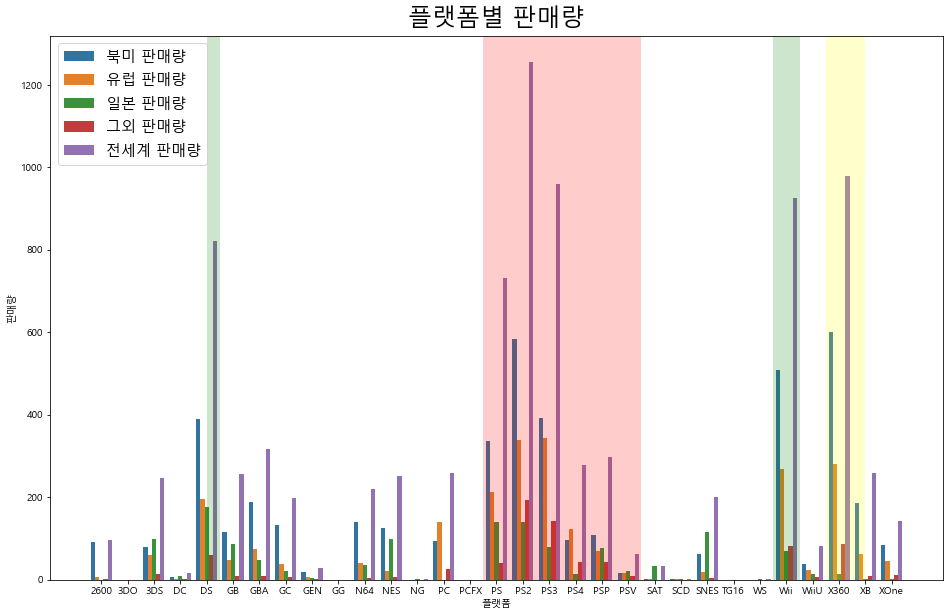

In [223]:
plt.figure(figsize=(16, 10))
sns.barplot(data = ps_melted, x = '플랫폼', y = '판매량', hue = '판매국가')
plt.title('플랫폼별 판매량', loc='center', fontsize=24, pad = 10)
plt.legend(fontsize=15)
plt.axvspan(14.5, 20.5, 0, 1, facecolor = 'red', alpha = 0.2)
plt.axvspan(27.5, 29, 0, 1, facecolor = 'yellow', alpha = 0.2)
plt.axvspan(25.5, 26.5, 0, 1, facecolor = 'green', alpha = 0.2)
plt.axvspan(4, 4.5, 0, 1, facecolor = 'green', alpha = 0.2)
# plt.axvspan(0.25, 0.75, facecolor ='r', alpha = 0.7)


plt.show()

In [113]:
# 2-2. 지역별 최고 판매량 플랫폼 TOP 3
sales_column_list_p = ps_grouped_table.columns[1:]

def pf_top3(df, sales_column_list_p):
    df_new_p = df.loc[:,['플랫폼', sales_column_list_p]].sort_values(by = sales_column_list_p, ascending = False).reset_index(drop = True).head(3)
    df_new_p.columns = ['플랫폼', '판매량']
    return df_new_p

pf_top3_na = pf_top3(ps_grouped_table, '북미 판매량')
pf_top3_eu = pf_top3(ps_grouped_table, '유럽 판매량')
pf_top3_jp = pf_top3(ps_grouped_table, '일본 판매량')
pf_top3_other = pf_top3(ps_grouped_table, '그외 판매량')
pf_top3_global = pf_top3(ps_grouped_table, '전세계 판매량')
pf_top3_na # 북미 판매량 top3 플랫폼 확인

,플랫폼,판매량
0,X360,601.05
1,PS2,583.84
2,Wii,507.71


In [114]:
pf_top3_list = [pf_top3_na, pf_top3_eu, pf_top3_jp, pf_top3_other, pf_top3_global]
pf_top3_list

[    플랫폼     판매량
 0  X360  601.05
 1   PS2  583.84
 2   Wii  507.71,
     플랫폼     판매량
 0   PS3  343.78
 1   PS2  339.29
 2  X360  280.58,
    플랫폼     판매량
 0   DS  175.57
 1   PS  139.82
 2  PS2  139.20,
     플랫폼     판매량
 0   PS2  193.44
 1   PS3  142.59
 2  X360   85.54,
     플랫폼      판매량
 0   PS2  1255.77
 1  X360   979.60
 2   PS3   959.07]

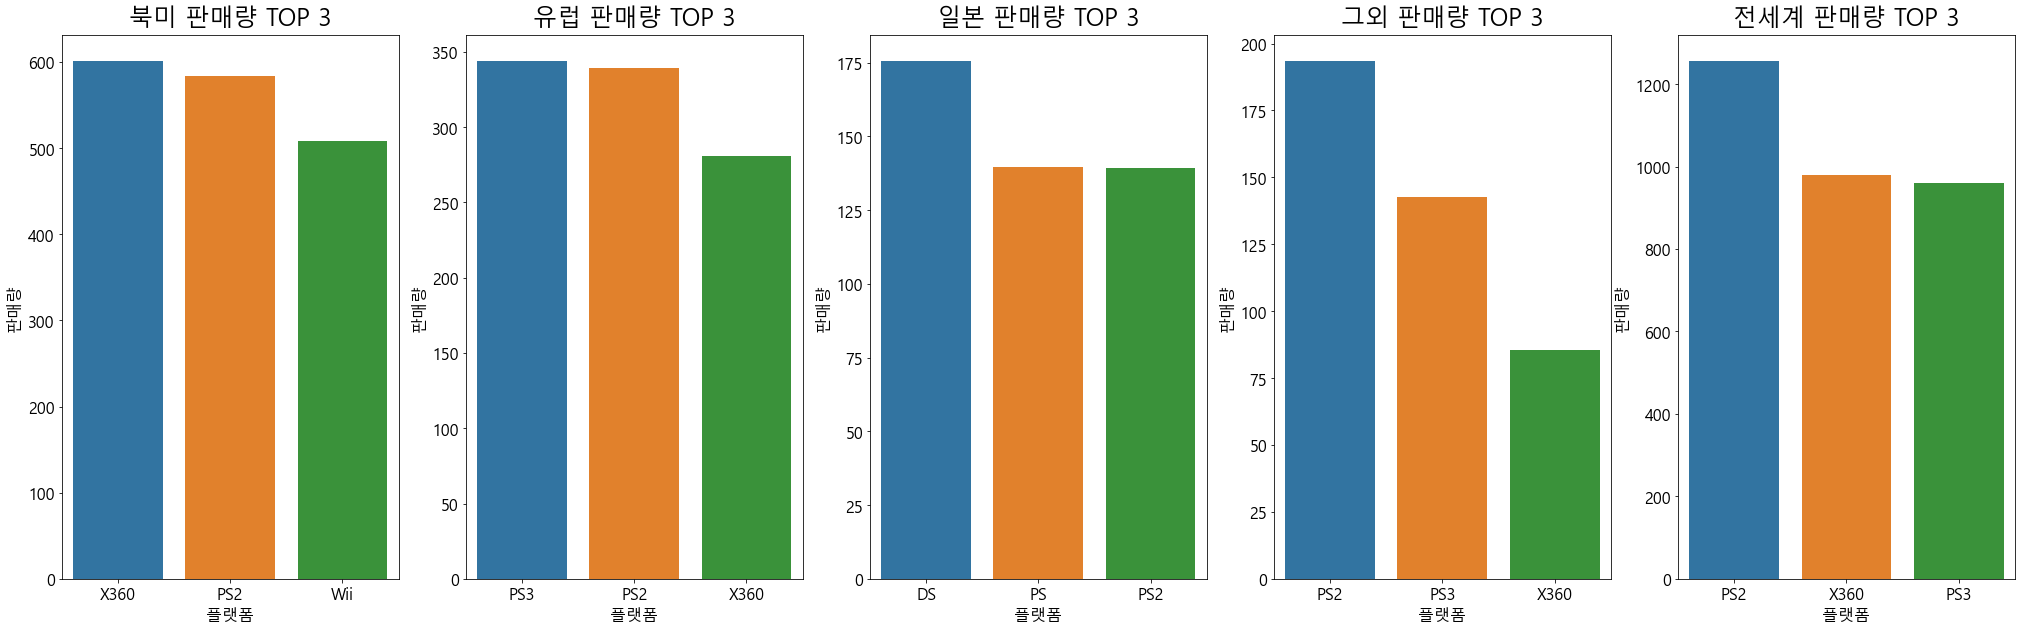

In [115]:
fig, axes = plt.subplots(figsize = (35, 10), nrows = 1, ncols = 5)
for col, i, data in zip(sales_column_list_p, range(len(sales_column_list_p)), pf_top3_list):
    axes[i].set_title(col + ' ' + 'TOP 3', fontsize = 24, pad = 10)
    sns.barplot(x = '플랫폼', y = '판매량', data = data, ax = axes[i])
    axes[i].tick_params(axis = 'both', labelsize = 16)
    axes[i].set_xlabel('플랫폼', fontsize = 16)
    axes[i].set_ylabel('판매량', fontsize = 16)
plt.show()

# 전반적으로 플레이스테이션에 대한 선호가 높은 편

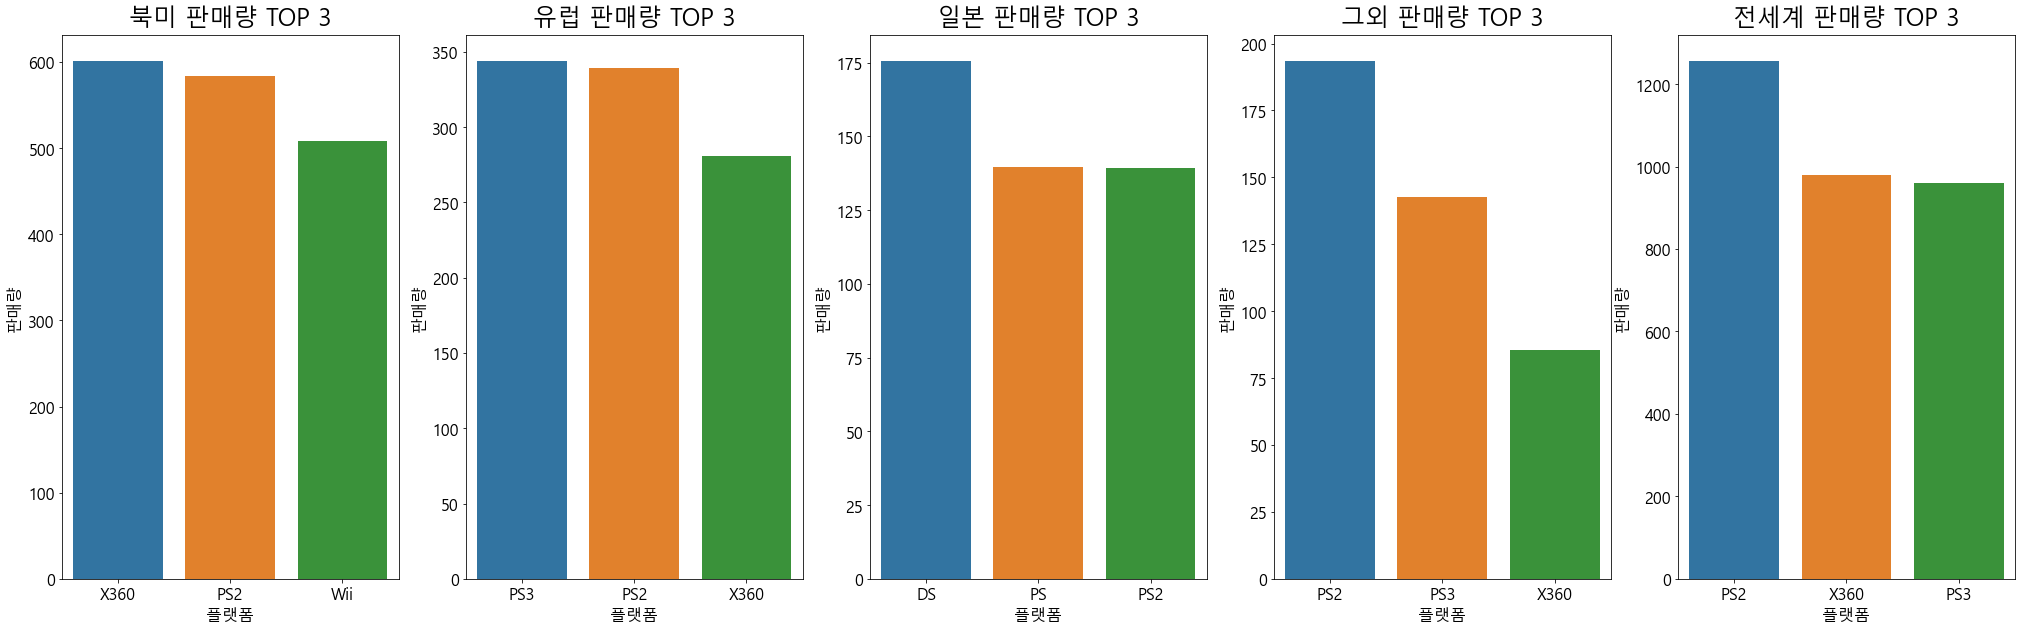

In [116]:
# 2-2-1. 지역별 최고 판매량 플랫폼 TOP 3 (수정)

# sales_column_list_p = ['북미 판매량', '유럽 판매량', '일본 판매량', '그외 판매량', '전세계 판매량']

ps_grouped_table_na = ps_grouped.reset_index().sort_values(by=['북미 판매량'], ascending=False)
ps_grouped_table_eu = ps_grouped.reset_index().sort_values(by=['유럽 판매량'], ascending=False)
ps_grouped_table_jp = ps_grouped.reset_index().sort_values(by=['일본 판매량'], ascending=False)
ps_grouped_table_other = ps_grouped.reset_index().sort_values(by=['그외 판매량'], ascending=False)
ps_grouped_table_global = ps_grouped.reset_index().sort_values(by=['전세계 판매량'], ascending=False)

def pf_top3(df, sales_column_list_p):
    df_new_p = df.loc[:,['플랫폼', sales_column_list_p]].sort_values(by = sales_column_list_p, ascending = False).reset_index(drop = True).head(3)
    df_new_p.columns = ['플랫폼', '판매량']
    return df_new_p

pf_top3_na = pf_top3(ps_grouped_table_na, '북미 판매량')
pf_top3_eu = pf_top3(ps_grouped_table_eu, '유럽 판매량')
pf_top3_jp = pf_top3(ps_grouped_table_jp, '일본 판매량')
pf_top3_other = pf_top3(ps_grouped_table_other, '그외 판매량')
pf_top3_global = pf_top3(ps_grouped_table_global, '전세계 판매량')
# pf_top3_na # 북미 판매량 top3 플랫폼 확인

pf_top3_list = [pf_top3_na, pf_top3_eu, pf_top3_jp, pf_top3_other, pf_top3_global]
pf_top3_list

fig, axes = plt.subplots(figsize = (35, 10), nrows = 1, ncols = 5)
for col, i, data in zip(sales_column_list_p, range(len(sales_column_list_p)), pf_top3_list):
    axes[i].set_title(col + ' ' + 'TOP 3', fontsize = 24, pad = 10)
    sns.barplot(x = '플랫폼', y = '판매량', data = data, ax = axes[i])
    axes[i].tick_params(axis = 'both', labelsize = 16)
    axes[i].set_xlabel('플랫폼', fontsize = 16)
    axes[i].set_ylabel('판매량', fontsize = 16)
plt.show()

# 전반적으로 플레이스테이션에 대한 선호가 높은 편

In [117]:
ps_grouped_table_jp.head(6)

,플랫폼,북미 판매량,유럽 판매량,일본 판매량,그외 판매량,전세계 판매량
4,DS,390.71,194.63,175.57,60.53,821.44
15,PS,336.51,213.60,139.82,40.91,730.84
16,PS2,583.84,339.29,139.20,193.44,1255.77
23,SNES,61.23,19.04,116.55,3.22,200.04
11,NES,125.94,21.15,98.65,5.31,251.05
2,3DS,78.87,58.52,97.35,12.63,247.37


In [118]:
ps_grouped_table_global.head(6)

,플랫폼,북미 판매량,유럽 판매량,일본 판매량,그외 판매량,전세계 판매량
16,PS2,583.84,339.29,139.20,193.44,1255.77
28,X360,601.05,280.58,12.43,85.54,979.60
17,PS3,392.67,343.78,80.03,142.59,959.07
26,Wii,507.71,268.38,69.33,80.61,926.03
4,DS,390.71,194.63,175.57,60.53,821.44
15,PS,336.51,213.60,139.82,40.91,730.84


In [119]:
# 2-2-2. 지역별 최고 판매량 플랫폼 TOP 5 파이 차트

sales_column_list_p = ps_grouped_table.columns[1:]

def pf_top5(df, sales_column_list_p):
    df_new_p5 = df.loc[:,['플랫폼', sales_column_list_p]].sort_values(by = sales_column_list_p, ascending = False).reset_index(drop = True).head(5)
    df_new_p5.columns = ['플랫폼', '판매량']
    return df_new_p5

pf_top5_na = pf_top5(ps_grouped_table, '북미 판매량')
pf_top5_eu = pf_top5(ps_grouped_table, '유럽 판매량')
pf_top5_jp = pf_top5(ps_grouped_table, '일본 판매량')
pf_top5_other = pf_top5(ps_grouped_table, '그외 판매량')
pf_top5_global = pf_top5(ps_grouped_table, '전세계 판매량')
# pf_top5_na # 북미 판매량 top3 플랫폼 확인

pf_top5_list = [pf_top5_na, pf_top5_eu, pf_top5_jp, pf_top5_other, pf_top5_global]
# pf_top5_list


In [120]:
ps_grouped_table.head(5)

,플랫폼,북미 판매량,유럽 판매량,일본 판매량,그외 판매량,전세계 판매량
0,2600,90.60,5.47,0.00,0.91,96.98
1,3DO,0.00,0.00,0.10,0.00,0.10
2,3DS,78.87,58.52,97.35,12.63,247.37
3,DC,5.43,1.69,8.56,0.27,15.95
4,DS,390.71,194.63,175.57,60.53,821.44


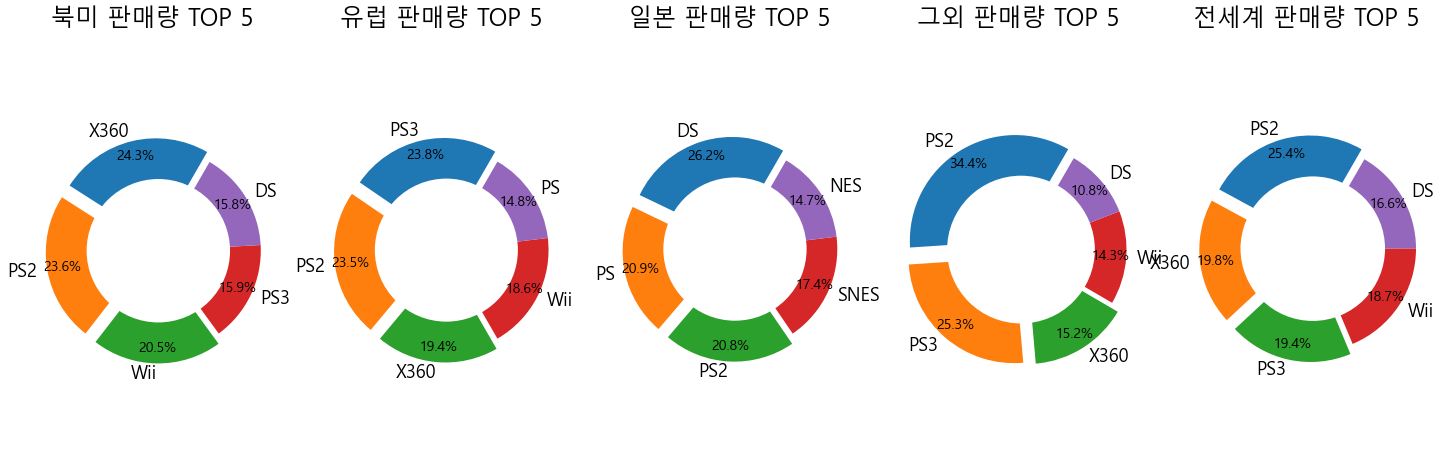

In [121]:
fig, axes = plt.subplots(1, 5, figsize = (25, 8))
plt.subplots_adjust(wspace = 0.2) # subplots간의 너비 간격 조절

# 각 subplot에 pie plot 그리기
explode = (0.1, 0.1, 0.1, 0, 0) # 퍼짐 정도 조절
for i in range(len(sales_column_list_p)):
	ax = axes[i] # subplot 선택
	wedges, texts, autotexts = ax.pie(pf_top5_list[i].판매량, explode = explode, labels = pf_top5_list[i].플랫폼,
	                                  autopct = '%.1f%%', pctdistance = 0.85,
	                                  shadow = False, startangle = 60)
	for w in wedges: # 조각 설정
		w.set_linewidth(0)
		w.set_edgecolor('w')
		
	for t in texts: # label 설정
		t.set_color('k')
		t.set_fontsize(18)
		
	for a in autotexts: # 퍼센티지 설정
		a.set_color('black')
		a.set_fontsize(14)
    
	centre_circle = plt.Circle((0,0), 0.7, color='black', fc='white', linewidth=0) # 파이차트를 도넛차트로 보이게 하는 trick
	ax.add_artist(centre_circle)
	axes[i].set_title(sales_column_list_p[i] + ' ' + 'TOP 5', fontsize = 24, pad = 2)
	ax.axis('equal')

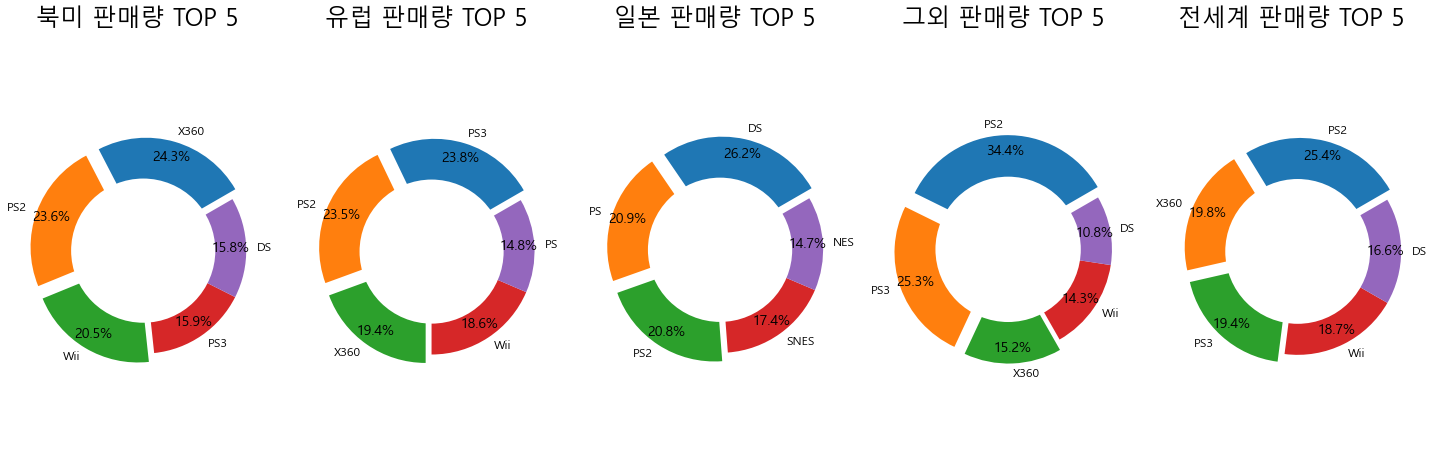

In [122]:
# 2-2-2-1. 지역별 최고 판매량 플랫폼 TOP 5 파이 차트 (수정)

# sales_column_list_p = ['북미 판매량', '유럽 판매량', '일본 판매량', '그외 판매량', '전세계 판매량']

# ps_grouped_table_na = ps_grouped.reset_index().sort_values(by=['북미 판매량'], ascending=False)
# ps_grouped_table_eu = ps_grouped.reset_index().sort_values(by=['유럽 판매량'], ascending=False)
# ps_grouped_table_jp = ps_grouped.reset_index().sort_values(by=['일본 판매량'], ascending=False)
# ps_grouped_table_other = ps_grouped.reset_index().sort_values(by=['그외 판매량'], ascending=False)
# ps_grouped_table_global = ps_grouped.reset_index().sort_values(by=['전세계 판매량'], ascending=False)


def pf_top5(df, sales_column_list_p):
    df_new_p5 = df.loc[:,['플랫폼', sales_column_list_p]].sort_values(by = sales_column_list_p, ascending = False).reset_index(drop = True).head(5)
    df_new_p5.columns = ['플랫폼', '판매량']
    return df_new_p5

pf_top5_na = pf_top5(ps_grouped_table_na, '북미 판매량')
pf_top5_eu = pf_top5(ps_grouped_table_eu, '유럽 판매량')
pf_top5_jp = pf_top5(ps_grouped_table_jp, '일본 판매량')
pf_top5_other = pf_top5(ps_grouped_table_other, '그외 판매량')
pf_top5_global = pf_top5(ps_grouped_table_global, '전세계 판매량')
# pf_top5_na # 북미 판매량 top3 플랫폼 확인

pf_top5_list = [pf_top5_na, pf_top5_eu, pf_top5_jp, pf_top5_other, pf_top5_global]
# pf_top5_list

fig, axes = plt.subplots(1, 5, figsize = (25, 8))
plt.subplots_adjust(wspace = 0.2) # subplots간의 너비 간격 조절

# 각 subplot에 pie plot 그리기
explode = (0.1, 0.1, 0.1, 0, 0) # 퍼짐 정도 조절
for i in range(len(sales_column_list_p)):
	ax = axes[i] # subplot 선택
	wedges, texts, autotexts = ax.pie(pf_top5_list[i].판매량, explode = explode, labels = pf_top5_list[i].플랫폼,
	                                  autopct = '%.1f%%', pctdistance = 0.85,
	                                  shadow = False, startangle = 30)
	for w in wedges: # 조각 설정
		w.set_linewidth(0)
		w.set_edgecolor('w')
		
	for t in texts: # label 설정
		t.set_color('k')
		t.set_fontsize(12)
		
	for a in autotexts: # 퍼센티지 설정
		a.set_color('black')
		a.set_fontsize(14)
    
	centre_circle = plt.Circle((0,0), 0.7, color='black', fc='white', linewidth=0) # 파이차트를 도넛차트로 보이게 하는 trick
	ax.add_artist(centre_circle)
	axes[i].set_title(sales_column_list_p[i] + ' ' + 'TOP 5', fontsize = 24, pad = 2)
	ax.axis('equal')

In [123]:
ps_grouped_table_jp.head(5) # = ps_grouped.reset_index().sort_values(by=['일본 판매량'], ascending=False)

,플랫폼,북미 판매량,유럽 판매량,일본 판매량,그외 판매량,전세계 판매량
4,DS,390.71,194.63,175.57,60.53,821.44
15,PS,336.51,213.60,139.82,40.91,730.84
16,PS2,583.84,339.29,139.20,193.44,1255.77
23,SNES,61.23,19.04,116.55,3.22,200.04
11,NES,125.94,21.15,98.65,5.31,251.05


In [124]:
ps_grouped_table_global.head(5) # = ps_grouped.reset_index().sort_values(by=['전세계 판매량'], ascending=False)

,플랫폼,북미 판매량,유럽 판매량,일본 판매량,그외 판매량,전세계 판매량
16,PS2,583.84,339.29,139.20,193.44,1255.77
28,X360,601.05,280.58,12.43,85.54,979.60
17,PS3,392.67,343.78,80.03,142.59,959.07
26,Wii,507.71,268.38,69.33,80.61,926.03
4,DS,390.71,194.63,175.57,60.53,821.44


In [125]:
# 2-3. 연도별 가장 많은 게임을 출시한 플랫폼
df_yr_pf = df.groupby(['Year', 'Platform']).size().reset_index(name = 'count')
df_yr_pf.head(15) # df_yr_pf.shape: (260, 3)
# df_yr_genre = df.groupby(['Year', 'Genre']).size().reset_index(name = 'count') # 연도별 각 장르 출시 개수 확인

,Year,Platform,count
0,1977,2600,5
1,1978,2600,5
2,1980,2600,14
3,1981,2600,46
4,1982,2600,37
5,1983,2600,11
6,1983,NES,6
7,1984,2600,1
8,1984,NES,13
9,1985,2600,1


In [126]:
year_max_pf = df_yr_pf.groupby(['Year'])['count'].transform(max) == df_yr_pf['count']
year_max_pf = df_yr_pf[year_max_pf].reset_index(drop = True)

# 아래 내용 검토할 것!
# # 가장 값이 큰 값만 뽑기
# condition = year_max_pf.groupby(['Year'])['count'].transform(max) == year_max_pf['count']
# year_max_pf = year_max_pf[condition].reset_index(drop=True)

year_max_pf = year_max_pf.drop_duplicates(subset = ['Year', 'count'], keep = 'last').reset_index(drop = True) # 중복치 제거, 마지막 데이터만 남겨줌
year_max_pf.columns = ['년도', '플랫폼', '출시량']
year_max_pf.head(30)
# df_yg_max = df_yr_genre.groupby(['Year'])['count'].transform(max) == df_yr_genre['count'] # 연도별 최대 출시 개수 저장
# year_max_genre = df_yr_genre[df_yg_max].reset_index(drop = True)
# year_max_genre # 연도별 최대 수 출시 장르와 개수 확인

,년도,플랫폼,출시량
0,1977,2600,5
1,1978,2600,5
2,1980,2600,14
3,1981,2600,46
4,1982,2600,37
5,1983,2600,11
6,1984,NES,13
7,1985,NES,11
8,1986,NES,19
9,1987,NES,10


In [127]:
year_max_pf[-10:] # 년도 중복 데이터 삭제 확인 가능 (예. 2021년)

,년도,플랫폼,출시량
33,2011,PS3,223
34,2012,PS3,148
35,2013,PS3,128
36,2014,PS3,109
37,2015,PS4,137
38,2016,PS4,107
39,2017,PSV,2
40,2018,XB,1
41,2019,PC,2
42,2020,PC,1


In [128]:
platform = year_max_pf['플랫폼'].values # n of values: 43

In [239]:
platform

array(['2600', '2600', '2600', '2600', '2600', '2600', 'NES', 'NES',
       'NES', 'NES', 'NES', 'GB', 'NES', 'SNES', 'SNES', 'SNES', 'SNES',
       'PS', 'PS', 'PS', 'PS', 'PS', 'PS', 'PS2', 'PS2', 'PS2', 'PS2',
       'PS2', 'PS2', 'DS', 'DS', 'DS', 'DS', 'PS3', 'PS3', 'PS3', 'PS3',
       'PS4', 'PS4', 'PSV', 'XB', 'PC', 'PC'], dtype=object)

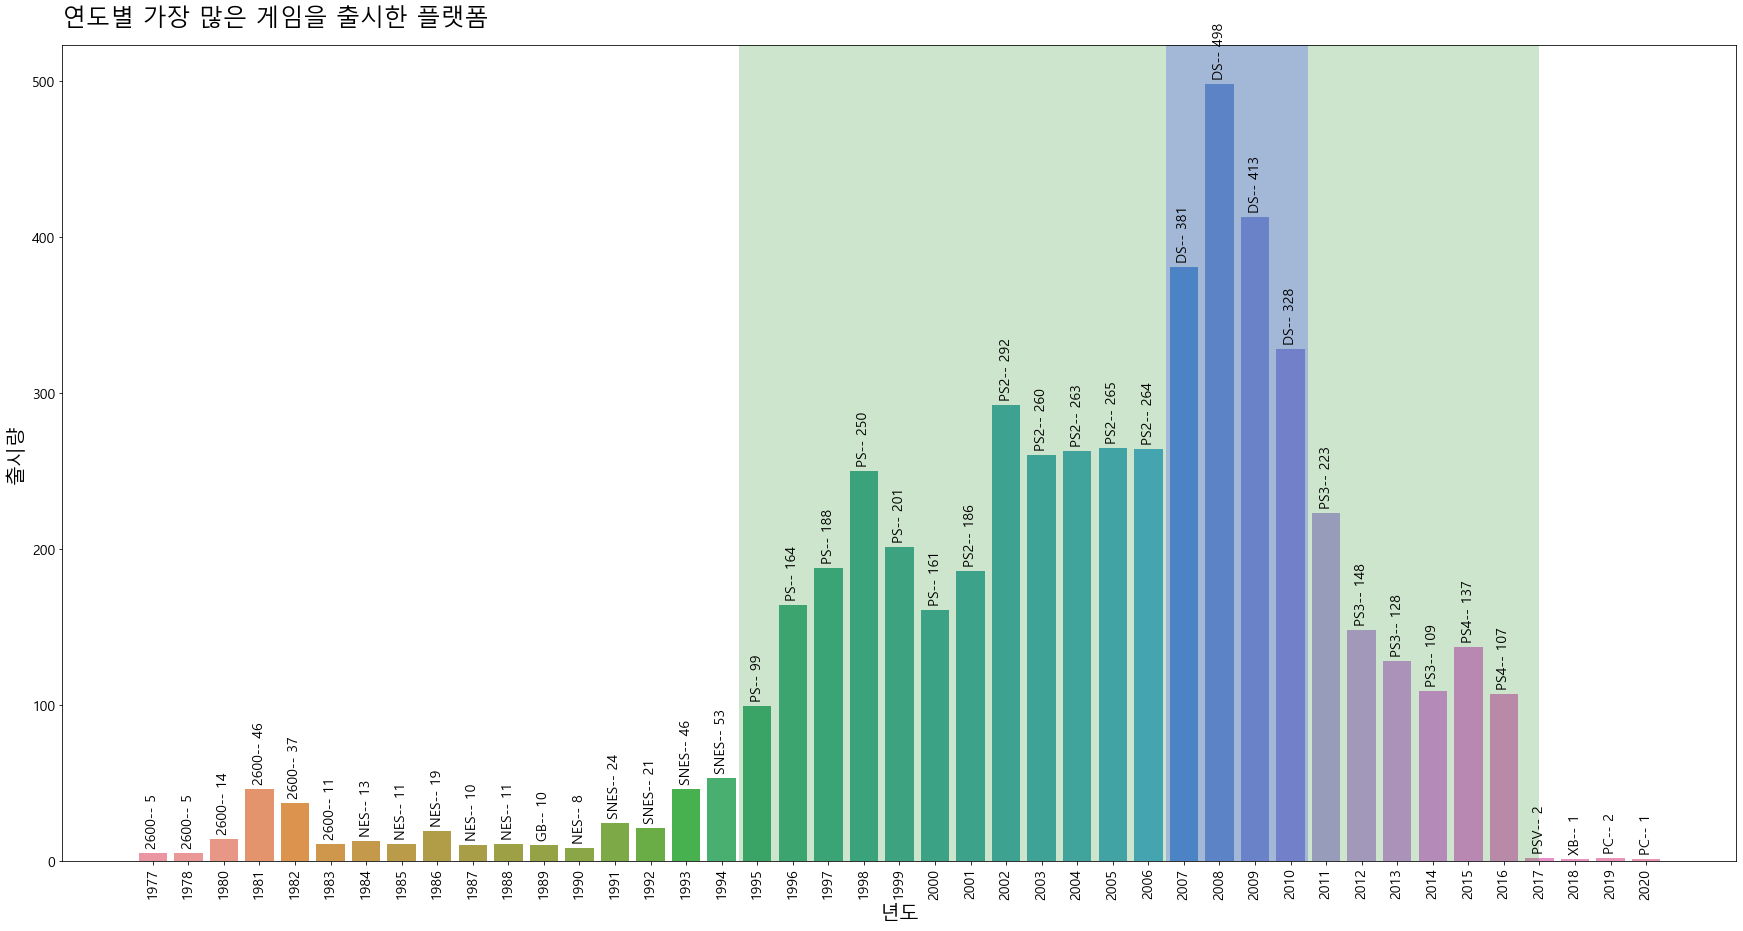

In [231]:
platform = year_max_pf['플랫폼'].values

plt.figure(figsize=(30, 15))
ax = sns.barplot(x='년도', y='출시량', data=year_max_pf)
idx = 0
for value in year_max_pf['출시량']:
    ax.text(x = idx, y = value + 5, s = str(platform[idx] + '--' + ' ' + str(value)),
            color='black', size=14, rotation=90, ha='center')
    idx += 1
ax.set_title('연도별 가장 많은 게임을 출시한 플랫폼', fontsize = 24, loc = 'left', pad = 20)
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('년도', fontsize=20)
plt.ylabel('출시량', fontsize=20)
plt.axvspan(16.5, 39, 0, 1, facecolor = 'green', alpha = 0.2)
plt.axvspan(28.5, 32.5, 0, 1, facecolor = 'blue', alpha = 0.2)
# plt.axvspan(0.25, 0.75, facecolor ='r', alpha = 0.7)
plt.show()
# 1990년대 중반부터 플레이스테이션이 꾸준히 높은 출시량을 기록 * = 시장 점유...?
# 2007~2010년까지 닌텐도 DS의 출시량이 두드러지게 높았음

In [130]:
# 2-3. 연도별 가장 많은 게임 판매량을 기록한 플랫폼

yr_pf_sales = df.groupby(['Year', 'Platform'])['Global_Sales'].sum().reset_index()
yr_pf_sales.head(15)
# df_yr_genre = df.groupby(['Year', 'Genre']).size().reset_index(name = 'count') # 연도별 각 장르 출시 개수 확인

,Year,Platform,Global_Sales
0,1977,2600,3.02
1,1978,2600,3.76
2,1980,2600,14.42
3,1981,2600,35.68
4,1982,2600,29.35
5,1983,2600,5.84
6,1983,NES,10.96
7,1984,2600,0.27
8,1984,NES,50.08
9,1985,2600,0.45


In [131]:
# year_max_pf_sales = yr_pf_sales.groupby(['Year'])['Global_Sales'].transform(max) == df_yr_sales['Global_Sales']
# year_max_pf_sales = yr_pf_sales[year_max_pf_sales].reset_index(drop = True)

# 아래 내용 검토할 것! (위 내용 대체 가능할수도)

yr_pf_sales = df.groupby(['Year', 'Platform'])['Global_Sales'].sum().reset_index()
yr_pf_sales.head(15)

condition = yr_pf_sales['Global_Sales'] == yr_pf_sales.groupby(['Year'])['Global_Sales'].transform(max)
year_max_pf_sales = yr_pf_sales[condition]

year_max_pf_sales.columns = ['년도', '플랫폼', '전세계 판매량']
year_max_pf_sales.head(10)
# df_yg_max = df_yr_genre.groupby(['Year'])['count'].transform(max) == df_yr_genre['count'] # 연도별 최대 출시 개수 저장
# year_max_genre = df_yr_genre[df_yg_max].reset_index(drop = True)
# year_max_genre # 연도별 최대 수 출시 장르와 개수 확인

,년도,플랫폼,전세계 판매량
0,1977,2600,3.02
1,1978,2600,3.76
2,1980,2600,14.42
3,1981,2600,35.68
4,1982,2600,29.35
6,1983,NES,10.96
8,1984,NES,50.08
11,1985,NES,53.44
14,1986,NES,36.41
16,1987,NES,19.76


In [132]:
platform = year_max_pf_sales['플랫폼'].values

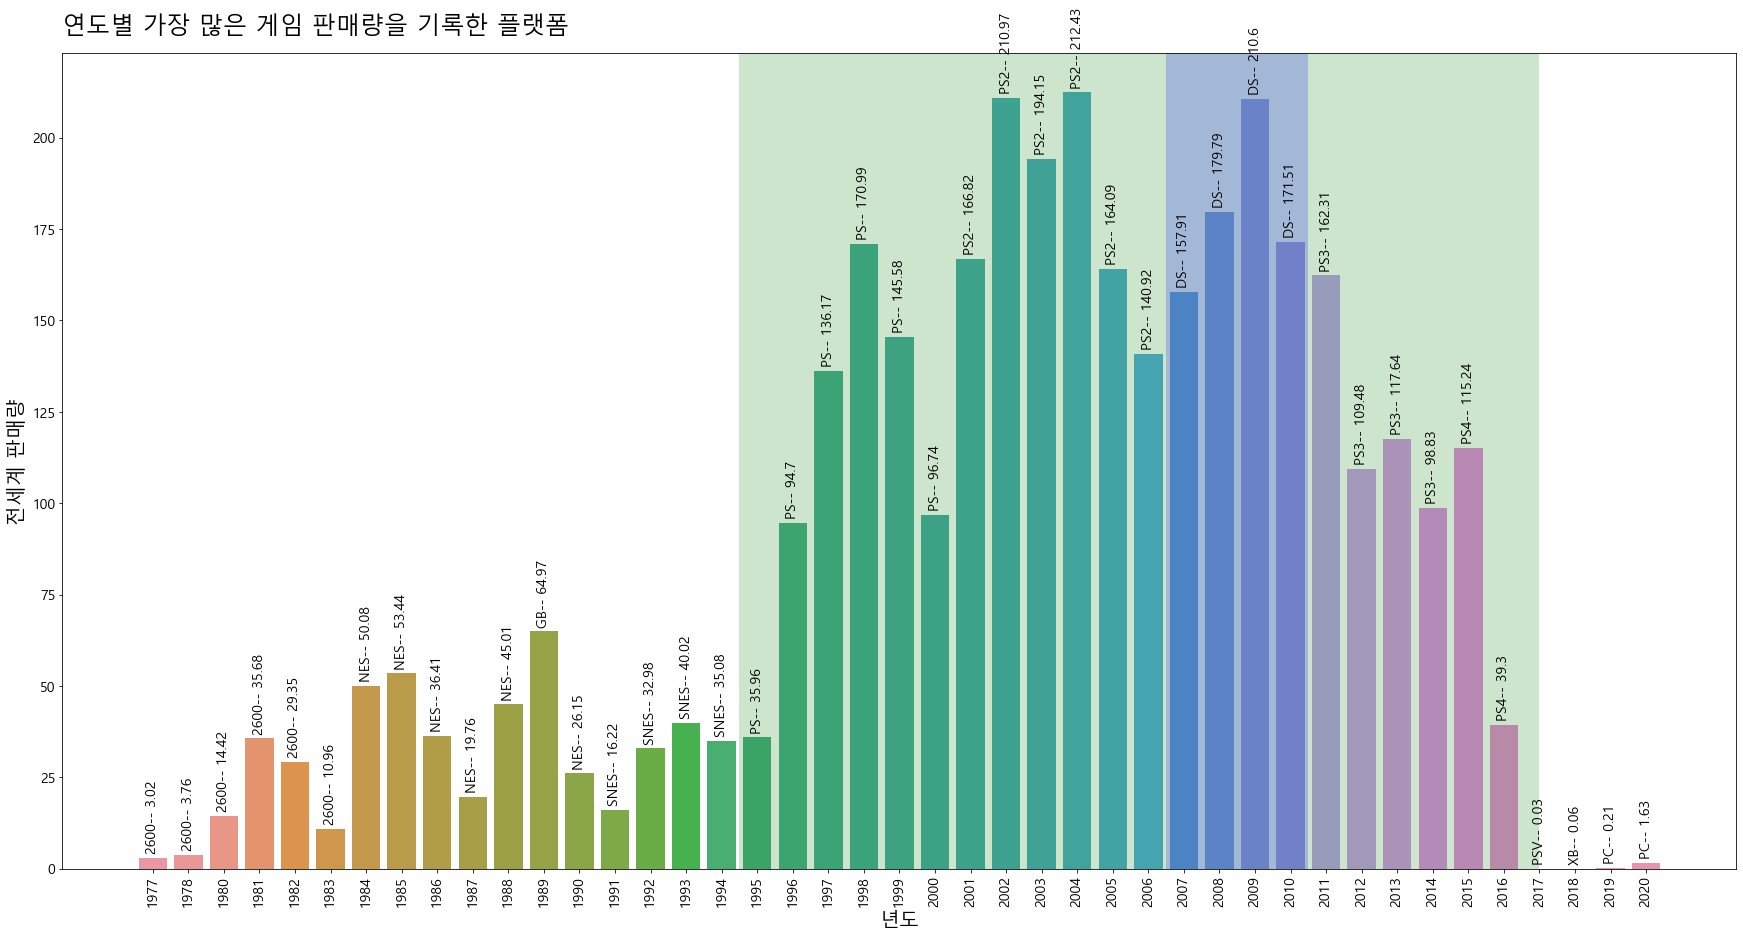

In [232]:
plt.figure(figsize=(30, 15))
ax = sns.barplot(x='년도', y='전세계 판매량', data=year_max_pf_sales)
idx = 0
for value in year_max_pf_sales['전세계 판매량']:
    ax.text(x = idx, y = value + 2, s = str(platform[idx] + '--' + ' ' + str(round(value, 2))),
            color = 'black', size = 14, rotation = 90, ha = 'center')
    idx += 1
ax.set_title('연도별 가장 많은 게임 판매량을 기록한 플랫폼', fontsize = 24, loc = 'left', pad = 20)
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('년도', fontsize=20)
plt.ylabel('전세계 판매량', fontsize=20)
plt.axvspan(16.5, 39, 0, 1, facecolor = 'green', alpha = 0.2)
plt.axvspan(28.5, 32.5, 0, 1, facecolor = 'blue', alpha = 0.2)
# plt.axvspan(0.25, 0.75, facecolor ='r', alpha = 0.7)

plt.show()
# 출시량이 높았던 플레이스테이션이 꾸준히 높은 판매량을 기록하고 있음 (소비자 선호도 가장 높다)
# 2006~2009년까지 잠시 Wii의 인기가 높았지만 이후 플레이스테이션, XBOX의 후속작에 밀림

In [134]:
# 시각화 3. 게임회사 Publisher
# 3-1. 게임회사별 판매량

pub_sales = df[['Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
pub_sales.columns = ['게임회사명', '북미 판매량', '유럽 판매량', '일본 판매량', '그외 판매량', '전세계 판매량']
pubs_grouped = pub_sales.groupby(['게임회사명']).sum()
pubs_grouped

,북미 판매량,유럽 판매량,일본 판매량,그외 판매량,전세계 판매량
게임회사명,,,,,
10TACLE Studios,0.07,0.04,0.00,0.00,0.11
1C Company,0.01,0.07,0.00,0.02,0.10
20th Century Fox Video Games,1.82,0.10,0.00,0.01,1.93
2D Boy,0.00,0.03,0.00,0.01,0.04
3DO,6.48,3.04,0.00,0.63,10.15
...,...,...,...,...,...
id Software,0.02,0.00,0.00,0.00,0.02
imageepoch Inc.,0.00,0.00,0.04,0.00,0.04
inXile Entertainment,0.02,0.06,0.00,0.01,0.09


In [135]:
pubs_grouped_table = pubs_grouped.reset_index().sort_values(by=['전세계 판매량'], ascending=False).head(6) 
# 데이터셋 내 전체 591개 게임회사 중 판매량 상위 6개 회사만 대상으로 시각화 진행
pubs_grouped_table # pubs_grouped_table.shape: (6, 6)

,게임회사명,북미 판매량,유럽 판매량,일본 판매량,그외 판매량,전세계 판매량
367,Nintendo,817.92,419.13,455.75,95.36,1788.16
141,Electronic Arts,595.07,371.27,14.04,129.77,1110.15
22,Activision,429.70,215.53,6.54,75.34,727.11
466,Sony Computer Entertainment,265.89,187.97,74.10,80.47,608.43
536,Ubisoft,253.43,163.32,7.50,50.26,474.51
504,Take-Two Interactive,220.49,118.14,5.83,55.24,399.70


In [138]:
pubs_melted = pd.melt(pubs_grouped_table, id_vars = ['게임회사명'], value_vars = pubs_grouped_table.columns[1:], var_name = '판매국가', value_name = '판매량')
pubs_melted.head()

,게임회사명,판매국가,판매량
0,Nintendo,북미 판매량,817.92
1,Electronic Arts,북미 판매량,595.07
2,Activision,북미 판매량,429.70
3,Sony Computer Entertainment,북미 판매량,265.89
4,Ubisoft,북미 판매량,253.43


In [139]:
pubs_melted[-6:].sort_values(by = '판매량', ascending = False)
# 전세계 게임회사 판매량 순위: Nintendo > Electronic Arts > Activision > Sony Computer Entertainment

,게임회사명,판매국가,판매량
24,Nintendo,전세계 판매량,1788.16
25,Electronic Arts,전세계 판매량,1110.15
26,Activision,전세계 판매량,727.11
27,Sony Computer Entertainment,전세계 판매량,608.43
28,Ubisoft,전세계 판매량,474.51
29,Take-Two Interactive,전세계 판매량,399.70


In [140]:
# matplotlib 한글 폰트 깨짐 현상 해결 1
import matplotlib.font_manager as fm

font_list = fm.findSystemFonts(fontpaths = None, fontext = 'ttf')
# matplotlib 한글 폰트 깨짐 현상 해결 2 - 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = 'C:\\Windows\\Fonts\\malgun.ttf'
font = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font)

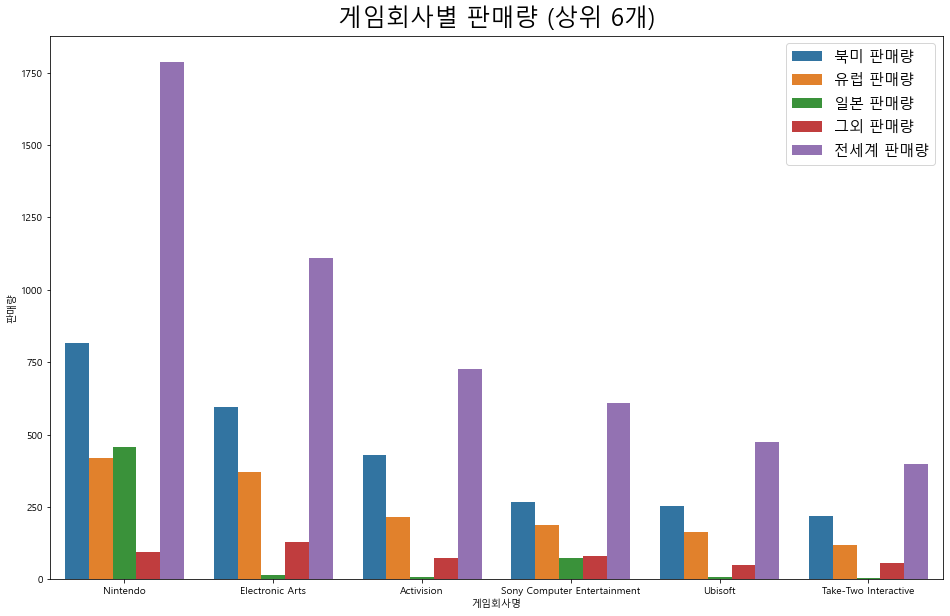

In [141]:
plt.figure(figsize=(16, 10))
sns.barplot(data = pubs_melted, x = '게임회사명', y = '판매량', hue = '판매국가')
plt.title('게임회사별 판매량 (상위 6개)', loc='center', fontsize=24, pad = 10)
plt.legend(fontsize=15)
plt.show()

# 전세계 게임회사 판매량 순위: Nintendo > Electronic Arts > Activision > Sony Computer Entertainment
# 북미, 유럽의 경우 전세계 순위와 동일한 양상
# 일본의 경우 Nintendo, Sony Computer Entertainment 등 자국 회사 선호 뚜렷 

In [142]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Bandai Namco Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25


In [143]:
# 3-2. 연도별 가장 많은 게임을 출시한 게임회사

year_max_pubs = df.groupby(['Year', 'Publisher']).size().reset_index(name = 'count')
condition = year_max_pubs['count'] == year_max_pubs.groupby(['Year'])['count'].transform(max)
year_max_pubs = year_max_pubs[condition]
# 윗 두줄 의미??
year_max_pubs[:15] # year_max_pubs.shape: (49, 3)

,Year,Publisher,count
0,1977,Atari,4
2,1978,Atari,5
3,1980,Activision,7
4,1980,Atari,7
7,1981,Atari,11
22,1982,Atari,14
39,1983,Atari,6
40,1983,Nintendo,6
45,1984,Nintendo,9
51,1985,Nintendo,7


In [144]:
year_max_pubs = year_max_pubs.drop_duplicates(subset = ['Year', 'count'], keep = 'last').reset_index(drop = True)
year_max_pubs.columns = ['년도', '게임회사명', '출시량']

In [235]:
year_max_pubs.head()

,년도,게임회사명,출시량
0,1977,Atari,4
1,1978,Atari,5
2,1980,Atari,7
3,1981,Atari,11
4,1982,Atari,14


In [253]:
publisher = year_max_pubs['게임회사명'].values # values: 42 + unknown

In [240]:
df[df.Publisher == 'Unknown']

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
30,Kids Learn Music A+ Edition,DS,2011,Misc,Unknown,0.05,0.00,0.00,0.00,0.05
109,Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales),Wii,2009,Racing,Unknown,0.00,0.00,0.02,0.00,0.02
212,Wild West Shootout,Wii,2010,Shooting,Unknown,0.01,0.01,0.00,0.00,0.02
358,Majesty 2: The Fantasy Kingdom Sim,X360,2009,Simulation,Unknown,0.03,0.00,0.00,0.00,0.03
387,Gummy Bears Mini Golf,Wii,2010,Sports,Unknown,0.04,0.00,0.00,0.00,0.04
...,...,...,...,...,...,...,...,...,...,...
16397,Afrika,PS3,2008,Adventure,Unknown,0.12,0.00,0.08,0.01,0.21
16399,The Golf Club,XOne,2014,Sports,Unknown,0.02,0.00,0.00,0.00,0.02
16422,Yoostar on MTV,X360,2011,Misc,Unknown,0.06,0.00,0.00,0.00,0.06
16429,Bejeweled 3,X360,2010,Puzzle,Unknown,0.13,0.00,0.00,0.01,0.14


In [254]:
df.loc[((df.Name == 'Sonic the Hedgehog')&(df.Global_Sales == 1.18)), 'Year'] = 2003
# df.loc[df.Publisher == 'Namco Banai Games', 'Publisher'] = 'Bandai Namco Games'

In [252]:
df[df.Name == 'Sonic the Hedgehog']

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
8651,Sonic the Hedgehog,PS3,2003,Platform,Sega,0.41,0.55,0.04,0.66,1.66
10043,Sonic the Hedgehog,X360,2006,Platform,Sega,0.44,0.49,0.0,0.11,1.04
14727,Sonic the Hedgehog,GEN,1991,Platform,Sega,3.03,0.91,0.26,0.13,4.33
15703,Sonic the Hedgehog,PS3,3,Platform,Sega,0.41,0.07,0.04,0.66,1.18


In [255]:
df[df.Name == 'Sonic the Hedgehog']

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
8651,Sonic the Hedgehog,PS3,2003,Platform,Sega,0.41,0.55,0.04,0.66,1.66
10043,Sonic the Hedgehog,X360,2006,Platform,Sega,0.44,0.49,0.0,0.11,1.04
14727,Sonic the Hedgehog,GEN,1991,Platform,Sega,3.03,0.91,0.26,0.13,4.33
15703,Sonic the Hedgehog,PS3,2003,Platform,Sega,0.41,0.07,0.04,0.66,1.18


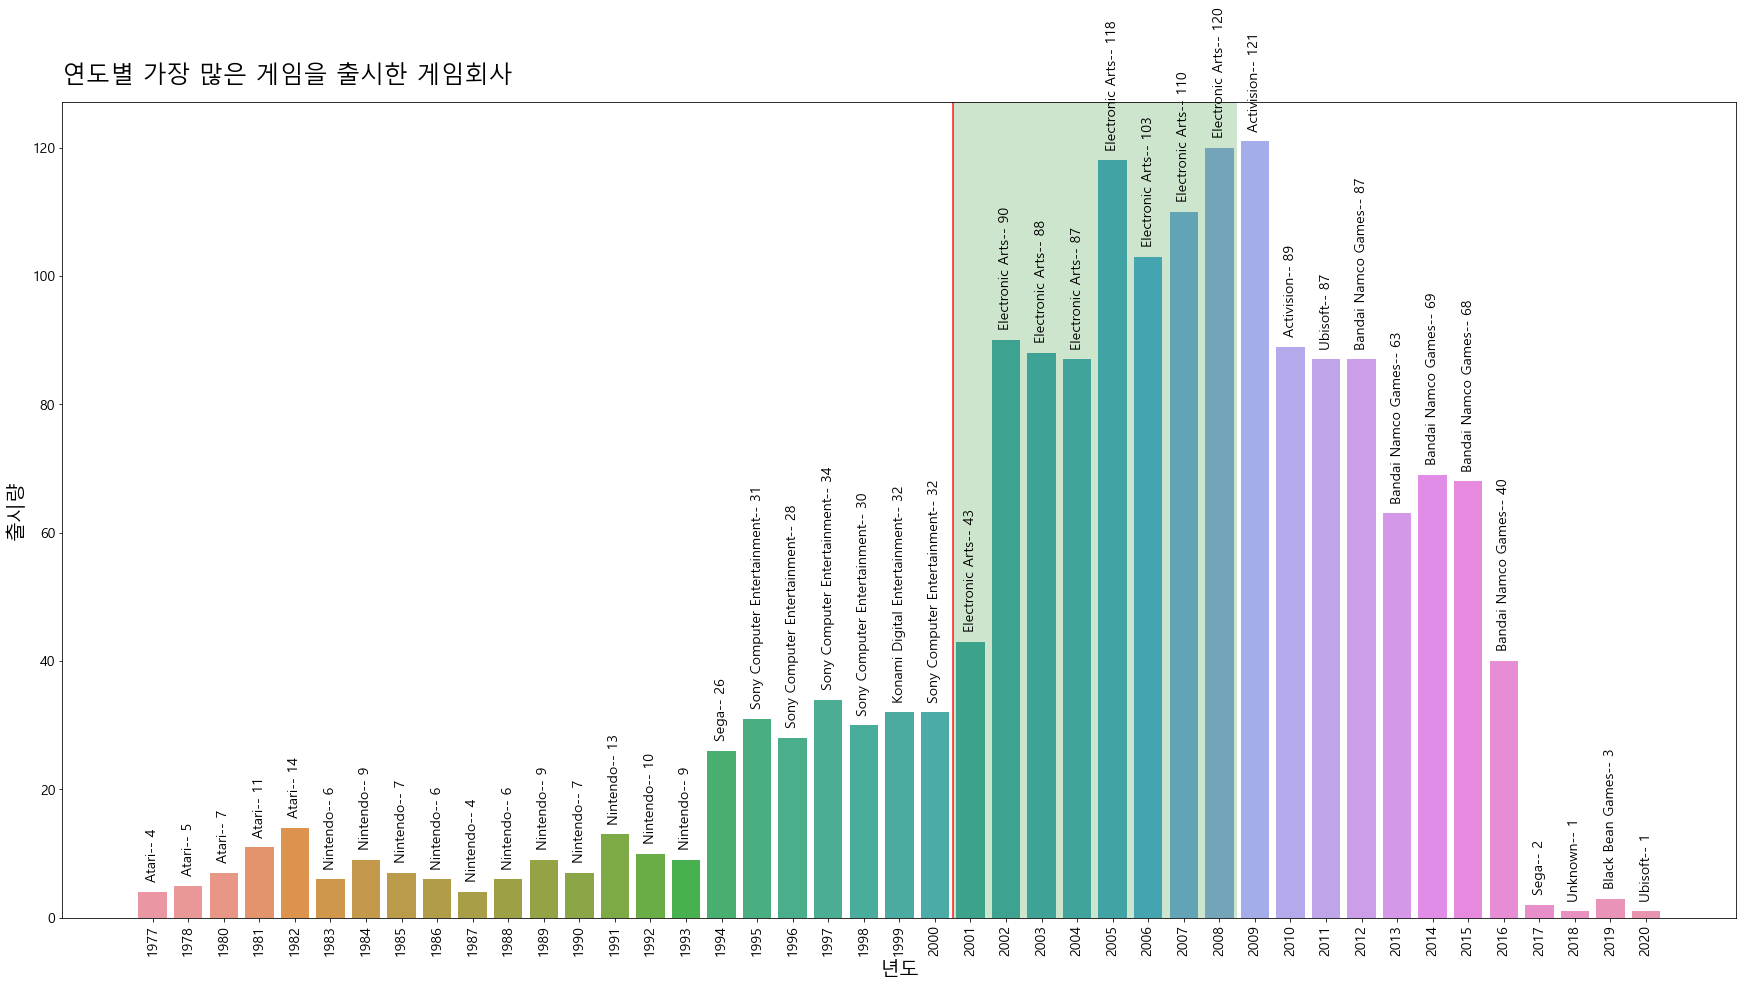

In [273]:
plt.figure(figsize=(30, 15))
ax = sns.barplot(x='년도', y='출시량', data=year_max_pubs)
idx = 0
for value in year_max_pubs['출시량']:
    ax.text(x = idx, y = value + 2, s = str(publisher[idx] + '--' + ' ' + str(value)),
            color = 'black', size = 14, rotation = 90, ha = 'center')
    idx += 1
ax.set_title('연도별 가장 많은 게임을 출시한 게임회사', fontsize = 24, loc = 'left', pad = 20)
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('년도', fontsize=20)
plt.ylabel('출시량', fontsize=20)
plt.axvspan(22.5, 30.5, 0, 1, facecolor = 'green', alpha = 0.2)
# plt.axvspan(0.25, 0.75, facecolor ='r', alpha = 0.7)
plt.axvline(22.5, 0, 1, color = 'red', alpha = 0.9)

plt.show()
# 1990년대까지는 일본 회사들이 주축을 이루다가 2000년대에 들어서며 미국회사인 Electronic Arts 사의 부상
# 2012~2016년 사이 Namco Bandai Games 사가 가장 높은 출시량 기록

In [ ]:
# 3-3. 연도별 가장 많은 게임 판매량을 기록한 게임회사

year_max_pubs_sales = df.groupby(['Year', 'Publisher'])['Global_Sales'].sum().reset_index(name = 'sales')
condition = year_max_pubs_sales['sales'] == year_max_pubs_sales.groupby(['Year'])['sales'].transform(max)
year_max_pubs_sales = year_max_pubs_sales[condition]
# 윗 두줄 의미
year_max_pubs_sales.head(5)

In [148]:
year_max_pubs_sales = year_max_pubs_sales.drop_duplicates(subset = ['Year', 'sales'], keep = 'last').reset_index(drop = True)
year_max_pubs_sales.columns = ['년도', '게임회사명', '판매량']

In [149]:
publisher = year_max_pubs_sales['게임회사명'].values

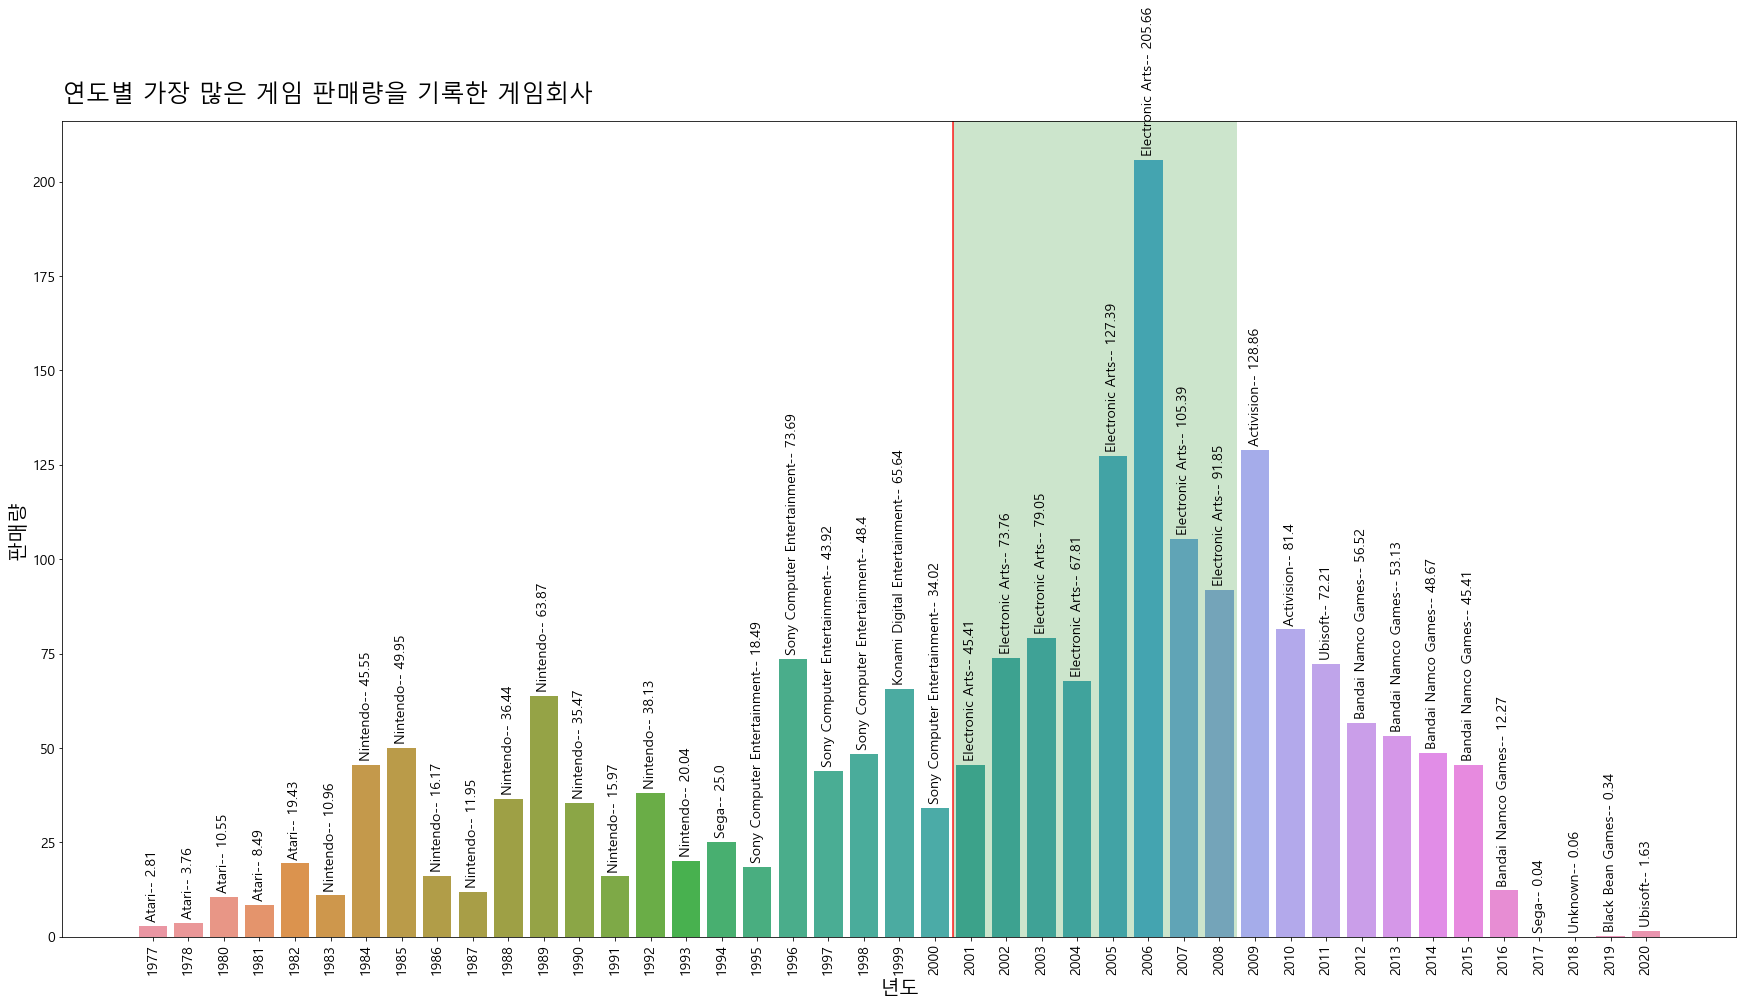

In [277]:
plt.figure(figsize=(30, 15))
ax = sns.barplot(x = '년도', y = '판매량', data = year_max_pubs_sales)
idx = 0
for value in year_max_pubs_sales['판매량']:
    ax.text(x = idx, y = value + 2, s = str(publisher[idx] + '--' + ' ' + str(round(value, 2))),
            color = 'black', size = 14, rotation = 90, ha = 'center')
    idx += 1
ax.set_title('연도별 가장 많은 게임 판매량을 기록한 게임회사', fontsize = 24, loc = 'left', pad = 20)
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('년도', fontsize=20)
plt.ylabel('판매량', fontsize=20)
plt.axvspan(22.5, 30.5, 0, 1, facecolor = 'green', alpha = 0.2)
# plt.axvspan(0.25, 0.75, facecolor ='r', alpha = 0.7)
plt.axvline(22.5, 0, 1, color = 'red', alpha = 0.9)
plt.show()
# 1990년대 후반 Sony 사의 공격적인 게임 출시전략에도 불구하고 판매량은 닌텐도 사에 밀림
# 2000년대 초반부터 등장한 Electronic Arts 사는 출시량에 발맞춰 높은 판매량을 확보함
# 2006~2009년까지 Nintendo 사의 높은 판매량은 잠시 상승했던 Wii의 인기와 일맥상통
# 전반적으로 게임 판매량은 특정 게임회사의 영향력보다 출시한 게임 자체의 영향을 많이 받았던 것으로 보임

In [151]:
pubs_grouped_table

,게임회사명,북미 판매량,유럽 판매량,일본 판매량,그외 판매량,전세계 판매량
367,Nintendo,817.92,419.13,455.75,95.36,1788.16
141,Electronic Arts,595.07,371.27,14.04,129.77,1110.15
22,Activision,429.70,215.53,6.54,75.34,727.11
466,Sony Computer Entertainment,265.89,187.97,74.10,80.47,608.43
536,Ubisoft,253.43,163.32,7.50,50.26,474.51
504,Take-Two Interactive,220.49,118.14,5.83,55.24,399.70


In [154]:
# sales_column_list_pub

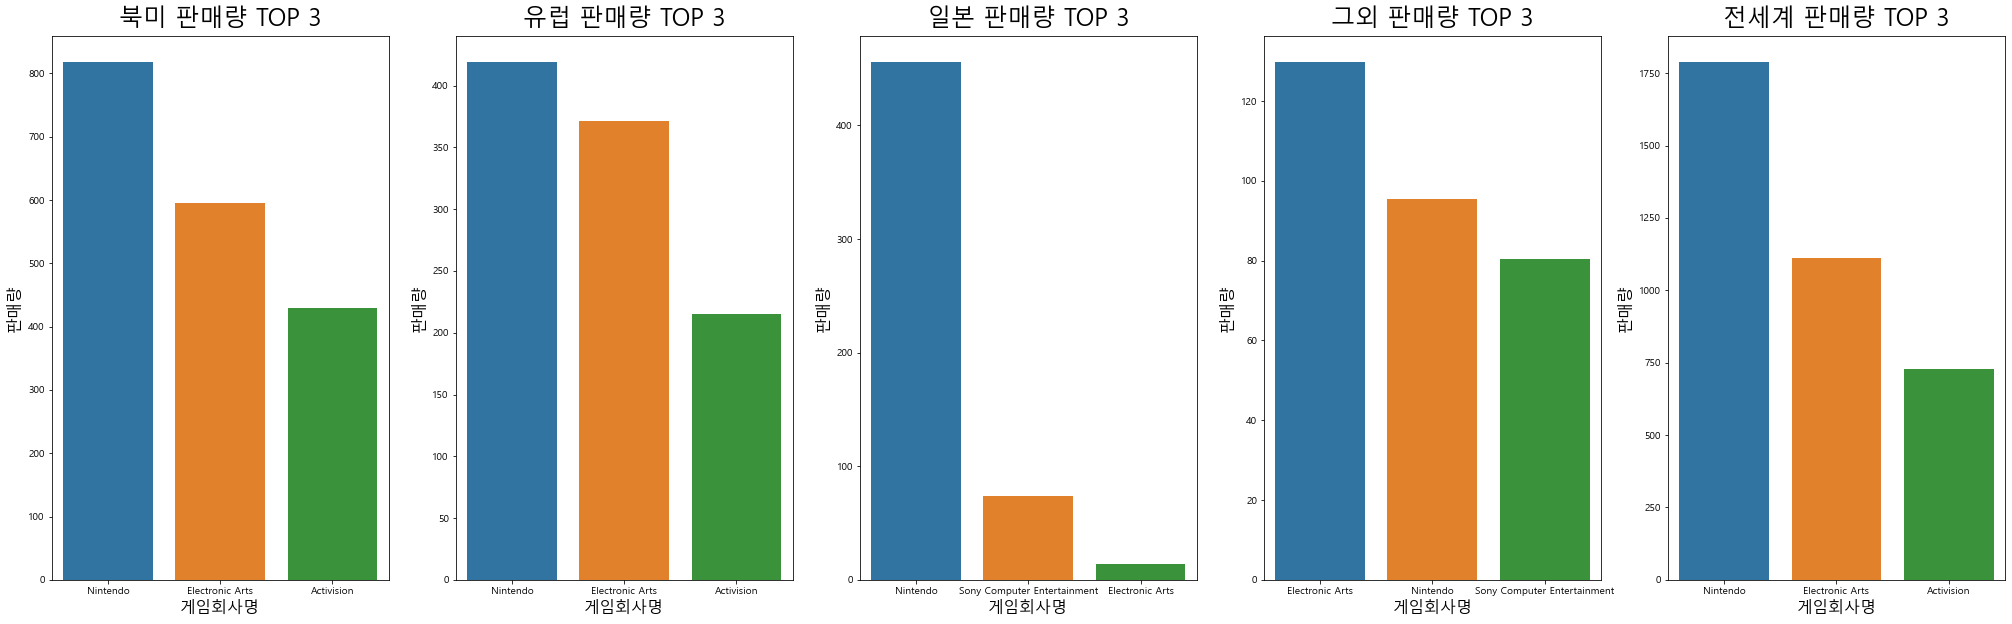

In [155]:
# 3-4. 지역별 가장 많은 게임 판매량을 기록한 게임회사 TOP 3 - 바차트

# pub_sales = df[['Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']] # in # 3-1. 게임회사별 판매량
# pub_sales.columns = ['게임회사명', '북미 판매량', '유럽 판매량', '일본 판매량', '그외 판매량', '전세계 판매량']
# pubs_grouped = pub_sales.groupby(['게임회사명']).sum()
# pubs_grouped_table = pubs_grouped.reset_index().sort_values(by=['전세계 판매량'], ascending=False).head(6) # 데이터셋 내 전체 591개 게임회사 중 판매량 상위 6개 회사만 대상으로 시각화 진행
# pubs_grouped_table.head() # pubs_grouped_table.shape: (6, 6)

sales_column_list_pub = pubs_grouped_table.columns[1:]

def pub_top3(df, sales_column_list_pub):
    df_new_pub = df.loc[:,['게임회사명', sales_column_list_pub]].sort_values(by = sales_column_list_pub, ascending = False).reset_index(drop = True).head(3)
    df_new_pub.columns = ['게임회사명', '판매량']
    return df_new_pub

pub_top3_na = pub_top3(pubs_grouped_table, '북미 판매량')
pub_top3_eu = pub_top3(pubs_grouped_table, '유럽 판매량')
pub_top3_jp = pub_top3(pubs_grouped_table, '일본 판매량')
pub_top3_other = pub_top3(pubs_grouped_table, '그외 판매량')
pub_top3_global = pub_top3(pubs_grouped_table, '전세계 판매량')
# pub_top3_na # 북미 판매량 top3 확인

pub_top3_list = [pub_top3_na, pub_top3_eu, pub_top3_jp, pub_top3_other, pub_top3_global]
# pub_top3_list

fig, axes = plt.subplots(figsize = (35, 10), nrows = 1, ncols = 5)
for col, i, data in zip(sales_column_list_pub, range(len(sales_column_list_pub)), pub_top3_list):
    axes[i].set_title(col + ' ' + 'TOP 3', fontsize = 24, pad = 10)
    sns.barplot(x = '게임회사명', y = '판매량', data = data, ax = axes[i])
    axes[i].tick_params(axis = 'both', labelsize = 10)
    axes[i].set_xlabel('게임회사명', fontsize = 16)
    axes[i].set_ylabel('판매량', fontsize = 16)
plt.show()

In [156]:
pubs_grouped.reset_index().sort_values(by=['일본 판매량'], ascending=False).head(6)

,게임회사명,북미 판매량,유럽 판매량,일본 판매량,그외 판매량,전세계 판매량
367,Nintendo,817.92,419.13,455.75,95.36,1788.16
64,Bandai Namco Games,69.67,42.68,127.34,14.70,254.39
284,Konami Digital Entertainment,92.16,69.69,91.40,30.31,283.56
466,Sony Computer Entertainment,265.89,187.97,74.10,80.47,608.43
87,Capcom,78.59,39.22,68.13,14.84,200.78
456,Sega,109.81,82.55,57.07,25.18,274.61


In [157]:
pubs_grouped.reset_index().sort_values(by=['전세계 판매량'], ascending=False).head(6)

,게임회사명,북미 판매량,유럽 판매량,일본 판매량,그외 판매량,전세계 판매량
367,Nintendo,817.92,419.13,455.75,95.36,1788.16
141,Electronic Arts,595.07,371.27,14.04,129.77,1110.15
22,Activision,429.70,215.53,6.54,75.34,727.11
466,Sony Computer Entertainment,265.89,187.97,74.10,80.47,608.43
536,Ubisoft,253.43,163.32,7.50,50.26,474.51
504,Take-Two Interactive,220.49,118.14,5.83,55.24,399.70


In [158]:
pubs_grouped.reset_index().sort_values(by=['전세계 판매량'], ascending=False).head(6)

,게임회사명,북미 판매량,유럽 판매량,일본 판매량,그외 판매량,전세계 판매량
367,Nintendo,817.92,419.13,455.75,95.36,1788.16
141,Electronic Arts,595.07,371.27,14.04,129.77,1110.15
22,Activision,429.70,215.53,6.54,75.34,727.11
466,Sony Computer Entertainment,265.89,187.97,74.10,80.47,608.43
536,Ubisoft,253.43,163.32,7.50,50.26,474.51
504,Take-Two Interactive,220.49,118.14,5.83,55.24,399.70


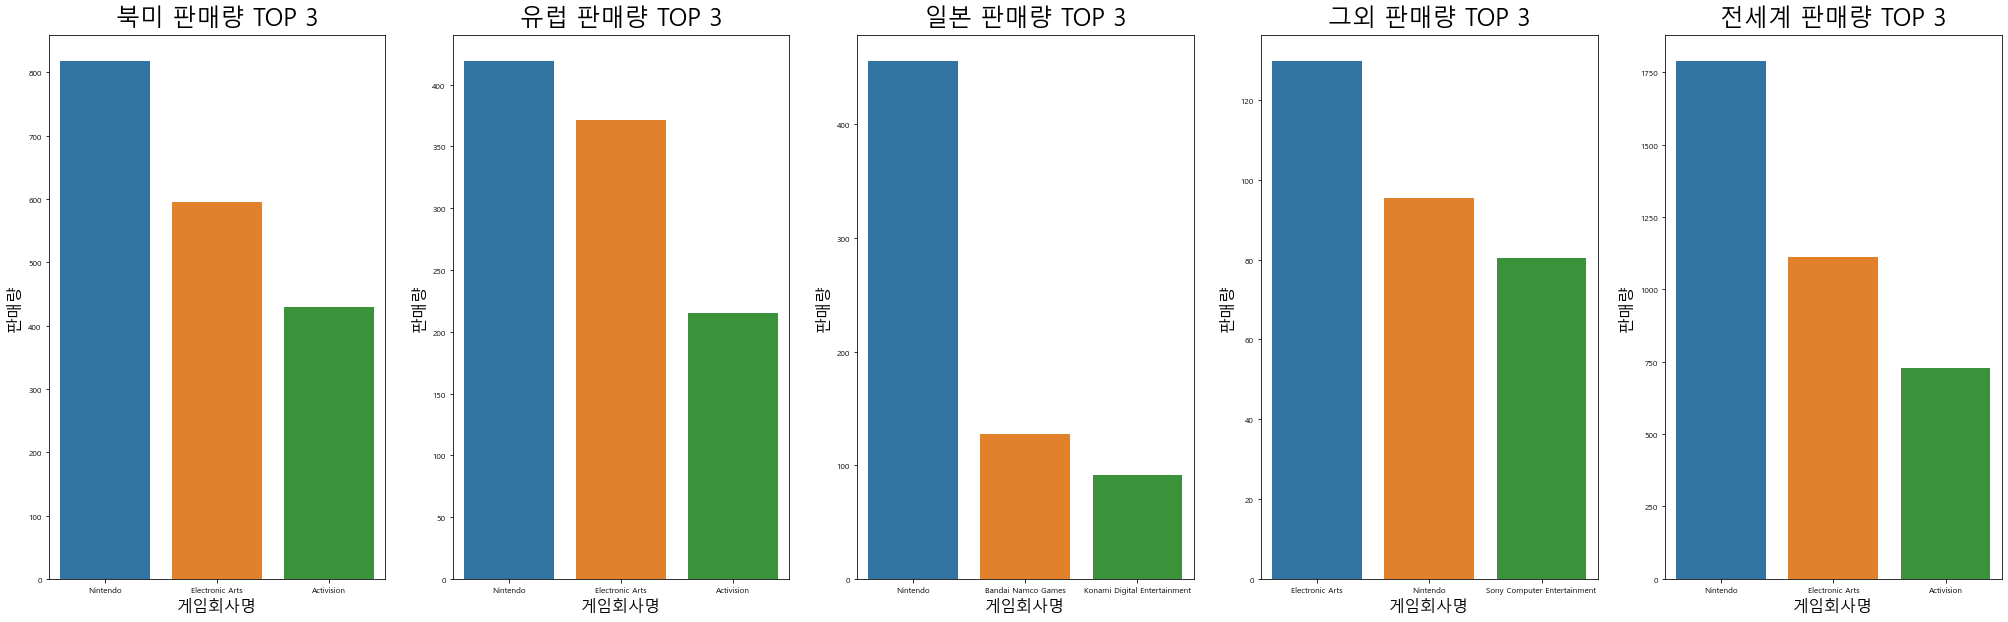

In [159]:
# 3-4-1. 지역별 가장 많은 게임 판매량을 기록한 게임회사 TOP 3 - 바차트 (수정)

sales_column_list_pub = ['북미 판매량', '유럽 판매량', '일본 판매량', '그외 판매량', '전세계 판매량']

def pub_top3(df, sales_column_list_pub):
    df_new_pub = df.loc[:,['게임회사명', sales_column_list_pub]].sort_values(by = sales_column_list_pub, ascending = False).reset_index(drop = True).head(3)
    df_new_pub.columns = ['게임회사명', '판매량']
    return df_new_pub

pubs_grouped_table_na = pubs_grouped.reset_index().sort_values(by=['북미 판매량'], ascending=False)
pubs_grouped_table_eu = pubs_grouped.reset_index().sort_values(by=['유럽 판매량'], ascending=False)
pubs_grouped_table_jp = pubs_grouped.reset_index().sort_values(by=['일본 판매량'], ascending=False)
pubs_grouped_table_other = pubs_grouped.reset_index().sort_values(by=['그외 판매량'], ascending=False)
pubs_grouped_table_global = pubs_grouped.reset_index().sort_values(by=['전세계 판매량'], ascending=False)

pub_top3_na = pub_top3(pubs_grouped_table_na, '북미 판매량')
pub_top3_eu = pub_top3(pubs_grouped_table_eu, '유럽 판매량')
pub_top3_jp = pub_top3(pubs_grouped_table_jp, '일본 판매량')
pub_top3_other = pub_top3(pubs_grouped_table_other, '그외 판매량')
pub_top3_global = pub_top3(pubs_grouped_table_global, '전세계 판매량')
# pub_top3_na # 북미 판매량 top3 확인

pub_top3_list = [pub_top3_na, pub_top3_eu, pub_top3_jp, pub_top3_other, pub_top3_global]
# pub_top3_list

fig, axes = plt.subplots(figsize = (35, 10), nrows = 1, ncols = 5)
for col, i, data in zip(sales_column_list_pub, range(len(sales_column_list_pub)), pub_top3_list):
    axes[i].set_title(col + ' ' + 'TOP 3', fontsize = 24, pad = 10)
    sns.barplot(x = '게임회사명', y = '판매량', data = data, ax = axes[i])
    axes[i].tick_params(axis = 'both', labelsize = 8)
    axes[i].set_xlabel('게임회사명', fontsize = 16)
    axes[i].set_ylabel('판매량', fontsize = 16)
plt.show()

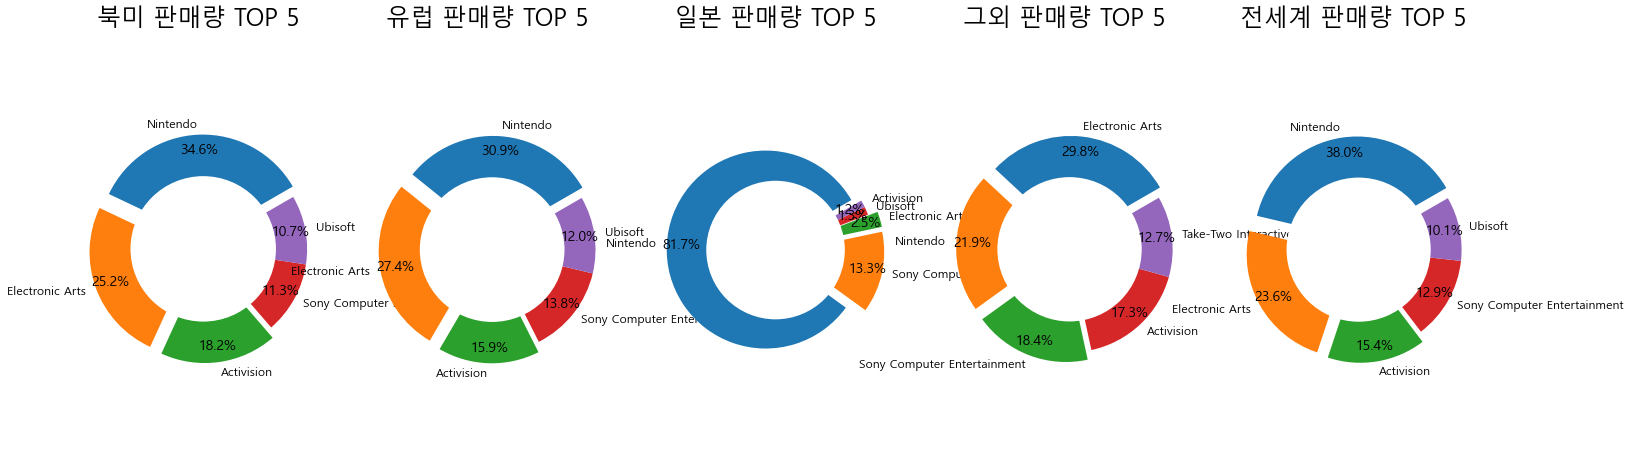

In [160]:
# 3-4-2. 지역별 가장 많은 게임 판매량을 기록한 게임회사 TOP 5 - 파이차트

# sales_column_list_pub = pubs_grouped_table.columns[1:]

def pub1_top5(df, sales_column_list_pub):
    df_new_pub1 = df.loc[:,['게임회사명', sales_column_list_pub]].sort_values(by = sales_column_list_pub, ascending = False).reset_index(drop = True).head(5)
    df_new_pub1.columns = ['게임회사명', '판매량']
    return df_new_pub1

pub1_top5_na = pub1_top5(pubs_grouped_table, '북미 판매량')
pub1_top5_eu = pub1_top5(pubs_grouped_table, '유럽 판매량')
pub1_top5_jp = pub1_top5(pubs_grouped_table, '일본 판매량')
pub1_top5_other = pub1_top5(pubs_grouped_table, '그외 판매량')
pub1_top5_global = pub1_top5(pubs_grouped_table, '전세계 판매량')
# pub1_top5_na # 북미 판매량 top5 확인

pub1_top5_list = [pub1_top5_na, pub1_top5_eu, pub1_top5_jp, pub1_top5_other, pub1_top5_global]
# pub1_top5_list

fig, axes = plt.subplots(1, 5, figsize = (25, 8))
plt.subplots_adjust(wspace = 0.2) # subplots간의 너비 간격 조절

# 각 subplot에 pie plot 그리기
explode = (0.1, 0.1, 0.1, 0, 0) # 퍼짐 정도 조절
for i in range(len(sales_column_list_pub)):
	ax = axes[i] # subplot 선택
	wedges, texts, autotexts = ax.pie(pub1_top5_list[i].판매량, explode = explode, labels = pub1_top5_list[i].게임회사명,
	                                  autopct = '%.1f%%', pctdistance = 0.85,
	                                  shadow = False, startangle = 30)
	for w in wedges: # 조각 설정
		w.set_linewidth(0)
		w.set_edgecolor('w')
		
	for t in texts: # label 설정
		t.set_color('k')
		t.set_fontsize(12)
		
	for a in autotexts: # 퍼센티지 설정
		a.set_color('black')
		a.set_fontsize(14)
    
	centre_circle = plt.Circle((0,0), 0.7, color='black', fc='white', linewidth=0) # 파이차트를 도넛차트로 보이게 하는 trick
	ax.add_artist(centre_circle)
	axes[i].set_title(sales_column_list_pub[i] + ' ' + 'TOP 5', fontsize = 24, pad = 2)
	ax.axis('equal')

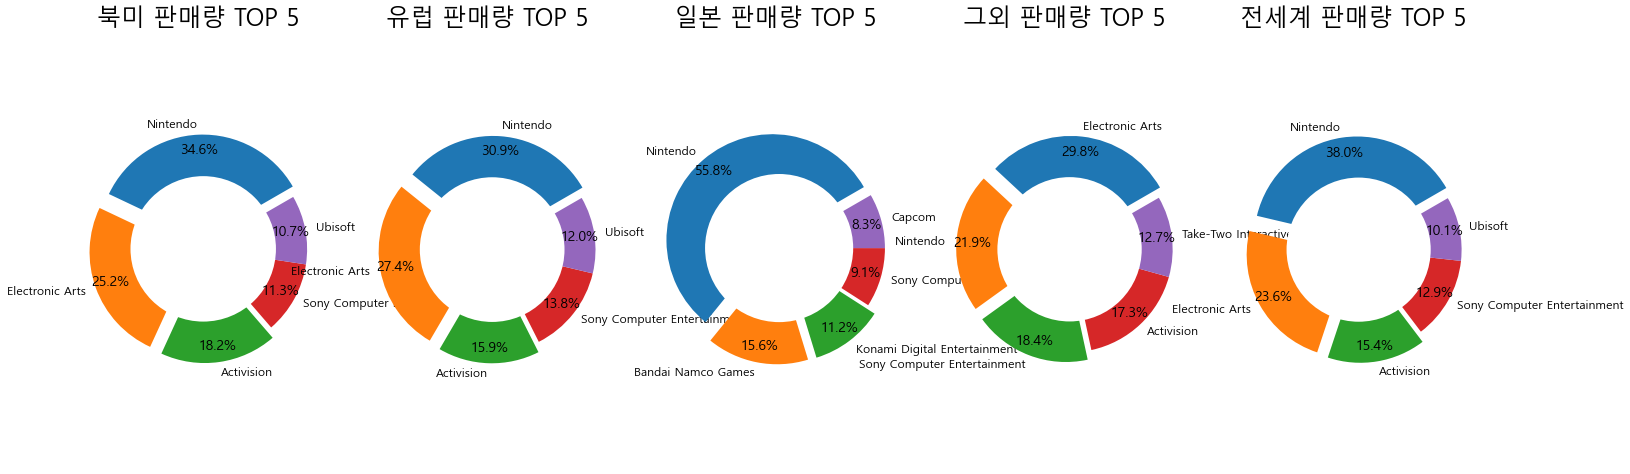

In [161]:
# 3-4-3. 지역별 가장 많은 게임 판매량을 기록한 게임회사 TOP 5 - 파이차트 (수정)

# sales_column_list_pub = ['북미 판매량', '유럽 판매량', '일본 판매량', '그외 판매량', '전세계 판매량']

# pubs_grouped_table_na = pubs_grouped.reset_index().sort_values(by=['북미 판매량'], ascending=False)
# pubs_grouped_table_eu = pubs_grouped.reset_index().sort_values(by=['유럽 판매량'], ascending=False)
# pubs_grouped_table_jp = pubs_grouped.reset_index().sort_values(by=['일본 판매량'], ascending=False)
# pubs_grouped_table_other = pubs_grouped.reset_index().sort_values(by=['그외 판매량'], ascending=False)
# pubs_grouped_table_global = pubs_grouped.reset_index().sort_values(by=['전세계 판매량'], ascending=False)

def pub1_top5(df, sales_column_list_pub):
    df_new_pub1 = df.loc[:,['게임회사명', sales_column_list_pub]].sort_values(by = sales_column_list_pub, ascending = False).reset_index(drop = True).head(5)
    df_new_pub1.columns = ['게임회사명', '판매량']
    return df_new_pub1

pub1_top5_na = pub1_top5(pubs_grouped_table_na, '북미 판매량')
pub1_top5_eu = pub1_top5(pubs_grouped_table_eu, '유럽 판매량')
pub1_top5_jp = pub1_top5(pubs_grouped_table_jp, '일본 판매량')
pub1_top5_other = pub1_top5(pubs_grouped_table_other, '그외 판매량')
pub1_top5_global = pub1_top5(pubs_grouped_table_global, '전세계 판매량')
# pub1_top5_na # 북미 판매량 top5 확인

pub1_top5_list = [pub1_top5_na, pub1_top5_eu, pub1_top5_jp, pub1_top5_other, pub1_top5_global]
# pub1_top5_list

fig, axes = plt.subplots(1, 5, figsize = (25, 8))
plt.subplots_adjust(wspace = 0.2) # subplots간의 너비 간격 조절

# 각 subplot에 pie plot 그리기
explode = (0.1, 0.1, 0.1, 0, 0) # 퍼짐 정도 조절
for i in range(len(sales_column_list_pub)):
	ax = axes[i] # subplot 선택
	wedges, texts, autotexts = ax.pie(pub1_top5_list[i].판매량, explode = explode, labels = pub1_top5_list[i].게임회사명,
	                                  autopct = '%.1f%%', pctdistance = 0.85,
	                                  shadow = False, startangle = 30)
	for w in wedges: # 조각 설정
		w.set_linewidth(0)
		w.set_edgecolor('w')
		
	for t in texts: # label 설정
		t.set_color('k')
		t.set_fontsize(12)
		
	for a in autotexts: # 퍼센티지 설정
		a.set_color('black')
		a.set_fontsize(14)
    
	centre_circle = plt.Circle((0,0), 0.7, color='black', fc='white', linewidth=0) # 파이차트를 도넛차트로 보이게 하는 trick
	ax.add_artist(centre_circle)
	axes[i].set_title(sales_column_list_pub[i] + ' ' + 'TOP 5', fontsize = 24, pad = 2)
	ax.axis('equal')

In [162]:
pubs_grouped.reset_index().sort_values(by=['일본 판매량'], ascending=False)

,게임회사명,북미 판매량,유럽 판매량,일본 판매량,그외 판매량,전세계 판매량
367,Nintendo,817.92,419.13,455.75,95.36,1788.16
64,Bandai Namco Games,69.67,42.68,127.34,14.70,254.39
284,Konami Digital Entertainment,92.16,69.69,91.40,30.31,283.56
466,Sony Computer Entertainment,265.89,187.97,74.10,80.47,608.43
87,Capcom,78.59,39.22,68.13,14.84,200.78
...,...,...,...,...,...,...
259,Introversion Software,0.01,0.01,0.00,0.00,0.02
257,"Interworks Unlimited, Inc.",0.01,0.00,0.00,0.00,0.01
256,Interplay Productions,0.05,0.04,0.00,0.01,0.10
251,Insomniac Games,0.10,0.00,0.00,0.01,0.11


In [163]:
pubs_grouped.reset_index().sort_values(by=['전세계 판매량'], ascending=False)

,게임회사명,북미 판매량,유럽 판매량,일본 판매량,그외 판매량,전세계 판매량
367,Nintendo,817.92,419.13,455.75,95.36,1788.16
141,Electronic Arts,595.07,371.27,14.04,129.77,1110.15
22,Activision,429.70,215.53,6.54,75.34,727.11
466,Sony Computer Entertainment,265.89,187.97,74.10,80.47,608.43
536,Ubisoft,253.43,163.32,7.50,50.26,474.51
...,...,...,...,...,...,...
258,Inti Creates,0.00,0.00,0.01,0.00,0.01
257,"Interworks Unlimited, Inc.",0.01,0.00,0.00,0.00,0.01
253,Interchannel-Holon,0.00,0.00,0.01,0.00,0.01
78,Boost On,0.00,0.00,0.01,0.00,0.01


In [164]:
# (시각화) 4. TOP 10 게임
# 4-0. 역대 판매량 TOP 10 게임

sales_top10 = df.loc[df.Global_Sales.sort_values(ascending = False).index].reset_index(drop = True).head(10)
rank = ['1위', '2위', '3위', '4위', '5위', '6위', '7위', '8위', '9위', '10위'] # rank = [str(x)+' 위' for x in range(1, 11)]
sales_top10['rank'] = rank
sales_top10

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,rank
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,1위
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,2위
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83,3위
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,4위
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38,5위
5,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,6위
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,7위
7,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01,8위
8,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61,9위
9,Duck Hunt,NES,1984,Shooting,Nintendo,26.93,0.63,0.28,0.47,28.31,10위


In [166]:
# 4-0-1. 최근 10년 판매량 TOP 10 게임 (2011~2021 로 설정함)

sales_top10_past10 = df[df.Year >= 2011].sort_values(by = 'Global_Sales', ascending = False).reset_index(drop = True).head(10)
sales_top10_past10

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.39
1,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
2,Call of Duty: Modern Warfare 3,X360,2011,Shooting,Activision,9.03,4.28,0.13,1.32,14.76
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,Nintendo,5.17,4.05,4.34,0.79,14.35
4,Call of Duty: Black Ops 3,PS4,2015,Shooting,Activision,5.77,5.81,0.35,2.31,14.24
5,Call of Duty: Black Ops II,PS3,2012,Shooting,Activision,4.99,5.88,0.65,2.52,14.04
6,Call of Duty: Black Ops II,X360,2012,Shooting,Activision,8.25,4.30,0.07,1.12,13.74
7,Call of Duty: Modern Warfare 3,PS3,2011,Shooting,Activision,5.54,5.82,0.49,1.62,13.47
8,Mario Kart 7,3DS,2011,Racing,Nintendo,4.74,3.91,2.67,0.89,12.21
9,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.99


In [168]:
# 4-0-2. 최근 10년 판매량 TOP 10 게임 플랫폼 TOP 3
# 4-0-3. 최근 10년 판매량 TOP 10 게임 장르 TOP 3

# def past10_sales_top3(df, col, sales):
#     return df.groupby(col)[sales].sum().reset_index(name = 'sales').sort_values(by = sales, ascending = False)

sales_top10_past10_pub = sales_top10_past10.groupby('Publisher')['Global_Sales'].sum().reset_index(name = 'sales').sort_values(by = 'sales', ascending = False).head(3) # 최근 10년 판매량 상위 10위 게임 제작사 TOP 3
sales_top10_past10_pf = sales_top10_past10.groupby('Platform')['Global_Sales'].sum().reset_index(name = 'sales').sort_values(by = 'sales', ascending = False).head(3) # 최근 10년 판매량 상위 10위 게임 플랫폼 TOP 3
sales_top10_past10_genre = sales_top10_past10.groupby('Genre')['Global_Sales'].sum().reset_index(name = 'sales').sort_values(by = 'sales', ascending = False).head(3) # 최근 10년 판매량 상위 10위 게임 장르 TOP 3

sales_top10_past10_pub # 최근 10년간 최고 판매량 게임회사: Activision > Take-Two Interactive > Nintendo
# Activision: Call of Duty 게임회사 (Shooting 장르 1위 공신)


,Publisher,sales
0,Activision,70.25
2,Take-Two Interactive,49.76
1,Nintendo,26.56


In [278]:
sales_top10_past10_pf # 최근 10년간 최고 판매량 플랫폼: PS3 > X360 > 3DS

,Platform,sales
1,PS3,48.90
3,X360,44.88
0,3DS,26.56


In [279]:
sales_top10_past10_genre # 최근 10년간 최고 판매량 장르: Shooting > Action > Role-Playing
# 슈팅 장르 높은 인기의 경우 동기간 Call of Duty 시리즈의 연이은 성공에 기인
# df.loc[(df.Name.str.contains('Call of Duty'))&(df.Year >= 2011)].sort_values(by = 'Global_Sales', ascending = False)

,Genre,sales
3,Shooting,70.25
0,Action,49.76
2,Role-Playing,14.35


In [170]:
# 결론 - 다음 분기에 어떤 게임을 설계해야 할까?
# 단일 장르, 단일 플랫폼 제안해야 한다면) 플레이스테이션 플랫폼의 액션 장르

In [172]:
df.sort_values(by = 'Global_Sales', ascending = False)
# 역대 전세계 최고 판매량은 Nintendo 사의 Wii Sports

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
2908,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
4199,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
12577,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3352,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
7829,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
...,...,...,...,...,...,...,...,...,...,...
5597,"Sakigake!! Otokojuku - Nihon yo, Kore ga Otoko...",PS3,2014,Fighting,Bandai Namco Games,0.00,0.00,0.01,0.00,0.01
11001,Time Travelers,PSP,2012,Adventure,Level 5,0.00,0.00,0.01,0.00,0.01
5593,Kana: Imouto,PSP,2010,Adventure,CyberFront,0.00,0.00,0.01,0.00,0.01
12458,Legoland,PC,1999,Action,LEGO Media,0.00,0.01,0.00,0.00,0.01


In [173]:
df.loc[df.Name.str.contains('Call of Duty')].sort_values(by = 'Year', ascending = False)
# Call of Duty: 2010년대 초중반 전세계 인기 판매되었으며 해당 기간 슈팅장르 선호도 상승에 기여 (중반 이후 실적은 다소 부진)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
12984,Call of Duty: Black Ops,PC,2020,Shooting,Activision,0.58,0.81,0.00,0.24,1.63
3465,Call of Duty: Modern Warfare Trilogy,PS3,2016,Shooting,Activision,0.00,0.01,0.00,0.00,0.01
2795,Call of Duty: Modern Warfare Trilogy,X360,2016,Shooting,Activision,0.01,0.01,0.00,0.00,0.02
11890,Call of Duty: Black Ops 3,PC,2015,Shooting,Activision,0.00,0.22,0.00,0.01,0.23
12264,Call of Duty: Black Ops 3,X360,2015,Shooting,Activision,1.11,0.48,0.00,0.16,1.75
12839,Call of Duty: Black Ops 3,PS3,2015,Shooting,Activision,0.49,0.96,0.07,0.27,1.79
15978,Call of Duty: Black Ops 3,XOne,2015,Shooting,Activision,4.52,2.09,0.01,0.67,7.29
9069,Call of Duty: Black Ops 3,PS4,2015,Shooting,Activision,5.77,5.81,0.35,2.31,14.24
7142,Call of Duty: Advanced Warfare,PS4,2014,Shooting,Activision,2.80,3.30,0.14,1.37,7.61
14241,Call of Duty: Advanced Warfare,X360,2014,Shooting,Activision,2.75,1.18,0.00,0.37,4.30


In [174]:
df.loc[((df.Year == 2006) & (df.Publisher == 'Nintendo'))].sort_values(by = 'Global_Sales', ascending = False)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
2908,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
6937,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
3014,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01
10553,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,Nintendo,6.42,4.52,6.04,1.37,18.35
1035,The Legend of Zelda: Twilight Princess,Wii,2006,Action,Nintendo,3.83,2.19,0.60,0.70,7.32
9865,Clubhouse Games,DS,2006,Misc,Nintendo,0.59,1.83,0.73,0.35,3.50
9506,English Training: Have Fun Improving Your Skills!,DS,2006,Misc,Nintendo,0.00,0.99,2.32,0.02,3.33
14350,Personal Trainer: Cooking,DS,2006,Misc,Nintendo,0.91,1.00,1.03,0.17,3.11
2438,WarioWare: Smooth Moves,Wii,2006,Puzzle,Nintendo,0.87,1.06,0.73,0.26,2.92
5315,Yoshi's Island DS,DS,2006,Platform,Nintendo,1.47,0.07,1.10,0.15,2.79


In [175]:
df.loc[((df.Year == 2009) & (df.Publisher == 'Nintendo'))].sort_values(by = 'Global_Sales', ascending = False)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
3352,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
16528,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61
10897,Wii Fit Plus,Wii,2009,Sports,Nintendo,9.09,8.59,2.53,1.79,22.00
4806,Pokemon HeartGold/Pokemon SoulSilver,DS,2009,Action,Nintendo,4.40,2.77,3.96,0.77,11.90
5218,Dragon Quest IX: Sentinels of the Starry Skies,DS,2009,Role-Playing,Nintendo,0.66,0.69,4.35,0.15,5.85
4568,Mario & Luigi: Bowser's Inside Story,DS,2009,Role-Playing,Nintendo,2.26,0.48,0.81,0.27,3.82
8212,Friend Collection,DS,2009,Misc,Nintendo,0.00,0.00,3.67,0.00,3.67
14033,The Legend of Zelda: Spirit Tracks,DS,2009,Action,Nintendo,1.43,0.94,0.74,0.27,3.38
10663,Professor Layton and the Last Specter,DS,2009,Puzzle,Nintendo,0.30,1.47,0.68,0.34,2.79
9961,Monster Hunter Tri,Wii,2009,Role-Playing,Nintendo,0.67,0.41,1.05,0.11,2.24


In [176]:
df.loc[df.Year == 2006].Global_Sales.sum()

526.3

In [177]:
df.loc[((df.Year == 2002) & (df.Publisher == 'Electronic Arts'))].sort_values(by = 'Global_Sales', ascending = False)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
6305,Medal of Honor: Frontline,PS2,2002,Shooting,Electronic Arts,2.93,2.75,0.17,0.99,6.84
10098,The Lord of the Rings: The Two Towers,PS2,2002,Action,Electronic Arts,1.94,1.95,0.08,0.70,4.67
15182,Madden NFL 2003,PS2,2002,Sports,Electronic Arts,3.36,0.21,0.01,0.56,4.14
5393,The Sims: Unleashed,PC,2002,Simulation,Electronic Arts,2.03,1.56,0.00,0.17,3.76
8471,FIFA Soccer 2003,PS2,2002,Sports,Electronic Arts,0.46,2.28,0.05,0.61,3.40
...,...,...,...,...,...,...,...,...,...,...
9432,FIFA Soccer 2003 (weekly jp sales),PS2,2002,Sports,Electronic Arts,0.00,0.00,0.04,0.00,0.04
12602,F1 2002,GC,2002,Racing,Electronic Arts,0.02,0.01,0.00,0.00,0.03
12862,Battlefield 1942,PC,2002,Shooting,Electronic Arts,0.01,0.01,0.00,0.00,0.02
15278,Command & Conquer Renegade,PC,2002,Shooting,Electronic Arts,0.00,0.01,0.00,0.00,0.01


In [178]:
df.loc[((df.Year == 2002) & (df.Publisher == 'Electronic Arts'))].Global_Sales.sum()

73.75999999999999

In [179]:
df.loc[df.Year >= 2017].sort_values(ascending = False, by = 'Year')

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
6906,Imagine: Makeup Artist,DS,2020,Simulation,Ubisoft,0.27,0.00,0.00,0.02,0.29
12984,Call of Duty: Black Ops,PC,2020,Shooting,Activision,0.58,0.81,0.00,0.24,1.63
3895,WRC: FIA World Rally Championship,PS3,2019,Racing,Black Bean Games,0.00,0.15,0.01,0.05,0.21
4124,WRC: FIA World Rally Championship,X360,2019,Racing,Black Bean Games,0.00,0.10,0.00,0.02,0.12
6354,GRID,DS,2019,Racing,Codemasters,0.04,0.01,0.00,0.00,0.05
7131,WRC: FIA World Rally Championship,PC,2019,Racing,Black Bean Games,0.00,0.01,0.00,0.00,0.01
13486,GRID,PC,2019,Racing,Codemasters,0.00,0.03,0.00,0.01,0.04
14001,RollerCoaster Tycoon,PC,2018,Strategy,Microprose,0.02,0.02,0.00,0.01,0.05
15061,Drake of the 99 Dragons,XB,2018,Shooting,Unknown,0.05,0.01,0.00,0.00,0.06
5310,Brothers Conflict: Precious Baby,PSV,2017,Action,Idea Factory,0.00,0.00,0.01,0.00,0.01


In [180]:
df.loc[df.Genre == 'Role-Playing'].sort_values(by = 'JP_Sales', ascending = False)
# 일본 내 롤플레잉 장르 판매량의 상당 부분은 포켓몬 시리즈 

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
7829,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
9414,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.09
10553,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,Nintendo,6.42,4.52,6.04,1.37,18.35
10619,Pokemon Black/Pokemon White,DS,2010,Role-Playing,Nintendo,5.57,3.28,5.65,0.82,15.32
10915,Pokemon Ruby/Pokemon Sapphire,GBA,2002,Role-Playing,Nintendo,6.06,3.90,5.38,0.50,15.84
...,...,...,...,...,...,...,...,...,...,...
5129,Justice League Heroes,PSP,2006,Role-Playing,Eidos Interactive,0.20,0.01,0.00,0.02,0.23
11966,Metal Dungeon,XB,2002,Role-Playing,Xicat Interactive,0.02,0.01,0.00,0.00,0.03
11958,Dragon Age Origins: Awakening,PC,2010,Role-Playing,Electronic Arts,0.01,0.10,0.00,0.02,0.13
11925,Legend of Legaia,PS,1998,Role-Playing,Sony Computer Entertainment,0.37,0.25,0.00,0.04,0.66


In [181]:
df.loc[df.Name.str.contains('Pokemon')].sort_values(by = 'JP_Sales', ascending = False) # 참고

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
7829,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
9414,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.09
10553,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,Nintendo,6.42,4.52,6.04,1.37,18.35
10619,Pokemon Black/Pokemon White,DS,2010,Role-Playing,Nintendo,5.57,3.28,5.65,0.82,15.32
10915,Pokemon Ruby/Pokemon Sapphire,GBA,2002,Role-Playing,Nintendo,6.06,3.90,5.38,0.50,15.84
1971,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,Nintendo,5.17,4.05,4.34,0.79,14.35
4806,Pokemon HeartGold/Pokemon SoulSilver,DS,2009,Action,Nintendo,4.40,2.77,3.96,0.77,11.90
1810,Pokemon FireRed/Pokemon LeafGreen,GBA,2004,Role-Playing,Nintendo,4.34,2.65,3.15,0.35,10.49
15676,Pokemon Black 2/Pokemon White 2,DS,2012,Role-Playing,Nintendo,2.91,1.86,3.14,0.43,8.34
4251,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,Nintendo,4.23,3.37,3.08,0.65,11.33


In [182]:
df.loc[df.Name.str.contains('Pokemon')].sort_values(by = 'Year', ascending = True) # 1996-2015년 출시

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
7829,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
9648,Pokemon Stadium,N64,1999,Strategy,Nintendo,3.18,1.24,0.94,0.09,5.45
9414,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.09
2713,Pokemon Pinball,GB,1999,Misc,Nintendo,3.02,1.12,1.01,0.16,5.31
16322,Pokemon Snap,N64,1999,Simulation,Nintendo,2.23,0.68,0.66,0.06,3.63
9525,Pokemon Puzzle League,N64,2000,Puzzle,Nintendo,0.36,0.08,0.00,0.01,0.45
14511,Pokemon Card GB2: Here Comes Team GR!,GB,2001,Strategy,Nintendo,0.00,0.00,0.89,0.00,0.89
10915,Pokemon Ruby/Pokemon Sapphire,GBA,2002,Role-Playing,Nintendo,6.06,3.90,5.38,0.50,15.84
16582,Pokemon Channel,GC,2003,Adventure,Nintendo,0.24,0.06,0.07,0.01,0.38
8349,Pokemon Box: Ruby & Sapphire,GC,2003,Misc,Nintendo,0.00,0.00,0.27,0.01,0.28


In [183]:
df.loc[df.Name.str.contains('Pokemon')].JP_Sales.sum() / df.JP_Sales.sum() # 일본 판매량 중 포켓몬 시리즈 판매량 비중: 약 5% (각 6400만 / 12억 9100만)

0.049913248233981904

In [184]:
df.sort_values(by = 'JP_Sales', ascending = False).head(20) # 역대 일본 판매량 최고 순위 상위 20: 포켓몬, 슈퍼마리오..

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
7829,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
9414,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.09
4199,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
6937,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
10553,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,Nintendo,6.42,4.52,6.04,1.37,18.35
10619,Pokemon Black/Pokemon White,DS,2010,Role-Playing,Nintendo,5.57,3.28,5.65,0.82,15.32
10915,Pokemon Ruby/Pokemon Sapphire,GBA,2002,Role-Playing,Nintendo,6.06,3.90,5.38,0.50,15.84
3273,Animal Crossing: Wild World,DS,2005,Simulation,Nintendo,2.55,3.52,5.33,0.88,12.28
511,Brain Age 2: More Training in Minutes a Day,DS,2005,Puzzle,Nintendo,3.44,5.36,5.32,1.18,15.30
1847,Monster Hunter Freedom 3,PSP,2010,Role-Playing,Capcom,0.00,0.00,4.87,0.00,4.87


In [185]:
df.loc[(df.Name.str.contains('Pokemon')) | (df.Name.str.contains('Mario')) | (df.Name.str.contains('Dragon'))].JP_Sales.sum()

259.46999999999997

In [187]:
df.loc[(df.Name.str.contains('Pokemon')) | (df.Name.str.contains('Mario')) | (df.Name.str.contains('Dragon'))].JP_Sales.sum() / df.JP_Sales.sum() # 약 20.1% = 2억 5900만 / 12억 9100만 달러

0.20097750650638244

In [188]:
df.loc[((df.Publisher == 'Nintendo')|(df.Publisher.str.contains('Sony')))].JP_Sales.sum() / df.JP_Sales.sum() # 약 41.3% = 5억 3200만 달러 / 12억 9100만 달러

0.4124504275622754

In [189]:
df.loc[((df.Publisher == 'Nintendo') | (df.Publisher.str.contains('Namco')) | (df.Publisher.str.contains('Konami')) | (df.Publisher.str.contains('Sony')))].sort_values(by = 'JP_Sales', ascending = False)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
7829,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
9414,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.09
4199,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
6937,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
10553,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,Nintendo,6.42,4.52,6.04,1.37,18.35
...,...,...,...,...,...,...,...,...,...,...
2665,Rock Revolution,DS,2008,Misc,Konami Digital Entertainment,0.10,0.00,0.00,0.01,0.11
10484,Singstar: Ultimate Party,PS3,2014,Misc,Sony Computer Entertainment Europe,0.00,0.12,0.00,0.02,0.14
10479,Buzz! The Mega Quiz,PS2,2007,Misc,Sony Computer Entertainment,0.32,0.06,0.00,0.50,0.88
10465,MLB 14: The Show,PSV,2014,Sports,Sony Computer Entertainment America,0.11,0.00,0.00,0.02,0.13
